# I. Modélisation statistique

In [620]:
# !pip install s3fs
# !pip install pandas
# !pip install scikit-learn==1.2.2
# !pip install imbalanced-learn
# !pip install matplotlib

## I.1. Chargement et préparation des données

### A) Importation des données

In [621]:
import pandas as pd

# Importation des données avec code_insee en index
donnees = pd.read_csv("data/bdd_finale.csv", sep=',', encoding='utf-8', index_col=0)
donnees.head()

beneficiaire_trans_eco  moyenne_conso_agri_hab  \
code_insee                                                   
22001                            0                2.994071   
22002                            0                1.283886   
22003                            0                0.000000   
22004                            0                0.200325   
22005                            0                0.121358   

            moyenne_conso_indus_hab  moyenne_conso_tertiaire_hab  \
code_insee                                                         
22001                      0.000503                     0.631181   
22002                      0.032120                     0.173206   
22003                      0.000000                     0.524098   
22004                      0.675332                     1.267791   
22005                      0.082905                     1.151104   

            moyenne_conso_residentiel_hab  moyenne_conso_totale_hab  \
code_insee                                                            
22001                            3.688905                  7.378017   
22002                            3.248865                  4.775226   
22003                            2.908468                  3.472740   
22004                            3.034877                  5.203150   
22005                            3.532942                  4.926877   

            emissions_ges  nb_actes_france_renov  friche  ecoquartiers  ...  \
code_insee                                                              ...   
22001               14871                     88       2             0  ...   
22002                8621                     38       0             0  ...   
22003                3028                     49       0             0  ...   
22004               29130                     46       6             0  ...   
22005                4136                     10       3             0  ...   

            CSP_maire  com_variation_encours_dette_ha_pct part_inactifs  \
code_insee                                                                
22001              12                                18.9     12.751678   
22002              54                               -39.3     11.062718   
22003              56                                99.8     14.239130   
22004              33                               -34.1     17.234927   
22005              77                               -14.5     14.188533   

            part_actifs  dependance_eco  abstention_municipales  \
code_insee                                                        
22001         47.147651             107                    17.4   
22002         50.522648              96                    53.8   
22003         48.804348             113                    53.7   
22004         40.540541             126                    44.8   
22005         42.371234             140                    22.9   

            taux_creation_ent  total_entreprises  part_licencies_sportifs  \
code_insee                                                                  
22001                    15.0                 20                23.825503   
22002                    12.1                 33                30.836237   
22003                    36.7                 30                35.760870   
22004                    12.6                238                24.282744   
22005                    18.8                 64                27.891156   

            part_jeunes_sans_diplome  
code_insee                            
22001                            9.1  
22002                            4.0  
22003                            0.0  
22004                           12.4  
22005                            2.6  

[5 rows x 31 columns]

### B) Formatage des données

Nous allons pouvoir observer le type des données que nous avons. Cela va nous permettre de déterminer si on a besoin de modifier certaines variables pour qu'elles soient bien en variables catégorielles.

In [622]:
donnees.dtypes

beneficiaire_trans_eco                  int64
moyenne_conso_agri_hab                float64
moyenne_conso_indus_hab               float64
moyenne_conso_tertiaire_hab           float64
moyenne_conso_residentiel_hab         float64
moyenne_conso_totale_hab              float64
emissions_ges                           int64
nb_actes_france_renov                   int64
friche                                  int64
ecoquartiers                            int64
part_residences_secondaires           float64
beneficiaire_prog                       int64
climat                                 object
gridens7                                int64
superf_choro                          float64
departement                             int64
gare_tgv                                int64
part_trajets_voiture                  float64
med_disp                                int64
an                                      int64
p_pop                                   int64
CSP_maire                         

In [623]:
# Conversion des variables en variables catégorielles
donnees["beneficiaire_trans_eco"] = donnees["beneficiaire_trans_eco"].astype('category')
donnees["ecoquartiers"] = donnees["ecoquartiers"].astype('category')
donnees["beneficiaire_prog"] = donnees["beneficiaire_prog"].astype('category')
donnees["gridens7"] = donnees["gridens7"].astype('category')
donnees["departement"] = donnees["departement"].astype('category')
donnees["gare_tgv"] = donnees["gare_tgv"].astype('category')
donnees["CSP_maire"] = donnees["CSP_maire"].astype('category')


# Cas de la variable climat
donnees = pd.get_dummies(donnees, columns = ["climat"]) # On crée des variables binaires pour la variable climat car on a des chaînes de caractères

In [624]:
donnees.dtypes

beneficiaire_trans_eco                category
moyenne_conso_agri_hab                 float64
moyenne_conso_indus_hab                float64
moyenne_conso_tertiaire_hab            float64
moyenne_conso_residentiel_hab          float64
moyenne_conso_totale_hab               float64
emissions_ges                            int64
nb_actes_france_renov                    int64
friche                                   int64
ecoquartiers                          category
part_residences_secondaires            float64
beneficiaire_prog                     category
gridens7                              category
superf_choro                           float64
departement                           category
gare_tgv                              category
part_trajets_voiture                   float64
med_disp                                 int64
an                                       int64
p_pop                                    int64
CSP_maire                             category
com_variation

Nous allons observer si on a des données manquantes dans notre jeu de données.

In [625]:
donnees.isna().sum()

beneficiaire_trans_eco                0
moyenne_conso_agri_hab                0
moyenne_conso_indus_hab               0
moyenne_conso_tertiaire_hab           0
moyenne_conso_residentiel_hab         0
moyenne_conso_totale_hab              0
emissions_ges                         0
nb_actes_france_renov                 0
friche                                0
ecoquartiers                          0
part_residences_secondaires           0
beneficiaire_prog                     0
gridens7                              0
superf_choro                          0
departement                           0
gare_tgv                              0
part_trajets_voiture                  0
med_disp                              0
an                                    0
p_pop                                 0
CSP_maire                             0
com_variation_encours_dette_ha_pct    0
part_inactifs                         0
part_actifs                           0
dependance_eco                        0


### C) Séparation de la variable à expliquer et des variables explicatives

In [626]:
# Définir X et y pour avoir les variables explicatives et la variable à expliquer beneficiaire_trans_eco
X = donnees.drop(columns=['beneficiaire_trans_eco'])

# Variable à expliquer : beneficiaire_trans_eco
y = donnees["beneficiaire_trans_eco"]

In [627]:
# import numpy as np

# # Convertir les listes en tableaux numpy
# X = np.array(X)
# y = np.array(y)

In [628]:
print("Dimensions de X:", X.shape)
print("Dimensions de y:", y.shape)

Dimensions de X: (1207, 32)
Dimensions de y: (1207,)


In [629]:
# import numpy as np

# np.unique(y)

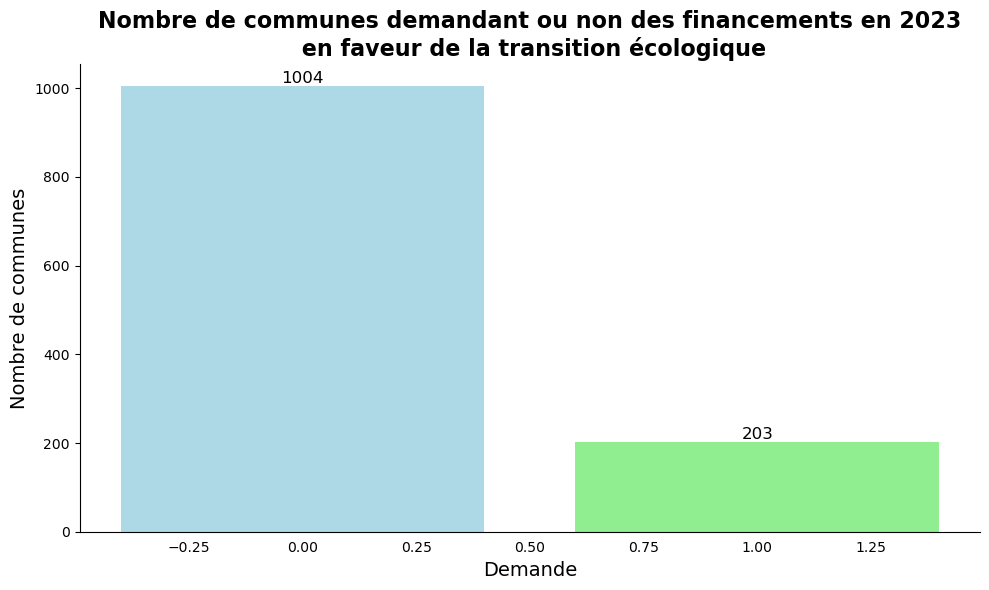

In [646]:
import matplotlib.pyplot as plt

# Compter le nombre de bénéficiaires et non bénéficiaires
counts = y.value_counts()

# Création du graphique en barres
plt.figure(figsize=(10, 6))
bars = plt.bar(counts.index, counts.values, color=["lightblue", "lightgreen"])

# Titre du graphique
plt.title("Nombre de communes demandant ou non des financements en 2023\n en faveur de la transition écologique", fontsize=16, weight='bold')

# Labels des axes
plt.xlabel("Demande", fontsize=14)
plt.ylabel("Nombre de communes", fontsize=14)

# Ajout des valeurs sur les barres
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=12)

# Supprimer les axes inutiles
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Supprimer les graduations de l'axe des abscisses
plt.gca().tick_params(axis='x', which='both', bottom=False, top=False)

# Afficher le graphique
plt.tight_layout()
plt.show()


## I.2. Modélisation

Nous allons d'abord diviser notre jeu de données en jeux d'apprentissage et de test.

In [630]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [631]:
X_train.shape, y_train.shape

((965, 32), (965,))

In [632]:
X_test.shape, y_test.shape

((242, 32), (242,))

In [635]:
import numpy as np

# Calcul de la proportion de 1 dans y_train et y_test
print("Proportion de 1 dans X_train : ", round(np.sum(y_train == 1)/len(y_train),2)*100, "%")
print("Proportion de 0 dans X_train : ", round(np.sum(y_train == 0)/len(y_train),2)*100, "%")

print("Proportion de 1 dans X_test : ", round(np.sum(y_test == 1)/len(y_test),2)*100, "%")
print("Proportion de 0 dans X_test : ", round(np.sum(y_test == 0)/len(y_test),2)*100, "%")

Proportion de 1 dans X_train :  17.0 %
Proportion de 0 dans X_train :  83.0 %
Proportion de 1 dans X_test :  15.0 %
Proportion de 0 dans X_test :  85.0 %


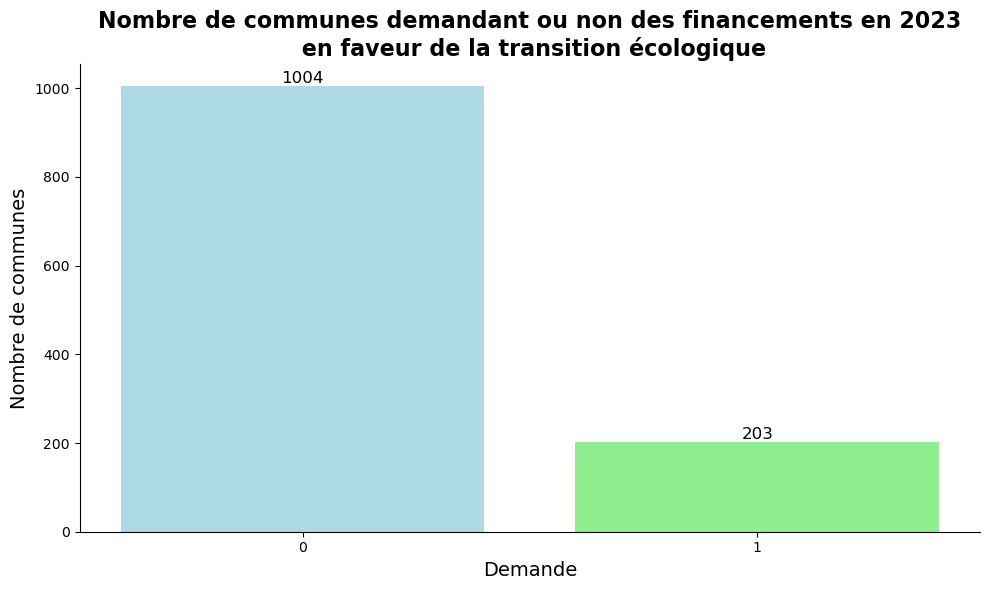

In [649]:
import matplotlib.pyplot as plt

# Compter le nombre de bénéficiaires et non bénéficiaires
counts = y.value_counts()

# Création du graphique en barres
plt.figure(figsize=(10, 6))
bars = plt.bar(counts.index, counts.values, color=["lightblue", "lightgreen"])

# Titre du graphique
plt.title("Nombre de communes demandant ou non des financements en 2023\n en faveur de la transition écologique", fontsize=16, weight='bold')

# Labels des axes
plt.xlabel("Demande", fontsize=14)
plt.ylabel("Nombre de communes", fontsize=14)

# Ajout des valeurs sur les barres
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=12)

# Supprimer les axes inutiles
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Graduer axes abscisses de 1 en 1
plt.gca().set_xticks([0, 1])

# Afficher le graphique
plt.tight_layout()
plt.show()

In [391]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits = 5)

## I.2.1. Régression logistique

### A) Construction des modèles

Nous allons maintenant définir notre modèle de régression logistique, sans pénalité.

In [392]:
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE

etapes_reg_log_oversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler(sampling_strategy = 0.4)), # Sur-échantillonnage
        ('reg_log', LogisticRegression(random_state=42)), # Régression logistique
        ]

etapes_reg_log_smote = [('std_scaler', StandardScaler()), # Standardisation des variables pour ne pas donner plus d'importance à une variable qu'à une autre
        ('smote', SMOTE(k_neighbors=5)), # Sur-échantillonnage
        ('reg_log', LogisticRegression(random_state=42)), # Régression logistique
        ]

etapes_reg_log_adasyn = [('std_scaler', StandardScaler()), # Standardisation des variables pour ne pas donner plus d'importance à une variable qu'à une autre
        ('adasyn', ADASYN(n_neighbors=5)), # Sur-échantillonnage
        ('reg_log', LogisticRegression(random_state=42)), # Régression logistique
        ]

etapes_reg_log_borderline_smote = [('std_scaler', StandardScaler()), # Standardisation des variables pour ne pas donner plus d'importance à une variable qu'à une autre
        ('borderline_smote', BorderlineSMOTE(k_neighbors=5)), # Sur-échantillonnage
        ('reg_log', LogisticRegression(random_state=42)) # Régression logistique
        ]


etapes_reg_log = [('std_scaler', StandardScaler()),
                   ('reg_log', LogisticRegression(random_state=42))

]

# Création des pipelines
modele_reg_log_smote  = Pipeline(steps=etapes_reg_log_smote)
modele_reg_log_oversampler  = Pipeline(steps=etapes_reg_log_oversampler)
modele_reg_log_adasyn  = Pipeline(steps=etapes_reg_log_adasyn)
modele_reg_log_borderline_smote  = Pipeline(steps=etapes_reg_log_borderline_smote)
modele_reg_log  = Pipeline(steps=etapes_reg_log)

On entraîne le modèle sur les données pour estimer les coefficients.

In [393]:
modele_reg_log_smote.fit(X_train, y_train)
modele_reg_log_oversampler.fit(X_train, y_train)
modele_reg_log_adasyn.fit(X_train, y_train)
modele_reg_log_borderline_smote.fit(X_train, y_train)
modele_reg_log.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('reg_log', LogisticRegression(random_state=42))])

On cherche à prédire de nouvelles données grâce aux données test

In [394]:
y_proba_reg_log_smote = modele_reg_log_smote.predict_proba(X_test)[:,1]
y_pred_reg_log_smote = modele_reg_log_smote.predict(X_test)

y_proba_reg_log_oversampler = modele_reg_log_oversampler.predict_proba(X_test)[:, 1]
y_pred_reg_log_oversampler = modele_reg_log_oversampler.predict(X_test)

y_proba_reg_log_adasyn = modele_reg_log_adasyn.predict_proba(X_test)[:, 1]
y_pred_reg_log_adasyn = modele_reg_log_adasyn.predict(X_test)

y_proba_reg_log_borderline_smote = modele_reg_log_borderline_smote.predict_proba(X_test)[:, 1]
y_pred_reg_log_borderline_smote = modele_reg_log_borderline_smote.predict(X_test)

y_proba_reg_log = modele_reg_log.predict_proba(X_test)[:, 1]
y_pred_reg_log = modele_reg_log.predict(X_test)

### B) Mesure de la performance des modèles initiaux

Nous allons maintenant évaluer la performance de notre modèle

In [395]:
from sklearn.metrics import roc_auc_score, average_precision_score, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, cohen_kappa_score


# Calcul des métriques
auc_roc_reg_log_smote = roc_auc_score(y_test, y_proba_reg_log_smote)
auc_pr_reg_log_smote  = average_precision_score(y_test, y_proba_reg_log_smote)
log_loss_value_reg_log_smote  = log_loss(y_test, y_proba_reg_log_smote)
precision_reg_log_smote  = precision_score(y_test, y_pred_reg_log_smote)
recall_reg_log_smote  = recall_score(y_test, y_pred_reg_log_smote)
f1_reg_log_smote = f1_score(y_test, y_pred_reg_log_smote)
mcc_reg_log_smote  = matthews_corrcoef(y_test, y_pred_reg_log_smote)
balanced_acc_reg_log_smote  = balanced_accuracy_score(y_test, y_pred_reg_log_smote)
specificity_reg_log_smote  = confusion_matrix(y_test, y_pred_reg_log_smote)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_smote)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_smote)[0, 1])
cohen_kappa_reg_log_smote  = cohen_kappa_score(y_test, y_pred_reg_log_smote)

In [396]:
# Calcul des métriques

# Calcul des métriques
auc_roc_reg_log_oversampler = roc_auc_score(y_test, y_proba_reg_log_oversampler)
auc_pr_reg_log_oversampler = average_precision_score(y_test, y_proba_reg_log_oversampler)
log_loss_value_reg_log_oversampler = log_loss(y_test, y_proba_reg_log_oversampler)
precision_reg_log_oversampler = precision_score(y_test, y_pred_reg_log_oversampler)
recall_reg_log_oversampler = recall_score(y_test, y_pred_reg_log_oversampler)
f1_reg_log_oversampler = f1_score(y_test, y_pred_reg_log_oversampler)
mcc_reg_log_oversampler = matthews_corrcoef(y_test, y_pred_reg_log_oversampler)
balanced_acc_reg_log_oversampler = balanced_accuracy_score(y_test, y_pred_reg_log_oversampler)
specificity_reg_log_oversampler = confusion_matrix(y_test, y_pred_reg_log_oversampler)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_oversampler)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_oversampler)[0, 1])
cohen_kappa_reg_log_oversampler = cohen_kappa_score(y_test, y_pred_reg_log_oversampler)

In [397]:
# Calcul des métriques

# Calcul des métriques
auc_roc_reg_log_adasyn = roc_auc_score(y_test, y_proba_reg_log_adasyn)
auc_pr_reg_log_adasyn = average_precision_score(y_test, y_proba_reg_log_adasyn)
log_loss_value_reg_log_adasyn = log_loss(y_test, y_proba_reg_log_adasyn)
precision_reg_log_adasyn = precision_score(y_test, y_pred_reg_log_adasyn)
recall_reg_log_adasyn = recall_score(y_test, y_pred_reg_log_adasyn)
f1_reg_log_adasyn = f1_score(y_test, y_pred_reg_log_adasyn)
mcc_reg_log_adasyn = matthews_corrcoef(y_test, y_pred_reg_log_adasyn)
balanced_acc_reg_log_adasyn = balanced_accuracy_score(y_test, y_pred_reg_log_adasyn)
specificity_reg_log_adasyn = confusion_matrix(y_test, y_pred_reg_log_adasyn)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_adasyn)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_adasyn)[0, 1])
cohen_kappa_reg_log_adasyn = cohen_kappa_score(y_test, y_pred_reg_log_adasyn)

In [398]:
# Calcul des métriques

auc_roc_reg_log_borderline_smote = roc_auc_score(y_test, y_proba_reg_log_borderline_smote)
auc_pr_reg_log_borderline_smote = average_precision_score(y_test, y_proba_reg_log_borderline_smote)
log_loss_value_reg_log_borderline_smote = log_loss(y_test, y_proba_reg_log_borderline_smote)
precision_reg_log_borderline_smote = precision_score(y_test, y_pred_reg_log_borderline_smote)
recall_reg_log_borderline_smote = recall_score(y_test, y_pred_reg_log_borderline_smote)
f1_reg_log_borderline_smote = f1_score(y_test, y_pred_reg_log_borderline_smote)
mcc_reg_log_borderline_smote = matthews_corrcoef(y_test, y_pred_reg_log_borderline_smote)
balanced_acc_reg_log_borderline_smote = balanced_accuracy_score(y_test, y_pred_reg_log_borderline_smote)
specificity_reg_log_borderline_smote = confusion_matrix(y_test, y_pred_reg_log_borderline_smote)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_borderline_smote)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_borderline_smote)[0, 1])
cohen_kappa_reg_log_borderline_smote = cohen_kappa_score(y_test, y_pred_reg_log_borderline_smote)


In [399]:
auc_roc_reg_log = roc_auc_score(y_test, y_proba_reg_log)
auc_pr_reg_log = average_precision_score(y_test, y_proba_reg_log)
log_loss_value_reg_log = log_loss(y_test, y_proba_reg_log)
precision_reg_log = precision_score(y_test, y_pred_reg_log)
recall_reg_log = recall_score(y_test, y_pred_reg_log)
f1_reg_log = f1_score(y_test, y_pred_reg_log)
mcc_reg_log = matthews_corrcoef(y_test, y_pred_reg_log)
balanced_acc_reg_log = balanced_accuracy_score(y_test, y_pred_reg_log)
specificity_reg_log = confusion_matrix(y_test, y_pred_reg_log)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log)[0, 0] + confusion_matrix(y_test, y_pred_reg_log)[0, 1])
cohen_kappa_reg_log = cohen_kappa_score(y_test, y_pred_reg_log)

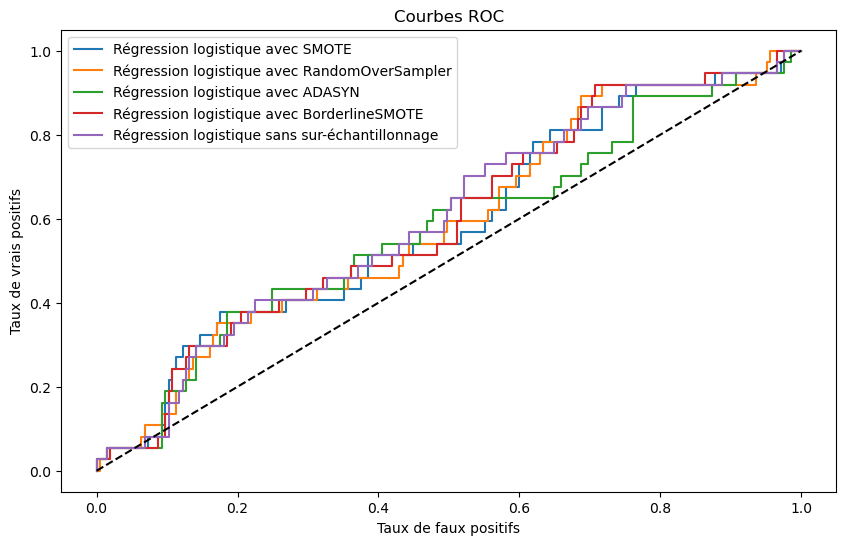

In [400]:
# Comparaison des courbes ROC

from sklearn.metrics import roc_curve

fpr_reg_log_smote, tpr_reg_log_smote, _ = roc_curve(y_test, y_proba_reg_log_smote)
fpr_reg_log_oversampler, tpr_reg_log_oversampler, _ = roc_curve(y_test, y_proba_reg_log_oversampler)
fpr_reg_log_adasyn, tpr_reg_log_adasyn, _ = roc_curve(y_test, y_proba_reg_log_adasyn)
fpr_reg_log_borderline_smote, tpr_reg_log_borderline_smote, _ = roc_curve(y_test, y_proba_reg_log_borderline_smote)
fpr_reg_log, tpr_reg_log, _ = roc_curve(y_test, y_proba_reg_log)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(fpr_reg_log_smote, tpr_reg_log_smote, label='Régression logistique avec SMOTE')
plt.plot(fpr_reg_log_oversampler, tpr_reg_log_oversampler, label='Régression logistique avec RandomOverSampler')
plt.plot(fpr_reg_log_adasyn, tpr_reg_log_adasyn, label='Régression logistique avec ADASYN')
plt.plot(fpr_reg_log_borderline_smote, tpr_reg_log_borderline_smote, label='Régression logistique avec BorderlineSMOTE')
plt.plot(fpr_reg_log, tpr_reg_log, label='Régression logistique sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()


# Export de l'image 
plt.savefig('data/Courbes_ROC_reg_log.png')

plt.show()

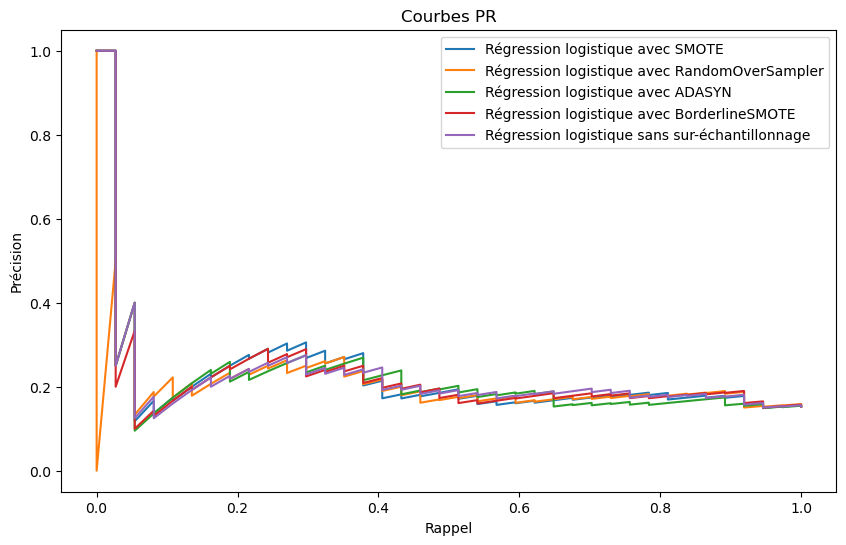

In [401]:
# Comparaison des courbes PR

from sklearn.metrics import precision_recall_curve

precision_reg_log_smote, recall_reg_log_smote, _ = precision_recall_curve(y_test, y_proba_reg_log_smote)
precision_reg_log_oversampler, recall_reg_log_oversampler, _ = precision_recall_curve(y_test, y_proba_reg_log_oversampler)
precision_reg_log_adasyn, recall_reg_log_adasyn, _ = precision_recall_curve(y_test, y_proba_reg_log_adasyn)
precision_reg_log_borderline_smote, recall_reg_log_borderline_smote, _ = precision_recall_curve(y_test, y_proba_reg_log_borderline_smote)
precision_reg_log, recall_reg_log, _ = precision_recall_curve(y_test, y_proba_reg_log)

plt.figure(figsize=(10, 6))
plt.plot(recall_reg_log_smote, precision_reg_log_smote, label='Régression logistique avec SMOTE')
plt.plot(recall_reg_log_oversampler, precision_reg_log_oversampler, label='Régression logistique avec RandomOverSampler')
plt.plot(recall_reg_log_adasyn, precision_reg_log_adasyn, label='Régression logistique avec ADASYN')
plt.plot(recall_reg_log_borderline_smote, precision_reg_log_borderline_smote, label='Régression logistique avec BorderlineSMOTE')
plt.plot(recall_reg_log, precision_reg_log, label='Régression logistique sans sur-échantillonnage')
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbes PR')
plt.legend()
plt.show()

In [402]:
# Résultats

resultats_reg_log = pd.DataFrame({
    "Régression logistique sans sur-échantillonnage": [auc_roc_reg_log, auc_pr_reg_log, f1_reg_log,  balanced_acc_reg_log],
    "Régression logistique avec SMOTE": [auc_roc_reg_log_smote, auc_pr_reg_log_smote, f1_reg_log_smote, balanced_acc_reg_log_smote],
    "Régression logistique avec RandomOverSampler": [auc_roc_reg_log_oversampler, auc_pr_reg_log_oversampler,  f1_reg_log_oversampler, balanced_acc_reg_log_oversampler],
    "Régression logistique avec ADASYN": [auc_roc_reg_log_adasyn, auc_pr_reg_log_adasyn, f1_reg_log_adasyn, balanced_acc_reg_log_adasyn],
    "Régression logistique avec BorderlineSMOTE": [auc_roc_reg_log_borderline_smote, auc_pr_reg_log_borderline_smote,  f1_reg_log_borderline_smote, balanced_acc_reg_log_borderline_smote]
    },
    index = ["AUC-ROC", "AUC-PR", "F1-score", "Balanced accuracy"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_reg_log = resultats_reg_log.round(3)
resultats_reg_log

Régression logistique sans sur-échantillonnage  \
AUC-ROC                                                     0.600   
AUC-PR                                                      0.228   
F1-score                                                    0.050   
Balanced accuracy                                           0.509   

                   Régression logistique avec SMOTE  \
AUC-ROC                                       0.587   
AUC-PR                                        0.230   
F1-score                                      0.269   
Balanced accuracy                             0.551   

                   Régression logistique avec RandomOverSampler  \
AUC-ROC                                                   0.588   
AUC-PR                                                    0.212   
F1-score                                                  0.159   
Balanced accuracy                                         0.516   

                   Régression logistique avec ADASYN  \
AUC-ROC                                        0.576   
AUC-PR                                         0.224   
F1-score                                       0.286   
Balanced accuracy                              0.569   

                   Régression logistique avec BorderlineSMOTE  
AUC-ROC                                                 0.595  
AUC-PR                                                  0.226  
F1-score                                                0.277  
Balanced accuracy                                       0.560

In [403]:
# Export des résultats en lateX

# Export des résultats
resultats_reg_log.to_csv("data/resultats_reg_log.csv", index=True)
latex_table_reg_log = resultats_reg_log.to_latex(index=True)
print(latex_table_reg_log)

\begin{tabular}{lrrrrr}
\toprule
 & Régression logistique sans sur-échantillonnage & Régression logistique avec SMOTE & Régression logistique avec RandomOverSampler & Régression logistique avec ADASYN & Régression logistique avec BorderlineSMOTE \\
\midrule
AUC-ROC & 0.600000 & 0.587000 & 0.588000 & 0.576000 & 0.595000 \\
AUC-PR & 0.228000 & 0.230000 & 0.212000 & 0.224000 & 0.226000 \\
F1-score & 0.050000 & 0.269000 & 0.159000 & 0.286000 & 0.277000 \\
Balanced accuracy & 0.509000 & 0.551000 & 0.516000 & 0.569000 & 0.560000 \\
\bottomrule
\end{tabular}



### C) Ajustement des hyperparamètres

Pour la régression logistique, les hyperparamètres les plus courants à optimiser sont :
- C : Ce paramètre de régularisation inverse. Une valeur plus petite indique une régularisation plus forte.
- solver : L'algorithme utilisé pour l'optimisation. Les choix courants sont 'liblinear', 'lbfgs', 'saga', etc.
- penalty : Le type de régularisation à utiliser ('l1', 'l2', 'elasticnet', 'none')
- fonction de lien

In [404]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score, balanced_accuracy_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold

# Grilles de paramètres réduites pour éviter le surapprentissage
param_grid_reg_log_oversampler = {
    'oversampler__sampling_strategy': ['auto', 0.2, 0.4, 0.5, 0.75, 1.0],
    'reg_log__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'reg_log__penalty': ['l2', None],
    'reg_log__solver': ['saga']
}

param_grid_reg_log_smote = {
    'smote__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0],
    'smote__k_neighbors': [3, 5, 7],
    'reg_log__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'reg_log__penalty': ['l2', None],
    'reg_log__solver': ['saga']
}

param_grid_reg_log_adasyn = {
    'adasyn__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0],
    'adasyn__n_neighbors': [3, 5, 7],
    'reg_log__penalty': ['l2', None],
    'reg_log__solver': ['saga'],
    'reg_log__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

param_grid_reg_log_borderline_smote = {
    'borderline_smote__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0],
    'borderline_smote__k_neighbors': [3, 5, 7],
    'reg_log__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'reg_log__penalty': ['l2'],
    'reg_log__solver': ['saga']
}

grille_param_reg_log_ = {
    'reg_log__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'reg_log__penalty': ['l2', None],
    'reg_log__solver': ['saga']
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score),
    'Balanced accuracy': make_scorer(balanced_accuracy_score),
    'AUC': make_scorer(roc_auc_score)
}

# Création des RandomizedSearchCV pour chaque pipeline avec des grilles réduites
grille_recherche_reg_log_oversampler = RandomizedSearchCV(
    estimator=modele_reg_log_oversampler,
    param_distributions=param_grid_reg_log_oversampler,
    scoring=scoring,
    refit='AUC',
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

grille_recherche_reg_log_smote = RandomizedSearchCV(
    estimator=modele_reg_log_smote,
    param_distributions=param_grid_reg_log_smote,
    scoring=scoring,
    refit='AUC',
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

grille_recherche_reg_log_adasyn = RandomizedSearchCV(
    estimator=modele_reg_log_adasyn,
    param_distributions=param_grid_reg_log_adasyn,
    scoring=scoring,
    refit='AUC',
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

grille_recherche_reg_log_borderline_smote = RandomizedSearchCV(
    estimator=modele_reg_log_borderline_smote,
    param_distributions=param_grid_reg_log_borderline_smote,
    scoring=scoring,
    refit='AUC',
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

grille_recherche_reg_log = RandomizedSearchCV(
    estimator=modele_reg_log,
    param_distributions=grille_param_reg_log_,
    scoring=scoring,
    refit='AUC',
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)


In [405]:
# Récupération des meilleurs modèles

modele_reg_log_oversampler_opt = grille_recherche_reg_log_oversampler.fit(X_train, y_train).best_estimator_

Fitting 10 folds for each of 50 candidates, totalling 500 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(

In [406]:
modele_reg_log_smote_opt = grille_recherche_reg_log_smote.fit(X_train, y_train).best_estimator_

Fitting 10 folds for each of 50 candidates, totalling 500 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
160 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(

In [407]:
modele_reg_log_adasyn_opt = grille_recherche_reg_log_adasyn.fit(X_train, y_train).best_estimator_

Fitting 10 folds for each of 50 candidates, totalling 500 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X,

In [408]:
modele_reg_log_borderline_smote_opt = grille_recherche_reg_log_borderline_smote.fit(X_train, y_train).best_estimator_

Fitting 10 folds for each of 50 candidates, totalling 500 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(

In [409]:
modele_reg_log_opt = grille_recherche_reg_log.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 10 is smaller than n_iter=50. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 10 candidates, totalling 100 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [410]:
# Affichage des meilleurs paramètres pour chaque pipeline
print("Meilleurs paramètres pour la régression logistique avec RandomOverSampler:", modele_reg_log_oversampler_opt)
print("Meilleurs paramètres pour la régression logistique avec SMOTE:", modele_reg_log_smote_opt)
print("Meilleurs paramètres pour la régression logistique avec ADASYN:", modele_reg_log_adasyn_opt)
print("Meilleurs paramètres pour la régression logistique avec BorderlineSMOTE:", modele_reg_log_borderline_smote_opt)
print("Meilleurs paramètres pour la régression logistique sans sur-échantillonnage:", modele_reg_log_opt)

Meilleurs paramètres pour la régression logistique avec RandomOverSampler: Pipeline(steps=[('std_scaler', StandardScaler()),
                ('oversampler', RandomOverSampler(sampling_strategy=1.0)),
                ('reg_log',
                 LogisticRegression(C=1, random_state=42, solver='saga'))])
Meilleurs paramètres pour la régression logistique avec SMOTE: Pipeline(steps=[('std_scaler', StandardScaler()),
                ('smote', SMOTE(k_neighbors=7, sampling_strategy=1.0)),
                ('reg_log',
                 LogisticRegression(C=0.01, penalty=None, random_state=42,
                                    solver='saga'))])
Meilleurs paramètres pour la régression logistique avec ADASYN: Pipeline(steps=[('std_scaler', StandardScaler()),
                ('adasyn', ADASYN(sampling_strategy=1.0)),
                ('reg_log',
                 LogisticRegression(C=0.01, random_state=42, solver='saga'))])
Meilleurs paramètres pour la régression logistique avec BorderlineSMOTE: P

In [411]:
# Entraînement des meilleurs modèles

modele_reg_log_oversampler_opt.fit(X_train, y_train)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('std_scaler', StandardScaler()),
                ('oversampler', RandomOverSampler(sampling_strategy=1.0)),
                ('reg_log',
                 LogisticRegression(C=1, random_state=42, solver='saga'))])

In [412]:
modele_reg_log_smote_opt.fit(X_train, y_train)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('std_scaler', StandardScaler()),
                ('smote', SMOTE(k_neighbors=7, sampling_strategy=1.0)),
                ('reg_log',
                 LogisticRegression(C=0.01, penalty=None, random_state=42,
                                    solver='saga'))])

In [413]:
modele_reg_log_adasyn_opt.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('adasyn', ADASYN(sampling_strategy=1.0)),
                ('reg_log',
                 LogisticRegression(C=0.01, random_state=42, solver='saga'))])

In [414]:
modele_reg_log_borderline_smote_opt.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('borderline_smote', BorderlineSMOTE(sampling_strategy=1.0)),
                ('reg_log',
                 LogisticRegression(C=0.01, random_state=42, solver='saga'))])

In [415]:
modele_reg_log_opt.fit(X_train, y_train)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('std_scaler', StandardScaler()),
                ('reg_log',
                 LogisticRegression(C=0.001, penalty=None, random_state=42,
                                    solver='saga'))])

In [416]:
# Prédiction sur l'échantillon test
y_proba_reg_log_smote_cv = modele_reg_log_smote_opt.predict_proba(X_test)[:, 1]
y_pred_reg_log_smote_cv = modele_reg_log_smote_opt.predict(X_test)

y_proba_reg_log_oversampler_cv = modele_reg_log_oversampler_opt.predict_proba(X_test)[:, 1]
y_pred_reg_log_oversampler_cv = modele_reg_log_oversampler_opt.predict(X_test)

y_proba_reg_log_adasyn_cv = modele_reg_log_adasyn_opt.predict_proba(X_test)[:, 1]
y_pred_reg_log_adasyn_cv = modele_reg_log_adasyn_opt.predict(X_test)

y_proba_reg_log_borderline_smote_cv = modele_reg_log_borderline_smote_opt.predict_proba(X_test)[:, 1]
y_pred_reg_log_borderline_smote_cv = modele_reg_log_borderline_smote_opt.predict(X_test)

y_proba_reg_log_cv = modele_reg_log_opt.predict_proba(X_test)[:, 1]
y_pred_reg_log_cv = modele_reg_log_opt.predict(X_test)


### D) Mesure de la performance des modèles optimisés

In [417]:
# Calcul des métriques pour chaque modèle

# Calcul des métriques
auc_roc_reg_log_smote_cv = roc_auc_score(y_test, y_proba_reg_log_smote_cv)
auc_pr_reg_log_smote_cv = average_precision_score(y_test, y_proba_reg_log_smote_cv)
log_loss_value_reg_log_smote_cv = log_loss(y_test, y_proba_reg_log_smote_cv)
precision_reg_log_smote_cv = precision_score(y_test, y_pred_reg_log_smote_cv)
recall_reg_log_smote_cv = recall_score(y_test, y_pred_reg_log_smote_cv)
f1_reg_log_smote_cv = f1_score(y_test, y_pred_reg_log_smote_cv)
mcc_reg_log_smote_cv = matthews_corrcoef(y_test, y_pred_reg_log_smote_cv)
balanced_acc_reg_log_smote_cv = balanced_accuracy_score(y_test, y_pred_reg_log_smote_cv)
specificity_reg_log_smote_cv = confusion_matrix(y_test, y_pred_reg_log_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_smote_cv)[0, 1])
cohen_kappa_reg_log_smote_cv = cohen_kappa_score(y_test, y_pred_reg_log_smote_cv)

In [418]:
auc_roc_reg_log_oversampler_cv = roc_auc_score(y_test, y_proba_reg_log_oversampler_cv)
auc_pr_reg_log_oversampler_cv = average_precision_score(y_test, y_proba_reg_log_oversampler_cv)
log_loss_value_reg_log_oversampler_cv = log_loss(y_test, y_proba_reg_log_oversampler_cv)
precision_reg_log_oversampler_cv = precision_score(y_test, y_pred_reg_log_oversampler_cv)
recall_reg_log_oversampler_cv = recall_score(y_test, y_pred_reg_log_oversampler_cv)
f1_reg_log_oversampler_cv = f1_score(y_test, y_pred_reg_log_oversampler_cv)
mcc_reg_log_oversampler_cv = matthews_corrcoef(y_test, y_pred_reg_log_oversampler_cv)
balanced_acc_reg_log_oversampler_cv = balanced_accuracy_score(y_test, y_pred_reg_log_oversampler_cv)
specificity_reg_log_oversampler_cv = confusion_matrix(y_test, y_pred_reg_log_oversampler_cv)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_oversampler_cv)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_oversampler_cv)[0, 1])
cohen_kappa_reg_log_oversampler_cv = cohen_kappa_score(y_test, y_pred_reg_log_oversampler_cv)

In [419]:
auc_roc_reg_log_adasyn_cv = roc_auc_score(y_test, y_proba_reg_log_adasyn_cv)
auc_pr_reg_log_adasyn_cv = average_precision_score(y_test, y_proba_reg_log_adasyn_cv)
log_loss_value_reg_log_adasyn_cv = log_loss(y_test, y_proba_reg_log_adasyn_cv)
precision_reg_log_adasyn_cv = precision_score(y_test, y_pred_reg_log_adasyn_cv)
recall_reg_log_adasyn_cv = recall_score(y_test, y_pred_reg_log_adasyn_cv)
f1_reg_log_adasyn_cv = f1_score(y_test, y_pred_reg_log_adasyn_cv)
mcc_reg_log_adasyn_cv = matthews_corrcoef(y_test, y_pred_reg_log_adasyn_cv)
balanced_acc_reg_log_adasyn_cv = balanced_accuracy_score(y_test, y_pred_reg_log_adasyn_cv)
specificity_reg_log_adasyn_cv = confusion_matrix(y_test, y_pred_reg_log_adasyn_cv)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_adasyn_cv)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_adasyn_cv)[0, 1])
cohen_kappa_reg_log_adasyn_cv = cohen_kappa_score(y_test, y_pred_reg_log_adasyn_cv)

In [420]:
auc_roc_reg_log_borderline_smote = roc_auc_score(y_test, y_proba_reg_log_borderline_smote_cv)
auc_pr_reg_log_borderline_smote = average_precision_score(y_test, y_proba_reg_log_borderline_smote_cv)
log_loss_value_reg_log_borderline_smote = log_loss(y_test, y_proba_reg_log_borderline_smote_cv)
precision_reg_log_borderline_smote = precision_score(y_test, y_pred_reg_log_borderline_smote_cv)
recall_reg_log_borderline_smote = recall_score(y_test, y_pred_reg_log_borderline_smote_cv)
f1_reg_log_borderline_smote = f1_score(y_test, y_pred_reg_log_borderline_smote_cv)
mcc_reg_log_borderline_smote = matthews_corrcoef(y_test, y_pred_reg_log_borderline_smote_cv)
balanced_acc_reg_log_borderline_smote = balanced_accuracy_score(y_test, y_pred_reg_log_borderline_smote_cv)
specificity_reg_log_borderline_smote = confusion_matrix(y_test, y_pred_reg_log_borderline_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_borderline_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_borderline_smote_cv)[0, 1])
cohen_kappa_reg_log_borderline_smote = cohen_kappa_score(y_test, y_pred_reg_log_borderline_smote_cv)

In [421]:
auc_roc_reg_log_cv = roc_auc_score(y_test, y_proba_reg_log_cv)
auc_pr_reg_log_cv = average_precision_score(y_test, y_proba_reg_log_cv)
log_loss_value_reg_log_cv = log_loss(y_test, y_proba_reg_log_cv)
precision_reg_log_cv = precision_score(y_test, y_pred_reg_log_cv)
recall_reg_log_cv = recall_score(y_test, y_pred_reg_log_cv)
f1_reg_log_cv = f1_score(y_test, y_pred_reg_log_cv)
mcc_reg_log_cv = matthews_corrcoef(y_test, y_pred_reg_log_cv)
balanced_acc_reg_log_cv = balanced_accuracy_score(y_test, y_pred_reg_log_cv)
specificity_reg_log_cv = confusion_matrix(y_test, y_pred_reg_log_cv)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_cv)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_cv)[0, 1])
cohen_kappa_reg_log_cv = cohen_kappa_score(y_test, y_pred_reg_log_cv)

In [422]:
# Affichage des résultats

resultats_reg_log_cv = pd.DataFrame({
    "Régression logistique sans sur-échantillonnage": [auc_roc_reg_log_cv, auc_pr_reg_log_cv, f1_reg_log_cv, balanced_acc_reg_log_cv],
    "Régression logistique avec SMOTE": [auc_roc_reg_log_smote_cv, auc_pr_reg_log_smote_cv, f1_reg_log_smote_cv, balanced_acc_reg_log_smote_cv],
    "Régression logistique avec RandomOverSampler": [auc_roc_reg_log_oversampler_cv, auc_pr_reg_log_oversampler_cv, f1_reg_log_oversampler_cv, balanced_acc_reg_log_oversampler_cv],
    "Régression logistique avec ADASYN": [auc_roc_reg_log_adasyn_cv, auc_pr_reg_log_adasyn_cv, f1_reg_log_adasyn_cv, balanced_acc_reg_log_adasyn_cv,],
    "Régression logistique avec BorderlineSMOTE": [auc_roc_reg_log_borderline_smote, auc_pr_reg_log_borderline_smote, f1_reg_log_borderline_smote, balanced_acc_reg_log_borderline_smote]},
    index = ["AUC-ROC", "AUC-PR", "F1-score","Balanced accuracy"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_reg_log_cv = resultats_reg_log_cv.round(3)
resultats_reg_log_cv

Régression logistique sans sur-échantillonnage  \
AUC-ROC                                                     0.589   
AUC-PR                                                      0.227   
F1-score                                                    0.050   
Balanced accuracy                                           0.509   

                   Régression logistique avec SMOTE  \
AUC-ROC                                       0.591   
AUC-PR                                        0.225   
F1-score                                      0.301   
Balanced accuracy                             0.585   

                   Régression logistique avec RandomOverSampler  \
AUC-ROC                                                   0.603   
AUC-PR                                                    0.230   
F1-score                                                  0.295   
Balanced accuracy                                         0.580   

                   Régression logistique avec ADASYN  \
AUC-ROC                                        0.578   
AUC-PR                                         0.205   
F1-score                                       0.294   
Balanced accuracy                              0.578   

                   Régression logistique avec BorderlineSMOTE  
AUC-ROC                                                 0.586  
AUC-PR                                                  0.234  
F1-score                                                0.275  
Balanced accuracy                                       0.558

In [423]:
# Export des résultats
resultats_reg_log_cv.to_csv("data/resultats_reg_log_opt.csv", index=True)
latex_table_reg_log = resultats_reg_log_cv.to_latex(index=True)
print(latex_table_reg_log)

\begin{tabular}{lrrrrr}
\toprule
 & Régression logistique sans sur-échantillonnage & Régression logistique avec SMOTE & Régression logistique avec RandomOverSampler & Régression logistique avec ADASYN & Régression logistique avec BorderlineSMOTE \\
\midrule
AUC-ROC & 0.589000 & 0.591000 & 0.603000 & 0.578000 & 0.586000 \\
AUC-PR & 0.227000 & 0.225000 & 0.230000 & 0.205000 & 0.234000 \\
F1-score & 0.050000 & 0.301000 & 0.295000 & 0.294000 & 0.275000 \\
Balanced accuracy & 0.509000 & 0.585000 & 0.580000 & 0.578000 & 0.558000 \\
\bottomrule
\end{tabular}



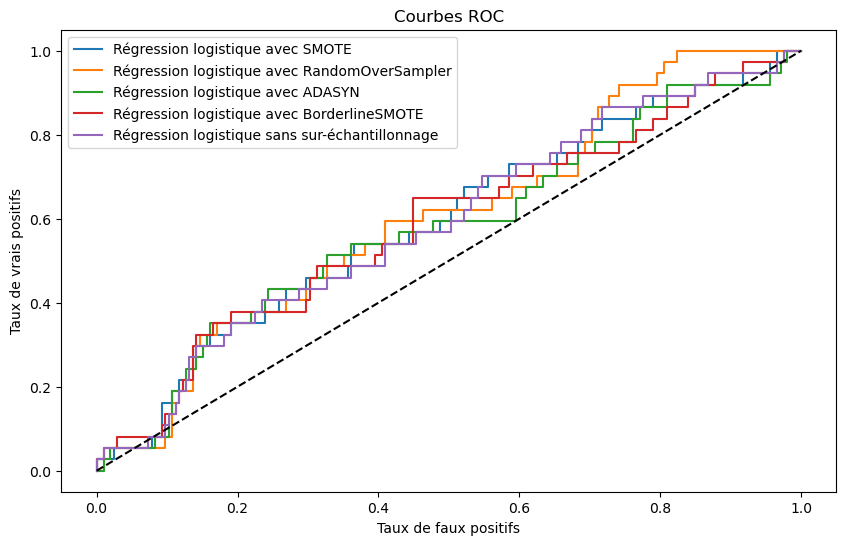

In [424]:
# Comparaison des courbes ROC

fpr_reg_log_smote_cv, tpr_reg_log_smote_cv, _ = roc_curve(y_test, y_proba_reg_log_smote_cv)
fpr_reg_log_oversampler_cv, tpr_reg_log_oversampler_cv, _ = roc_curve(y_test, y_proba_reg_log_oversampler_cv)
fpr_reg_log_adasyn_cv, tpr_reg_log_adasyn_cv, _ = roc_curve(y_test, y_proba_reg_log_adasyn_cv)
fpr_reg_log_borderline_smote_cv, tpr_reg_log_borderline_smote_cv, _ = roc_curve(y_test, y_proba_reg_log_borderline_smote_cv)
fpr_reg_log, tpr_reg_log, _ = roc_curve(y_test, y_proba_reg_log_cv)

plt.figure(figsize=(10, 6))
plt.plot(fpr_reg_log_smote_cv, tpr_reg_log_smote_cv, label='Régression logistique avec SMOTE')
plt.plot(fpr_reg_log_oversampler_cv, tpr_reg_log_oversampler_cv, label='Régression logistique avec RandomOverSampler')
plt.plot(fpr_reg_log_adasyn_cv, tpr_reg_log_adasyn_cv, label='Régression logistique avec ADASYN')
plt.plot(fpr_reg_log_borderline_smote_cv, tpr_reg_log_borderline_smote_cv, label='Régression logistique avec BorderlineSMOTE')
plt.plot(fpr_reg_log, tpr_reg_log, label='Régression logistique sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

# Export de l'image
plt.savefig('data/Courbes_ROC_reg_log_cv.png')

plt.show()



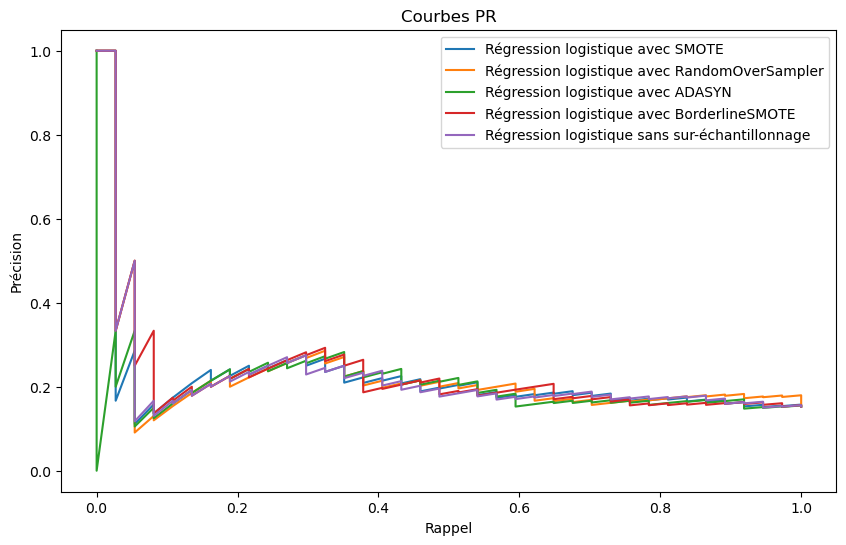

In [425]:
# Comparaison des courbes PR

precision_reg_log_smote_cv, recall_reg_log_smote_cv, _ = precision_recall_curve(y_test, y_proba_reg_log_smote_cv)
precision_reg_log_oversampler_cv, recall_reg_log_oversampler_cv, _ = precision_recall_curve(y_test, y_proba_reg_log_oversampler_cv)
precision_reg_log_adasyn_cv, recall_reg_log_adasyn_cv, _ = precision_recall_curve(y_test, y_proba_reg_log_adasyn_cv)
precision_reg_log_borderline_smote_cv, recall_reg_log_borderline_smote_cv, _ = precision_recall_curve(y_test, y_proba_reg_log_borderline_smote_cv)
precision_reg_log_cv, recall_reg_log_cv, _ = precision_recall_curve(y_test, y_proba_reg_log_cv)

plt.figure(figsize=(10, 6))
plt.plot(recall_reg_log_smote_cv, precision_reg_log_smote_cv, label='Régression logistique avec SMOTE')
plt.plot(recall_reg_log_oversampler_cv, precision_reg_log_oversampler_cv, label='Régression logistique avec RandomOverSampler')
plt.plot(recall_reg_log_adasyn_cv, precision_reg_log_adasyn_cv, label='Régression logistique avec ADASYN')
plt.plot(recall_reg_log_borderline_smote_cv, precision_reg_log_borderline_smote_cv, label='Régression logistique avec BorderlineSMOTE')
plt.plot(recall_reg_log_cv, precision_reg_log_cv, label='Régression logistique sans sur-échantillonnage')

plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbes PR')

plt.legend()
plt.show()

### E) Importance des variables

In [426]:
# Importance des variables

# Récupération des coefficients de la régression logistique
coefficients_reg_log_smote = modele_reg_log_smote_opt.named_steps['reg_log'].coef_[0]
coefficients_reg_log_oversampler = modele_reg_log_oversampler_opt.named_steps['reg_log'].coef_[0]
coefficients_reg_log_adasyn = modele_reg_log_adasyn_opt.named_steps['reg_log'].coef_[0]
coefficients_reg_log_borderline_smote = modele_reg_log_borderline_smote_opt.named_steps['reg_log'].coef_[0]
coefficients_reg_log = modele_reg_log_opt.named_steps['reg_log'].coef_[0]

# Récupération des noms des variables
noms_variables = X.columns

# Création d'un DataFrame pour afficher les résultats
resultats_importance_variables_reg_log_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Coefficient": coefficients_reg_log_smote
})

resultats_importance_variables_reg_log_oversampler = pd.DataFrame({
    "Variable": noms_variables,
    "Coefficient": coefficients_reg_log_oversampler
})

resultats_importance_variables_reg_log_adasyn = pd.DataFrame({
    "Variable": noms_variables,
    "Coefficient": coefficients_reg_log_adasyn
})

resultats_importance_variables_reg_log_borderline_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Coefficient": coefficients_reg_log_borderline_smote
})

resultats_importance_variables_reg_log = pd.DataFrame({
    "Variable": noms_variables,
    "Coefficient": coefficients_reg_log
})

# Affichage des résultats
resultats_importance_variables_reg_log_smote = resultats_importance_variables_reg_log_smote.sort_values(by="Coefficient", ascending=False)
resultats_importance_variables_reg_log_oversampler = resultats_importance_variables_reg_log_oversampler.sort_values(by="Coefficient", ascending=False)
resultats_importance_variables_reg_log_adasyn = resultats_importance_variables_reg_log_adasyn.sort_values(by="Coefficient", ascending=False)
resultats_importance_variables_reg_log_borderline_smote = resultats_importance_variables_reg_log_borderline_smote.sort_values(by="Coefficient", ascending=False)
resultats_importance_variables_reg_log = resultats_importance_variables_reg_log.sort_values(by="Coefficient", ascending=False)

resultats_importance_variables_reg_log_smote

Variable  Coefficient
12                        superf_choro     0.608899
24              abstention_municipales     0.216370
6                nb_actes_france_renov     0.193518
15                part_trajets_voiture     0.159034
27             part_licencies_sportifs     0.146494
21                       part_inactifs     0.084402
18                               p_pop     0.077203
26                   total_entreprises     0.058902
31                          climat_Mer     0.052138
1              moyenne_conso_indus_hab     0.050087
30                     climat_Estuaire     0.034363
14                            gare_tgv     0.025009
17                                  an     0.000000
7                               friche    -0.005915
20  com_variation_encours_dette_ha_pct    -0.006839
8                         ecoquartiers    -0.009914
0               moyenne_conso_agri_hab    -0.016917
28            part_jeunes_sans_diplome    -0.040075
19                           CSP_maire    -0.045252
23                      dependance_eco    -0.046382
4             moyenne_conso_totale_hab    -0.055173
29                        climat_Autre    -0.059675
9          part_residences_secondaires    -0.105043
2          moyenne_conso_tertiaire_hab    -0.114725
25                   taux_creation_ent    -0.134980
10                   beneficiaire_prog    -0.143759
3        moyenne_conso_residentiel_hab    -0.156025
13                         departement    -0.187537
16                            med_disp    -0.189192
22                         part_actifs    -0.228180
11                            gridens7    -0.276637
5                        emissions_ges    -0.431814

In [427]:
resultats_importance_variables_reg_log_oversampler

Variable  Coefficient
12                        superf_choro     0.557125
27             part_licencies_sportifs     0.178294
6                nb_actes_france_renov     0.169231
24              abstention_municipales     0.148474
31                          climat_Mer     0.123427
26                   total_entreprises     0.120756
18                               p_pop     0.110601
0               moyenne_conso_agri_hab     0.107435
14                            gare_tgv     0.091404
2          moyenne_conso_tertiaire_hab     0.074306
8                         ecoquartiers     0.068792
30                     climat_Estuaire     0.068298
28            part_jeunes_sans_diplome     0.057500
1              moyenne_conso_indus_hab     0.047157
23                      dependance_eco     0.033279
4             moyenne_conso_totale_hab     0.032832
20  com_variation_encours_dette_ha_pct     0.001673
17                                  an     0.000000
19                           CSP_maire    -0.013291
21                       part_inactifs    -0.022420
7                               friche    -0.027008
22                         part_actifs    -0.063825
13                         departement    -0.092763
15                part_trajets_voiture    -0.094310
25                   taux_creation_ent    -0.108109
10                   beneficiaire_prog    -0.128497
9          part_residences_secondaires    -0.131531
29                        climat_Autre    -0.138050
16                            med_disp    -0.145428
3        moyenne_conso_residentiel_hab    -0.199088
11                            gridens7    -0.219048
5                        emissions_ges    -0.536540

In [428]:
resultats_importance_variables_reg_log_adasyn

Variable  Coefficient
12                        superf_choro     0.322758
24              abstention_municipales     0.140042
15                part_trajets_voiture     0.102384
21                       part_inactifs     0.073813
31                          climat_Mer     0.064309
27             part_licencies_sportifs     0.051681
6                nb_actes_france_renov     0.034396
30                     climat_Estuaire     0.027674
7                               friche     0.024986
23                      dependance_eco     0.024157
1              moyenne_conso_indus_hab     0.016788
20  com_variation_encours_dette_ha_pct     0.015225
2          moyenne_conso_tertiaire_hab     0.011629
18                               p_pop     0.007555
14                            gare_tgv     0.006724
8                         ecoquartiers     0.003867
17                                  an     0.000000
19                           CSP_maire    -0.003218
4             moyenne_conso_totale_hab    -0.014496
26                   total_entreprises    -0.020853
0               moyenne_conso_agri_hab    -0.031199
5                        emissions_ges    -0.032546
28            part_jeunes_sans_diplome    -0.035883
29                        climat_Autre    -0.069976
13                         departement    -0.071173
25                   taux_creation_ent    -0.090180
16                            med_disp    -0.093010
22                         part_actifs    -0.100433
3        moyenne_conso_residentiel_hab    -0.102572
10                   beneficiaire_prog    -0.122499
9          part_residences_secondaires    -0.132593
11                            gridens7    -0.146400

In [429]:
resultats_importance_variables_reg_log_borderline_smote

Variable  Coefficient
12                        superf_choro     0.324304
24              abstention_municipales     0.196977
31                          climat_Mer     0.113658
21                       part_inactifs     0.090308
14                            gare_tgv     0.070175
8                         ecoquartiers     0.066400
15                part_trajets_voiture     0.056610
2          moyenne_conso_tertiaire_hab     0.051218
27             part_licencies_sportifs     0.050582
7                               friche     0.040189
0               moyenne_conso_agri_hab     0.021584
28            part_jeunes_sans_diplome     0.019379
30                     climat_Estuaire     0.012900
19                           CSP_maire     0.004965
18                               p_pop     0.004233
6                nb_actes_france_renov     0.002739
17                                  an     0.000000
23                      dependance_eco    -0.000124
1              moyenne_conso_indus_hab    -0.007221
4             moyenne_conso_totale_hab    -0.013841
26                   total_entreprises    -0.030028
20  com_variation_encours_dette_ha_pct    -0.040951
5                        emissions_ges    -0.058955
13                         departement    -0.088311
16                            med_disp    -0.088573
25                   taux_creation_ent    -0.089077
22                         part_actifs    -0.104174
29                        climat_Autre    -0.114790
9          part_residences_secondaires    -0.115125
11                            gridens7    -0.136175
3        moyenne_conso_residentiel_hab    -0.140022
10                   beneficiaire_prog    -0.179402

In [430]:
resultats_importance_variables_reg_log

Variable  Coefficient
12                        superf_choro     0.454515
24              abstention_municipales     0.156739
14                            gare_tgv     0.101528
27             part_licencies_sportifs     0.094986
18                               p_pop     0.094180
31                          climat_Mer     0.079359
30                     climat_Estuaire     0.064369
6                nb_actes_france_renov     0.050852
7                               friche     0.048591
15                part_trajets_voiture     0.037053
0               moyenne_conso_agri_hab     0.036094
21                       part_inactifs     0.035394
2          moyenne_conso_tertiaire_hab     0.034145
26                   total_entreprises     0.032531
19                           CSP_maire     0.025880
28            part_jeunes_sans_diplome     0.013743
1              moyenne_conso_indus_hab     0.011969
20  com_variation_encours_dette_ha_pct     0.002694
8                         ecoquartiers     0.001763
4             moyenne_conso_totale_hab     0.000042
17                                  an     0.000000
23                      dependance_eco    -0.025967
25                   taux_creation_ent    -0.071710
10                   beneficiaire_prog    -0.087867
13                         departement    -0.089583
16                            med_disp    -0.091414
29                        climat_Autre    -0.093808
3        moyenne_conso_residentiel_hab    -0.123009
11                            gridens7    -0.162898
22                         part_actifs    -0.181448
9          part_residences_secondaires    -0.197021
5                        emissions_ges    -0.305072

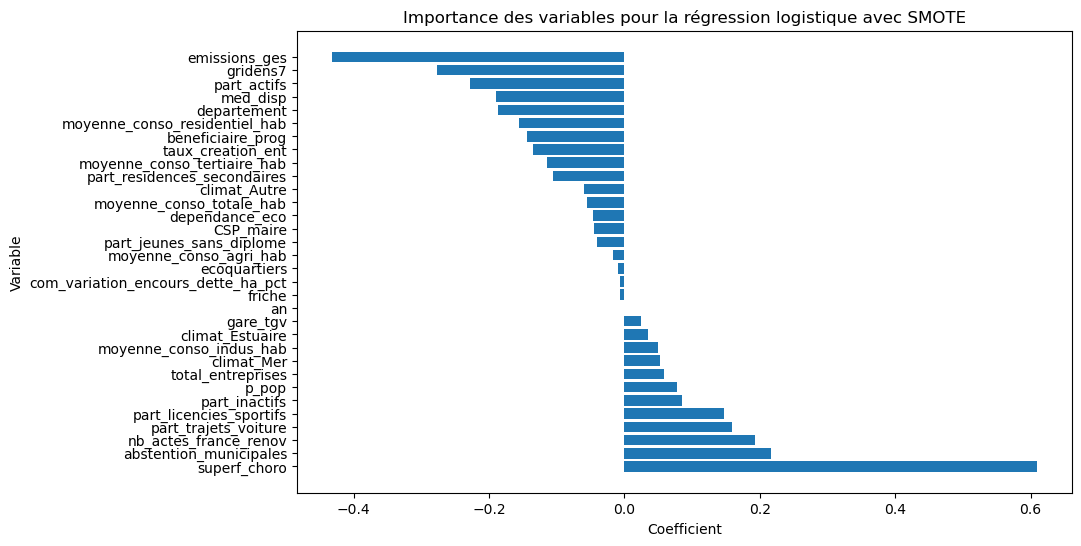

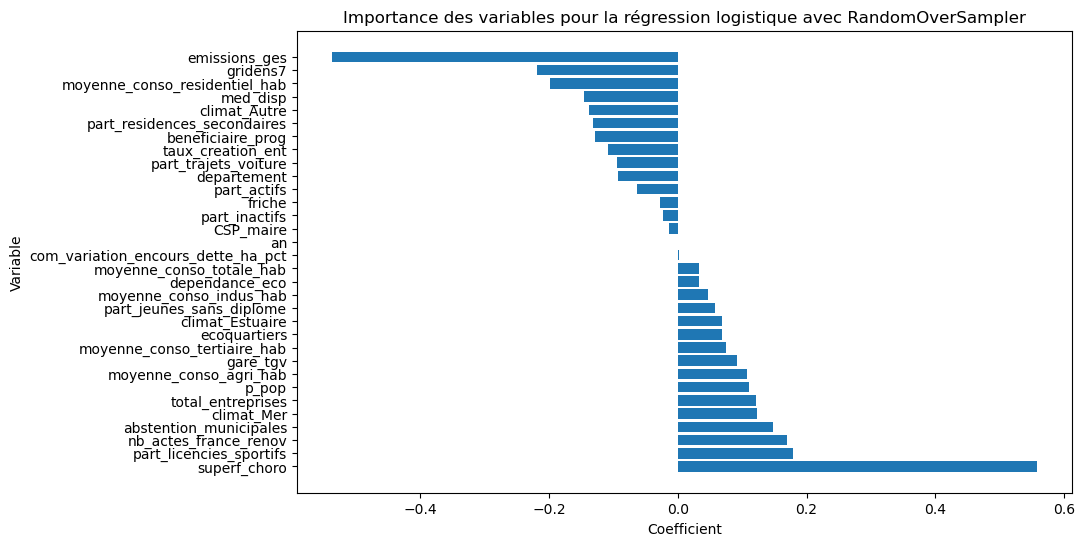

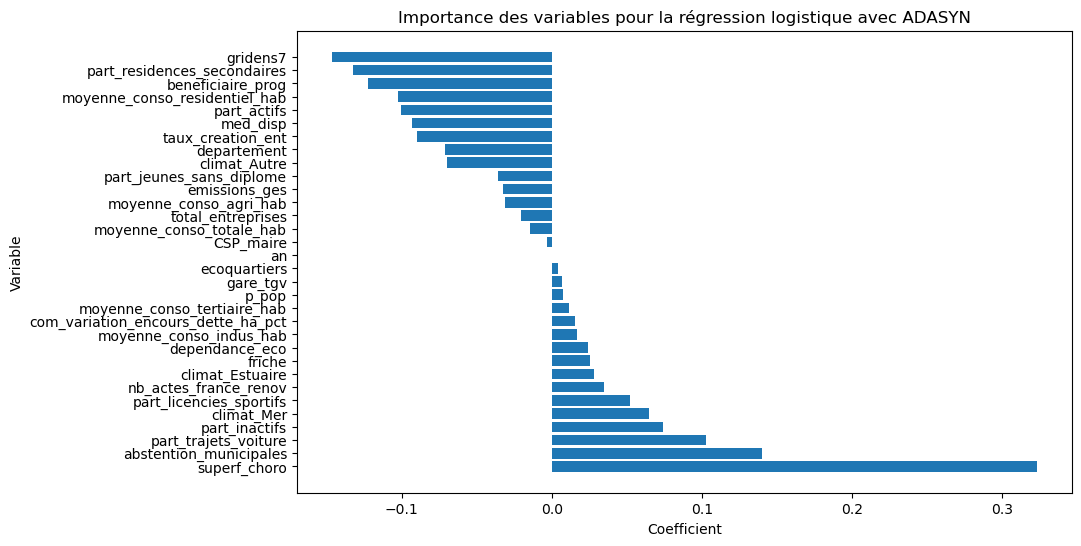

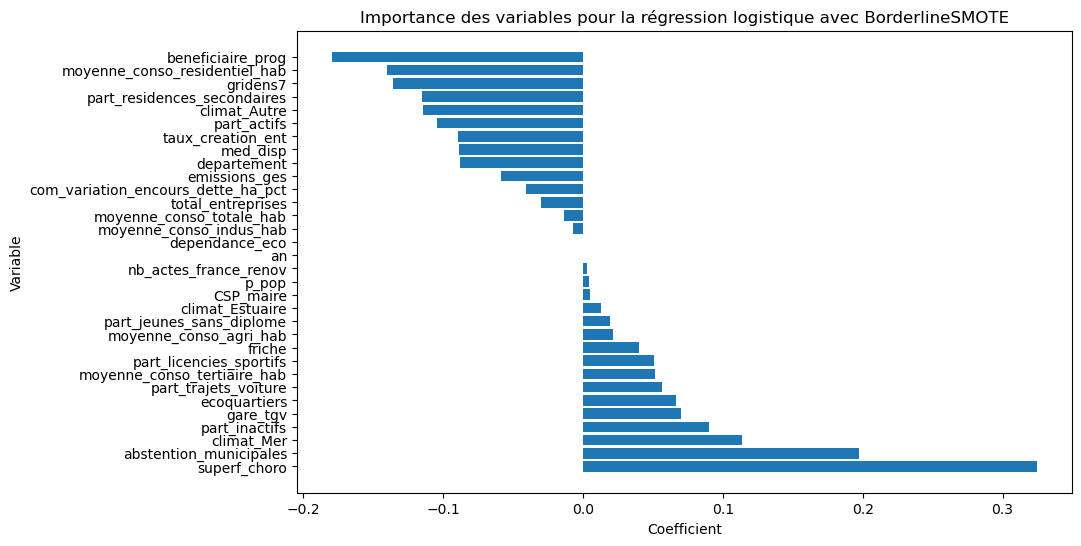

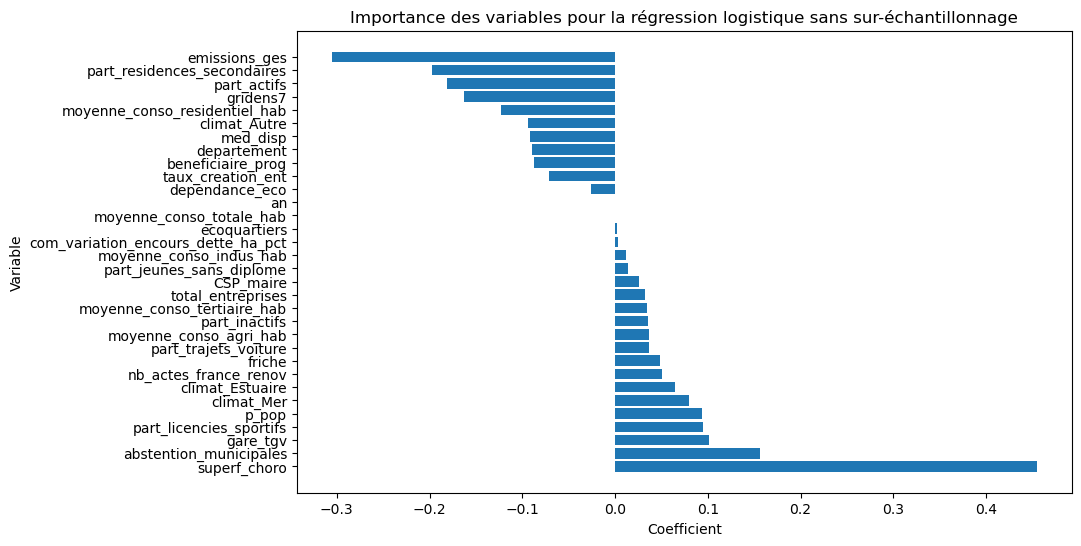

In [431]:
# Graphique pour l'importance des variables

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_reg_log_smote["Variable"], resultats_importance_variables_reg_log_smote["Coefficient"])
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Importance des variables pour la régression logistique avec SMOTE")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_reg_log_oversampler["Variable"], resultats_importance_variables_reg_log_oversampler["Coefficient"])
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Importance des variables pour la régression logistique avec RandomOverSampler")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_reg_log_adasyn["Variable"], resultats_importance_variables_reg_log_adasyn["Coefficient"])
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Importance des variables pour la régression logistique avec ADASYN")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_reg_log_borderline_smote["Variable"], resultats_importance_variables_reg_log_borderline_smote["Coefficient"])
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Importance des variables pour la régression logistique avec BorderlineSMOTE")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_reg_log["Variable"], resultats_importance_variables_reg_log["Coefficient"])
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Importance des variables pour la régression logistique sans sur-échantillonnage")
plt.show()

### F) Deuxième ajustement des hyperparamètres

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score, balanced_accuracy_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold

# Grilles de paramètres réduites pour éviter le surapprentissage
param_grid_reg_log_oversampler = {
    'oversampler__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0],
    'reg_log__C': [0.001, 0.01, 0.1, 1, 10],
    'reg_log__penalty': ['l2', None],
    'reg_log__solver': ['saga']
}

param_grid_reg_log_smote = {
    'smote__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0],
    'smote__k_neighbors': [5, 7],
    'reg_log__C': [0.001, 0.01, 0.1, 1, 10],
    'reg_log__penalty': ['l2', None],
    'reg_log__solver': ['saga']
}

param_grid_reg_log_adasyn = {
    'adasyn__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0],
    'adasyn__n_neighbors': [5, 7],
    'reg_log__penalty': ['l2', None],
    'reg_log__solver': ['saga'],
    'reg_log__C': [0.001, 0.01, 0.1, 1, 10]
}

param_grid_reg_log_borderline_smote = {
    'borderline_smote__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0],
    'borderline_smote__k_neighbors': [5, 7],
    'reg_log__C': [0.001, 0.01, 0.1, 1, 10],
    'reg_log__penalty': ['l2'],
    'reg_log__solver': ['saga']
}

grille_param_reg_log_ = {
    'reg_log__C': [0.001, 0.01, 0.1, 1, 10],
    'reg_log__penalty': ['l2', None],
    'reg_log__solver': ['saga']
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score),
    'Balanced accuracy': make_scorer(balanced_accuracy_score),
    'AUC': make_scorer(roc_auc_score)
}

# Création des RandomizedSearchCV pour chaque pipeline avec des grilles réduites
grille_recherche_reg_log_oversampler_bis = RandomizedSearchCV(
    estimator=modele_reg_log_oversampler,
    param_distributions=param_grid_reg_log_oversampler,
    scoring=scoring,
    refit='AUC',
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

grille_recherche_reg_log_smote_bis = RandomizedSearchCV(
    estimator=modele_reg_log_smote,
    param_distributions=param_grid_reg_log_smote,
    scoring=scoring,
    refit='AUC',
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

grille_recherche_reg_log_adasyn_bis = RandomizedSearchCV(
    estimator=modele_reg_log_adasyn,
    param_distributions=param_grid_reg_log_adasyn,
    scoring=scoring,
    refit='AUC',
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

grille_recherche_reg_log_borderline_smote_bis = RandomizedSearchCV(
    estimator=modele_reg_log_borderline_smote,
    param_distributions=param_grid_reg_log_borderline_smote,
    scoring=scoring,
    refit='AUC',
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

grille_recherche_reg_log_bis = RandomizedSearchCV(
    estimator=modele_reg_log,
    param_distributions=grille_param_reg_log_,
    scoring=scoring,
    refit='AUC',
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

In [ ]:
modele_reg_log_oversampler_opt_bis = grille_recherche_reg_log_oversampler_bis.fit(X_train, y_train).best_estimator_
modele_reg_log_smote_opt_bis = grille_recherche_reg_log_smote_bis.fit(X_train, y_train).best_estimator_
modele_reg_log_adasyn_opt_bis = grille_recherche_reg_log_adasyn_bis.fit(X_train, y_train).best_estimator_
modele_reg_log_borderline_smote_opt_bis = grille_recherche_reg_log_borderline_smote_bis.fit(X_train, y_train).best_estimator_
modele_reg_log_opt_bis = grille_recherche_reg_log_bis.fit(X_train, y_train).best_estimator_

In [ ]:
# Prédiction sur l'échantillon test
y_proba_reg_log_smote_cv = modele_reg_log_smote_opt_bis.predict_proba(X_test)[:, 1]
y_pred_reg_log_smote_cv = modele_reg_log_smote_opt_bis.predict(X_test)

y_proba_reg_log_oversampler_cv = modele_reg_log_oversampler_opt_bis.predict_proba(X_test)[:, 1]
y_pred_reg_log_oversampler_cv = modele_reg_log_oversampler_opt_bis.predict(X_test)

y_proba_reg_log_adasyn_cv = modele_reg_log_adasyn_opt_bis.predict_proba(X_test)[:, 1]
y_pred_reg_log_adasyn_cv = modele_reg_log_adasyn_opt_bis.predict(X_test)

y_proba_reg_log_borderline_smote_cv = modele_reg_log_borderline_smote_opt_bis.predict_proba(X_test)[:, 1]
y_pred_reg_log_borderline_smote_cv = modele_reg_log_borderline_smote_opt_bis.predict(X_test)

y_proba_reg_log_cv = modele_reg_log_opt_bis.predict_proba(X_test)[:, 1]
y_pred_reg_log_cv = modele_reg_log_opt_bis.predict(X_test)


### G) Mesure performances bis

In [ ]:
# Calcul des métriques pour chaque modèle   

# Calcul des métriques
auc_roc_reg_log_smote_cv = roc_auc_score(y_test, y_proba_reg_log_smote_cv)
f1_reg_log_smote_cv = f1_score(y_test, y_pred_reg_log_smote_cv)
balanced_acc_reg_log_smote_cv = balanced_accuracy_score(y_test, y_pred_reg_log_smote_cv)

auc_roc_reg_log_oversampler_cv = roc_auc_score(y_test, y_proba_reg_log_oversampler_cv)
f1_reg_log_oversampler_cv = f1_score(y_test, y_pred_reg_log_oversampler_cv)
balanced_acc_reg_log_oversampler_cv = balanced_accuracy_score(y_test, y_pred_reg_log_oversampler_cv)

auc_roc_reg_log_adasyn_cv = roc_auc_score(y_test, y_proba_reg_log_adasyn_cv)
f1_reg_log_adasyn_cv = f1_score(y_test, y_pred_reg_log_adasyn_cv)
balanced_acc_reg_log_adasyn_cv = balanced_accuracy_score(y_test, y_pred_reg_log_adasyn_cv)

auc_roc_reg_log_borderline_smote_cv = roc_auc_score(y_test, y_proba_reg_log_borderline_smote_cv)
f1_reg_log_borderline_smote_cv = f1_score(y_test, y_pred_reg_log_borderline_smote_cv)
balanced_acc_reg_log_borderline_smote_cv = balanced_accuracy_score(y_test, y_pred_reg_log_borderline_smote_cv)

auc_roc_reg_log_cv = roc_auc_score(y_test, y_proba_reg_log_cv)
f1_reg_log_cv = f1_score(y_test, y_pred_reg_log_cv)
balanced_acc_reg_log_cv = balanced_accuracy_score(y_test, y_pred_reg_log_cv)

# Affichage des résultats
resultats_reg_log_cv = pd.DataFrame({
    "Régression logistique sans sur-échantillonnage": [auc_roc_reg_log_cv, f1_reg_log_cv, balanced_acc_reg_log_cv],
    "Régression logistique avec SMOTE": [auc_roc_reg_log_smote_cv, f1_reg_log_smote_cv, balanced_acc_reg_log_smote_cv],
    "Régression logistique avec RandomOverSampler": [auc_roc_reg_log_oversampler_cv, f1_reg_log_oversampler_cv, balanced_acc_reg_log_oversampler_cv],
    "Régression logistique avec ADASYN": [auc_roc_reg_log_adasyn_cv, f1_reg_log_adasyn_cv, balanced_acc_reg_log_adasyn_cv],
    "Régression logistique avec BorderlineSMOTE": [auc_roc_reg_log_borderline_smote_cv, f1_reg_log_borderline_smote_cv, balanced_acc_reg_log_borderline_smote_cv]},
    index = ["AUC-ROC", "F1-score","Balanced accuracy"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_reg_log_cv = resultats_reg_log_cv.round(3)
resultats_reg_log_cv

In [ ]:
# Courbes ROC

fpr_reg_log_smote_cv, tpr_reg_log_smote_cv, _ = roc_curve(y_test, y_proba_reg_log_smote_cv)
fpr_reg_log_oversampler_cv, tpr_reg_log_oversampler_cv, _ = roc_curve(y_test, y_proba_reg_log_oversampler_cv)
fpr_reg_log_adasyn_cv, tpr_reg_log_adasyn_cv, _ = roc_curve(y_test, y_proba_reg_log_adasyn_cv)
fpr_reg_log_borderline_smote_cv, tpr_reg_log_borderline_smote_cv, _ = roc_curve(y_test, y_proba_reg_log_borderline_smote_cv)
fpr_reg_log_cv, tpr_reg_log_cv, _ = roc_curve(y_test, y_proba_reg_log_cv)

plt.figure(figsize=(10, 6))
plt.plot(fpr_reg_log_smote_cv, tpr_reg_log_smote_cv, label='Régression logistique avec SMOTE')
plt.plot(fpr_reg_log_oversampler_cv, tpr_reg_log_oversampler_cv, label='Régression logistique avec RandomOverSampler')
plt.plot(fpr_reg_log_adasyn_cv, tpr_reg_log_adasyn_cv, label='Régression logistique avec ADASYN')
plt.plot(fpr_reg_log_borderline_smote_cv, tpr_reg_log_borderline_smote_cv, label='Régression logistique avec BorderlineSMOTE')
plt.plot(fpr_reg_log_cv, tpr_reg_log_cv, label='Régression logistique sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

# Export de l'image
plt.savefig('data/Courbes_ROC_reg_log_cv.png')

plt.show()

## I.2.3. Arbres de décision

### A) Construction des modèles

In [432]:
# Construction du modèle d'arbres de décision avec rééquilibrage des classes

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.pipeline import Pipeline

etapes_arbre_oversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler(sampling_strategy = 0.4)), # Sur-échantillonnage
        ('arbre', DecisionTreeClassifier(max_depth=5, random_state=42)), # Arbre de décision
        ]

etapes_arbre_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('smote', SMOTE(k_neighbors= 5)), # Sur-échantillonnage
        ('arbre', DecisionTreeClassifier(max_depth=5, random_state=42)), # Arbre de décision
        ]

etapes_arbre_adasyn = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('adasyn', ADASYN(n_neighbors = 5)), # Sur-échantillonnage
        ('arbre', DecisionTreeClassifier(max_depth=5, random_state=42)), # Arbre de décision
        ]

etapes_arbre_borderline_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('borderline_smote', BorderlineSMOTE(k_neighbors = 5)), # Sur-échantillonnage
        ('arbre', DecisionTreeClassifier(max_depth=5, random_state=42)), # Arbre de décision
        ]

etapes_arbres = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('arbre', DecisionTreeClassifier(max_depth=5, random_state=42)), # Arbre de décision
        ]

# Justification de max_depth=5 : pour éviter l'overfitting
# On a choisi la valeur 5 car c'est une valeur standard qui permet de ne pas trop complexifier l'arbre de décision

modele_arbre_oversampler = Pipeline(steps=etapes_arbre_oversampler) # Création du pipeline
modele_arbre_smote = Pipeline(steps=etapes_arbre_smote) # Création du pipeline
modele_arbre_adasyn = Pipeline(steps=etapes_arbre_adasyn) # Création du pipeline
modele_arbre_borderline_smote = Pipeline(steps=etapes_arbre_borderline_smote) # Création du pipeline
modele_arbre = Pipeline(steps=etapes_arbres) # Création du pipeline

In [433]:
modele_arbre_oversampler.fit(X_train, y_train) # Entraînement
modele_arbre_smote.fit(X_train, y_train) # Entraînement
modele_arbre_adasyn.fit(X_train, y_train) # Entraînement
modele_arbre_borderline_smote.fit(X_train, y_train) # Entraînement
modele_arbre.fit(X_train, y_train) # Entraînement

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('arbre',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

In [434]:
# Prédictions

y_proba_arbre_oversampler = modele_arbre_oversampler.predict_proba(X_test)[:, 1]
y_pred_arbre_oversampler = modele_arbre_oversampler.predict(X_test)

y_proba_arbre_smote = modele_arbre_smote.predict_proba(X_test)[:, 1]
y_pred_arbre_smote = modele_arbre_smote.predict(X_test)

y_proba_arbre_adasyn = modele_arbre_adasyn.predict_proba(X_test)[:, 1]
y_pred_arbre_adasyn = modele_arbre_adasyn.predict(X_test)

y_proba_arbre_borderline_smote = modele_arbre_borderline_smote.predict_proba(X_test)[:, 1]
y_pred_arbre_borderline_smote = modele_arbre_borderline_smote.predict(X_test)

y_proba_arbre = modele_arbre.predict_proba(X_test)[:, 1]
y_pred_arbre = modele_arbre.predict(X_test)

### B) Mesure de la performance des modèles initiaux

In [435]:
# Calcul des métriques

from sklearn.metrics import roc_auc_score, average_precision_score, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, cohen_kappa_score

auc_roc_arbre_oversampler = roc_auc_score(y_test, y_proba_arbre_oversampler)
auc_pr_arbre_oversampler = average_precision_score(y_test, y_proba_arbre_oversampler)
log_loss_value_arbre_oversampler = log_loss(y_test, y_proba_arbre_oversampler)
precision_arbre_oversampler = precision_score(y_test, y_pred_arbre_oversampler)
recall_arbre_oversampler = recall_score(y_test, y_pred_arbre_oversampler)
f1_arbre_oversampler = f1_score(y_test, y_pred_arbre_oversampler)
mcc_arbre_oversampler = matthews_corrcoef(y_test, y_pred_arbre_oversampler)
balanced_acc_arbre_oversampler = balanced_accuracy_score(y_test, y_pred_arbre_oversampler)
specificity_arbre_oversampler = confusion_matrix(y_test, y_pred_arbre_oversampler)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_oversampler)[0, 0] + confusion_matrix(y_test, y_pred_arbre_oversampler)[0, 1])
cohen_kappa_arbre_oversampler = cohen_kappa_score(y_test, y_pred_arbre_oversampler)

In [436]:
auc_roc_arbre_smote = roc_auc_score(y_test, y_proba_arbre_smote)
auc_pr_arbre_smote = average_precision_score(y_test, y_proba_arbre_smote)
log_loss_value_arbre_smote = log_loss(y_test, y_proba_arbre_smote)
precision_arbre_smote = precision_score(y_test, y_pred_arbre_smote)
recall_arbre_smote = recall_score(y_test, y_pred_arbre_smote)
f1_arbre_smote = f1_score(y_test, y_pred_arbre_smote)
mcc_arbre_smote = matthews_corrcoef(y_test, y_pred_arbre_smote)
balanced_acc_arbre_smote = balanced_accuracy_score(y_test, y_pred_arbre_smote)
specificity_arbre_smote = confusion_matrix(y_test, y_pred_arbre_smote)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_smote)[0, 0] + confusion_matrix(y_test, y_pred_arbre_smote)[0, 1])
cohen_kappa_arbre_smote = cohen_kappa_score(y_test, y_pred_arbre_smote)

In [437]:
auc_roc_arbre_adasyn = roc_auc_score(y_test, y_proba_arbre_adasyn)
auc_pr_arbre_adasyn = average_precision_score(y_test, y_proba_arbre_adasyn)
log_loss_value_arbre_adasyn = log_loss(y_test, y_proba_arbre_adasyn)
precision_arbre_adasyn = precision_score(y_test, y_pred_arbre_adasyn)
recall_arbre_adasyn = recall_score(y_test, y_pred_arbre_adasyn)
f1_arbre_adasyn = f1_score(y_test, y_pred_arbre_adasyn)
mcc_arbre_adasyn = matthews_corrcoef(y_test, y_pred_arbre_adasyn)
balanced_acc_arbre_adasyn = balanced_accuracy_score(y_test, y_pred_arbre_adasyn)
specificity_arbre_adasyn = confusion_matrix(y_test, y_pred_arbre_adasyn)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_adasyn)[0, 0] + confusion_matrix(y_test, y_pred_arbre_adasyn)[0, 1])
cohen_kappa_arbre_adasyn = cohen_kappa_score(y_test, y_pred_arbre_adasyn)

In [438]:
auc_roc_arbre_borderline_smote = roc_auc_score(y_test, y_proba_arbre_borderline_smote)
auc_pr_arbre_borderline_smote = average_precision_score(y_test, y_proba_arbre_borderline_smote)
log_loss_value_arbre_borderline_smote = log_loss(y_test, y_proba_arbre_borderline_smote)
precision_arbre_borderline_smote = precision_score(y_test, y_pred_arbre_borderline_smote)
recall_arbre_borderline_smote = recall_score(y_test, y_pred_arbre_borderline_smote)
f1_arbre_borderline_smote = f1_score(y_test, y_pred_arbre_borderline_smote)
mcc_arbre_borderline_smote = matthews_corrcoef(y_test, y_pred_arbre_borderline_smote)
balanced_acc_arbre_borderline_smote = balanced_accuracy_score(y_test, y_pred_arbre_borderline_smote)
specificity_arbre_borderline_smote = confusion_matrix(y_test, y_pred_arbre_borderline_smote)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_borderline_smote)[0, 0] + confusion_matrix(y_test, y_pred_arbre_borderline_smote)[0, 1])
cohen_kappa_arbre_borderline_smote = cohen_kappa_score(y_test, y_pred_arbre_borderline_smote)

In [439]:
auc_roc_arbre = roc_auc_score(y_test, y_proba_arbre)
auc_pr_arbre = average_precision_score(y_test, y_proba_arbre)
log_loss_value_arbre = log_loss(y_test, y_proba_arbre)
precision_arbre = precision_score(y_test, y_pred_arbre)
recall_arbre = recall_score(y_test, y_pred_arbre)
f1_arbre = f1_score(y_test, y_pred_arbre)
mcc_arbre = matthews_corrcoef(y_test, y_pred_arbre)
balanced_acc_arbre = balanced_accuracy_score(y_test, y_pred_arbre)
specificity_arbre = confusion_matrix(y_test, y_pred_arbre)[0, 0] / (confusion_matrix(y_test, y_pred_arbre)[0, 0] + confusion_matrix(y_test, y_pred_arbre)[0, 1])
cohen_kappa_arbre = cohen_kappa_score(y_test, y_pred_arbre)

In [440]:
# Affichage des résultats
resultats_arbres = pd.DataFrame({
    "Arbre de décision sans sur-échantillonnage": [auc_roc_arbre, auc_pr_arbre, f1_arbre, balanced_acc_arbre],
    "Arbre de décision avec SMOTE": [auc_roc_arbre_smote, auc_pr_arbre_smote, f1_arbre_smote, balanced_acc_arbre_smote],
    "Arbre de décision avec RandomOverSampler": [auc_roc_arbre_oversampler, auc_pr_arbre_oversampler, f1_arbre_oversampler, balanced_acc_arbre_oversampler],
    "Arbre de décision avec ADASYN": [auc_roc_arbre_adasyn, auc_pr_arbre_adasyn, f1_arbre_adasyn, balanced_acc_arbre_adasyn],
    "Arbre de décision avec BorderlineSMOTE": [auc_roc_arbre_borderline_smote, auc_pr_arbre_borderline_smote, f1_arbre_borderline_smote, balanced_acc_arbre_borderline_smote]
    },
    index = ["AUC-ROC", "AUC-PR", "F1-score", "Balanced accuracy"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_arbres = resultats_arbres.round(3)
resultats_arbres

Arbre de décision sans sur-échantillonnage  \
AUC-ROC                                                 0.647   
AUC-PR                                                  0.237   
F1-score                                                0.203   
Balanced accuracy                                       0.542   

                   Arbre de décision avec SMOTE  \
AUC-ROC                                   0.574   
AUC-PR                                    0.182   
F1-score                                  0.270   
Balanced accuracy                         0.549   

                   Arbre de décision avec RandomOverSampler  \
AUC-ROC                                               0.620   
AUC-PR                                                0.204   
F1-score                                              0.265   
Balanced accuracy                                     0.563   

                   Arbre de décision avec ADASYN  \
AUC-ROC                                    0.573   
AUC-PR                                     0.177   
F1-score                                   0.262   
Balanced accuracy                          0.540   

                   Arbre de décision avec BorderlineSMOTE  
AUC-ROC                                             0.542  
AUC-PR                                              0.176  
F1-score                                            0.271  
Balanced accuracy                                   0.563

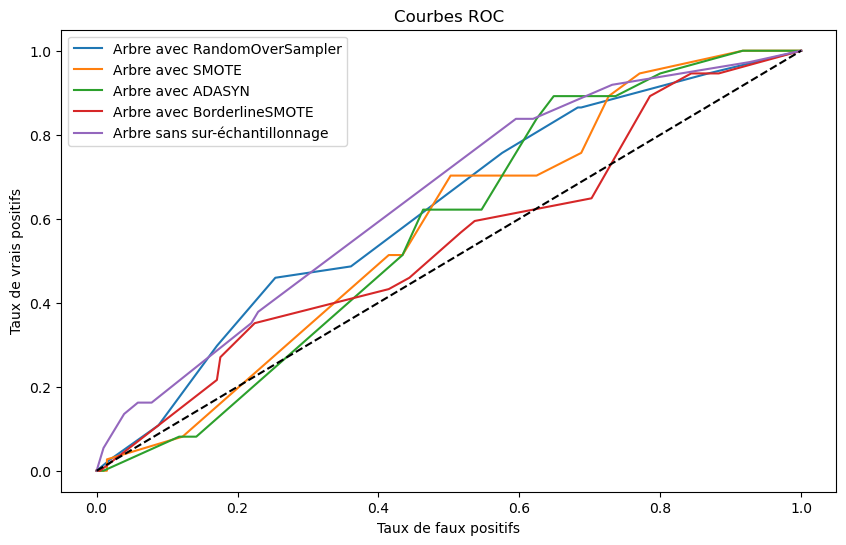

In [441]:
# Tracé des courbes ROC

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr_arbre_oversampler, tpr_arbre_oversampler, _ = roc_curve(y_test, y_proba_arbre_oversampler)
fpr_arbre_smote, tpr_arbre_smote, _ = roc_curve(y_test, y_proba_arbre_smote)
fpr_arbre_adasyn, tpr_arbre_adasyn, _ = roc_curve(y_test, y_proba_arbre_adasyn)
fpr_arbre_borderline_smote, tpr_arbre_borderline_smote, _ = roc_curve(y_test, y_proba_arbre_borderline_smote)
fpr_arbre, tpr_arbre, _ = roc_curve(y_test, y_proba_arbre)

plt.figure(figsize=(10, 6))
plt.plot(fpr_arbre_oversampler, tpr_arbre_oversampler, label='Arbre avec RandomOverSampler')
plt.plot(fpr_arbre_smote, tpr_arbre_smote, label='Arbre avec SMOTE')
plt.plot(fpr_arbre_adasyn, tpr_arbre_adasyn, label='Arbre avec ADASYN')
plt.plot(fpr_arbre_borderline_smote, tpr_arbre_borderline_smote, label='Arbre avec BorderlineSMOTE')
plt.plot(fpr_arbre, tpr_arbre, label='Arbre sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

# Sauvegarde et export de l'image
plt.savefig('data/Courbes_ROC_arbres.png')

plt.show()



### C) Ajustement des hyperparamètres

In [442]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, cohen_kappa_score, balanced_accuracy_score, make_scorer, roc_auc_score

# Grilles de paramètres adaptées pour éviter le surapprentissage
param_grid_arbres_oversampler = {
    'oversampler__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0],  # Stratégies simplifiées pour échantillonnage
    'arbre__criterion': ['gini', 'entropy', 'log_loss'],
    'arbre__max_depth': [3, 6, 9, 15, 21, 27],  # Réduction des profondeurs possibles pour limiter la complexité
    'arbre__min_samples_split': [2, 5, 10, 20, 30],  # Augmentation de min_samples_split pour éviter surapprentissage
    'arbre__min_samples_leaf': [1, 2, 4]  # Augmentation de min_samples_leaf pour éviter surapprentissage
}

param_grid_arbres_smote = {
    'smote__k_neighbors': [3, 5, 7],  # Réduction des voisins pour SMOTE
    'smote__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0], 
    'arbre__criterion': ['gini', 'entropy', 'log_loss'],
    'arbre__max_depth': [3, 6, 9, 15, 21, 27],  # Réduction des profondeurs possibles pour limiter la complexité
    'arbre__min_samples_split': [2, 5, 10, 20, 30],  # Augmentation de min_samples_split pour éviter surapprentissage
    'arbre__min_samples_leaf': [1, 2, 4]  # Augmentation de min_samples_leaf pour éviter surapprentissage
}

param_grid_arbres_adasyn = {
    'adasyn__n_neighbors': [3, 5, 7], 
    'adasyn__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0], 
    'arbre__criterion': ['gini', 'entropy', 'log_loss'],
    'arbre__max_depth': [3, 6, 9, 15, 21, 27],  # Réduction des profondeurs possibles pour limiter la complexité
    'arbre__min_samples_split': [2, 5, 10, 20, 30],  # Augmentation de min_samples_split pour éviter surapprentissage
    'arbre__min_samples_leaf': [1, 2, 4]  # Augmentation de min_samples_leaf pour éviter surapprentissage
}

param_grid_arbres_borderline_smote = {
    'borderline_smote__k_neighbors': [3, 5, 7], 
    'borderline_smote__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0],
    'arbre__criterion': ['gini', 'entropy', 'log_loss'],
    'arbre__max_depth': [3, 6, 9, 15, 21, 27],  # Réduction des profondeurs possibles pour limiter la complexité
    'arbre__min_samples_split': [2, 5, 10, 20, 30],  # Augmentation de min_samples_split pour éviter surapprentissage
    'arbre__min_samples_leaf': [1, 2, 4]  # Augmentation de min_samples_leaf pour éviter surapprentissage
}
param_grid_arbres = {
    'arbre__criterion': ['gini', 'entropy', 'log_loss'],
    'arbre__max_depth': [3, 6, 9, 15, 21, 27],  # Réduction des profondeurs possibles pour limiter la complexité
    'arbre__min_samples_split': [2, 5, 10, 20, 30],  # Augmentation de min_samples_split pour éviter surapprentissage
    'arbre__min_samples_leaf': [1, 2, 4]  # Augmentation de min_samples_leaf pour éviter surapprentissage
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score),
    'Balanced accuracy': make_scorer(balanced_accuracy_score),
    'AUC': make_scorer(roc_auc_score),
}

In [443]:
# Ajustement des hyperparamètres

grille_recherche_arbre_oversampler = RandomizedSearchCV(modele_arbre_oversampler, param_grid_arbres_oversampler, cv=cv, scoring=scoring, refit = 'AUC',n_jobs=-1, random_state=42)
grille_recherche_arbre_smote = RandomizedSearchCV(modele_arbre_smote, param_grid_arbres_smote, cv=cv, scoring=scoring, refit = 'AUC',n_jobs=-1, random_state=42)
grille_recherche_arbre_adasyn = RandomizedSearchCV(modele_arbre_adasyn, param_grid_arbres_adasyn, cv=cv, scoring=scoring, refit = 'AUC',n_jobs=-1, random_state=42)
grille_recherche_arbre_borderline_smote = RandomizedSearchCV(modele_arbre_borderline_smote, param_grid_arbres_borderline_smote, cv=cv, scoring=scoring, refit = 'AUC',n_jobs=-1, random_state=42)
grille_recherche_arbre = RandomizedSearchCV(modele_arbre, param_grid_arbres, cv=cv, scoring=scoring, refit = 'AUC',n_jobs=-1, random_state=42)

In [444]:
modele_arbre_oversampler_opt = grille_recherche_arbre_oversampler.fit(X_train, y_train).best_estimator_ 

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(

In [445]:
modele_arbre_smote_opt = grille_recherche_arbre_smote.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
110 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(

In [446]:
modele_arbre_adasyn_opt = grille_recherche_arbre_adasyn.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
130 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
130 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(

In [447]:
modele_arbre_borderline_smote_opt = grille_recherche_arbre_borderline_smote.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
110 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(

In [448]:
modele_arbre_opt = grille_recherche_arbre.fit(X_train, y_train).best_estimator_

In [449]:
# Prédictions avec les meilleurs hyperparamètres

y_proba_arbre_oversampler_cv = modele_arbre_oversampler_opt.predict_proba(X_test)[:, 1]
y_pred_arbre_oversampler_cv = modele_arbre_oversampler_opt.predict(X_test)

y_proba_arbre_smote_cv = modele_arbre_smote_opt.predict_proba(X_test)[:, 1]
y_pred_arbre_smote_cv = modele_arbre_smote_opt.predict(X_test)

y_proba_arbre_adasyn_cv = modele_arbre_adasyn_opt.predict_proba(X_test)[:, 1]
y_pred_arbre_adasyn_cv = modele_arbre_adasyn_opt.predict(X_test)

y_proba_arbre_borderline_smote_cv = modele_arbre_borderline_smote_opt.predict_proba(X_test)[:, 1]
y_pred_arbre_borderline_smote_cv = modele_arbre_borderline_smote_opt.predict(X_test)

y_proba_arbre_cv = modele_arbre_opt.predict_proba(X_test)[:, 1]
y_pred_arbre_cv = modele_arbre_opt.predict(X_test)

### D) Mesure de la performance des modèles optimisés

In [450]:
# Mesure de la performance

# Calcul des métriques
auc_roc_arbre_oversampler_cv = roc_auc_score(y_test, y_proba_arbre_oversampler_cv)
auc_pr_arbre_oversampler_cv = average_precision_score(y_test, y_proba_arbre_oversampler_cv)
log_loss_value_arbre_oversampler_cv = log_loss(y_test, y_proba_arbre_oversampler_cv)
precision_arbre_oversampler_cv = precision_score(y_test, y_pred_arbre_oversampler_cv)
recall_arbre_oversampler_cv = recall_score(y_test, y_pred_arbre_oversampler_cv)
f1_arbre_oversampler_cv = f1_score(y_test, y_pred_arbre_oversampler_cv)
mcc_arbre_oversampler_cv = matthews_corrcoef(y_test, y_pred_arbre_oversampler_cv)
balanced_acc_arbre_oversampler_cv = balanced_accuracy_score(y_test, y_pred_arbre_oversampler_cv)
specificity_arbre_oversampler_cv = confusion_matrix(y_test, y_pred_arbre_oversampler_cv)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_oversampler_cv)[0, 0] + confusion_matrix(y_test, y_pred_arbre_oversampler_cv)[0, 1])
cohen_kappa_arbre_oversampler_cv = cohen_kappa_score(y_test, y_pred_arbre_oversampler_cv)

auc_roc_arbre_smote_cv = roc_auc_score(y_test, y_proba_arbre_smote_cv)
auc_pr_arbre_smote_cv = average_precision_score(y_test, y_proba_arbre_smote_cv)
log_loss_value_arbre_smote_cv = log_loss(y_test, y_proba_arbre_smote_cv)
precision_arbre_smote_cv = precision_score(y_test, y_pred_arbre_smote_cv)
recall_arbre_smote_cv = recall_score(y_test, y_pred_arbre_smote_cv)
f1_arbre_smote_cv = f1_score(y_test, y_pred_arbre_smote_cv)
mcc_arbre_smote_cv = matthews_corrcoef(y_test, y_pred_arbre_smote_cv)
specificity_arbre_smote_cv = confusion_matrix(y_test, y_pred_arbre_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_arbre_smote_cv)[0, 1])
balanced_acc_arbre_smote_cv = balanced_accuracy_score(y_test, y_pred_arbre_smote_cv)
cohen_kappa_arbre_smote_cv = cohen_kappa_score(y_test, y_pred_arbre_smote_cv)

auc_roc_arbre_adasyn_cv = roc_auc_score(y_test, y_proba_arbre_adasyn_cv)
auc_pr_arbre_adasyn_cv = average_precision_score(y_test, y_proba_arbre_adasyn_cv)
log_loss_value_arbre_adasyn_cv = log_loss(y_test, y_proba_arbre_adasyn_cv)
precision_arbre_adasyn_cv = precision_score(y_test, y_pred_arbre_adasyn_cv)
recall_arbre_adasyn_cv = recall_score(y_test, y_pred_arbre_adasyn_cv)
f1_arbre_adasyn_cv = f1_score(y_test, y_pred_arbre_adasyn_cv)
mcc_arbre_adasyn_cv = matthews_corrcoef(y_test, y_pred_arbre_adasyn_cv)
balanced_acc_arbre_adasyn_cv = balanced_accuracy_score(y_test, y_pred_arbre_adasyn_cv)
specificity_arbre_adasyn_cv = confusion_matrix(y_test, y_pred_arbre_adasyn_cv)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_adasyn_cv)[0, 0] + confusion_matrix(y_test, y_pred_arbre_adasyn_cv)[0, 1])
cohen_kappa_arbre_adasyn_cv = cohen_kappa_score(y_test, y_pred_arbre_adasyn_cv)

auc_roc_arbre_borderline_smote_cv = roc_auc_score(y_test, y_proba_arbre_borderline_smote_cv)
auc_pr_arbre_borderline_smote_cv = average_precision_score(y_test, y_proba_arbre_borderline_smote_cv)
log_loss_value_arbre_borderline_smote_cv = log_loss(y_test, y_proba_arbre_borderline_smote_cv)
precision_arbre_borderline_smote_cv = precision_score(y_test, y_pred_arbre_borderline_smote_cv)
recall_arbre_borderline_smote_cv = recall_score(y_test, y_pred_arbre_borderline_smote_cv)
f1_arbre_borderline_smote_cv = f1_score(y_test, y_pred_arbre_borderline_smote_cv)
mcc_arbre_borderline_smote_cv = matthews_corrcoef(y_test, y_pred_arbre_borderline_smote_cv)
balanced_acc_arbre_borderline_smote_cv = balanced_accuracy_score(y_test, y_pred_arbre_borderline_smote_cv)
specificity_arbre_borderline_smote_cv = confusion_matrix(y_test, y_pred_arbre_borderline_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_borderline_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_arbre_borderline_smote_cv)[0, 1])
cohens_kappa_arbre_borderline_smote_cv = cohen_kappa_score(y_test, y_pred_arbre_borderline_smote_cv)

auc_roc_arbre_cv = roc_auc_score(y_test, y_proba_arbre_cv)
auc_pr_arbre_cv = average_precision_score(y_test, y_proba_arbre_cv)
log_loss_value_arbre_cv = log_loss(y_test, y_proba_arbre_cv)
precision_arbre_cv = precision_score(y_test, y_pred_arbre_cv)
recall_arbre_cv = recall_score(y_test, y_pred_arbre_cv)
f1_arbre_cv = f1_score(y_test, y_pred_arbre_cv)
mcc_arbre_cv = matthews_corrcoef(y_test, y_pred_arbre_cv)
balanced_acc_arbre_cv = balanced_accuracy_score(y_test, y_pred_arbre_cv)
specificity_arbre_cv = confusion_matrix(y_test, y_pred_arbre_cv)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_cv)[0, 0] + confusion_matrix(y_test, y_pred_arbre_cv)[0, 1])
cohen_kappa_arbre_cv = cohen_kappa_score(y_test, y_pred_arbre_cv)

In [451]:
# Affichage des résultats

resultats_arbres_cv = pd.DataFrame({
    "Arbre de décision sans sur-échantillonnage": [auc_roc_arbre_cv, auc_pr_arbre_cv, f1_arbre_cv, balanced_acc_arbre_cv],
    "Arbre de décision avec SMOTE": [auc_roc_arbre_smote_cv, auc_pr_arbre_smote_cv, f1_arbre_smote_cv, balanced_acc_arbre_smote_cv],
    "Arbre de décision avec RandomOverSampler": [auc_roc_arbre_oversampler_cv, auc_pr_arbre_oversampler_cv,  f1_arbre_oversampler_cv, balanced_acc_arbre_oversampler_cv],
    "Arbre de décision avec ADASYN": [auc_roc_arbre_adasyn_cv, auc_pr_arbre_adasyn_cv, f1_arbre_adasyn_cv, balanced_acc_arbre_adasyn_cv ],
    "Arbre de décision avec BorderlineSMOTE": [auc_roc_arbre_borderline_smote_cv, auc_pr_arbre_borderline_smote_cv, f1_arbre_borderline_smote_cv, balanced_acc_arbre_borderline_smote_cv]
    },
    index = ["AUC-ROC", "AUC-PR", "F1", "Balanced Accuracy"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_arbres_cv = resultats_arbres_cv.round(3)
resultats_arbres_cv


Arbre de décision sans sur-échantillonnage  \
AUC-ROC                                                 0.664   
AUC-PR                                                  0.239   
F1                                                      0.233   
Balanced Accuracy                                       0.556   

                   Arbre de décision avec SMOTE  \
AUC-ROC                                   0.594   
AUC-PR                                    0.199   
F1                                        0.309   
Balanced Accuracy                         0.593   

                   Arbre de décision avec RandomOverSampler  \
AUC-ROC                                               0.487   
AUC-PR                                                0.154   
F1                                                    0.120   
Balanced Accuracy                                     0.468   

                   Arbre de décision avec ADASYN  \
AUC-ROC                                    0.549   
AUC-PR                                     0.182   
F1                                         0.291   
Balanced Accuracy                          0.577   

                   Arbre de décision avec BorderlineSMOTE  
AUC-ROC                                             0.572  
AUC-PR                                              0.179  
F1                                                  0.227  
Balanced Accuracy                                   0.529

In [452]:
# Export
resultats_arbres_cv.to_csv("data/resultats_arbres_opt.csv", index=True)
latex_table_arbres = resultats_arbres_cv.to_latex(index=True)
print(latex_table_arbres)

\begin{tabular}{lrrrrr}
\toprule
 & Arbre de décision sans sur-échantillonnage & Arbre de décision avec SMOTE & Arbre de décision avec RandomOverSampler & Arbre de décision avec ADASYN & Arbre de décision avec BorderlineSMOTE \\
\midrule
AUC-ROC & 0.664000 & 0.594000 & 0.487000 & 0.549000 & 0.572000 \\
AUC-PR & 0.239000 & 0.199000 & 0.154000 & 0.182000 & 0.179000 \\
F1 & 0.233000 & 0.309000 & 0.120000 & 0.291000 & 0.227000 \\
Balanced Accuracy & 0.556000 & 0.593000 & 0.468000 & 0.577000 & 0.529000 \\
\bottomrule
\end{tabular}



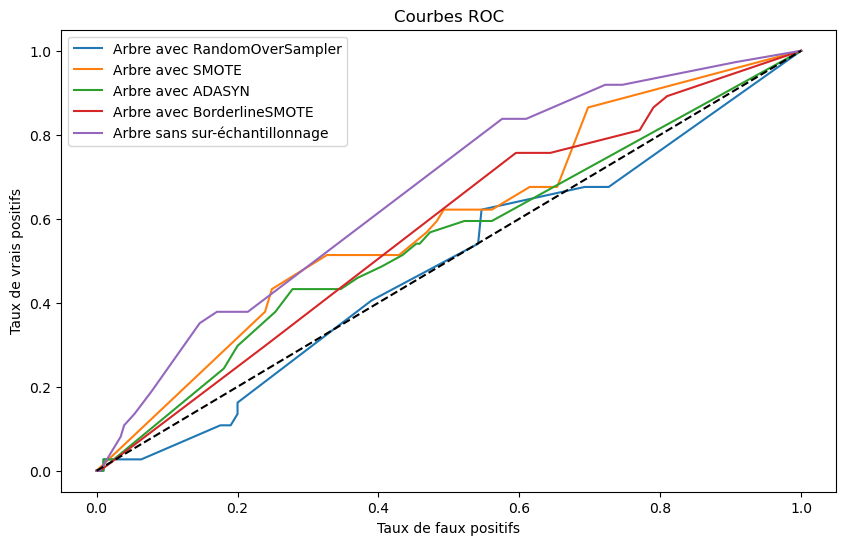

In [453]:
# Comparaison des courbes ROC

fpr_arbre_oversampler_cv, tpr_arbre_oversampler_cv, _ = roc_curve(y_test, y_proba_arbre_oversampler_cv)
fpr_arbre_smote_cv, tpr_arbre_smote_cv, _ = roc_curve(y_test, y_proba_arbre_smote_cv)
fpr_arbre_adasyn_cv, tpr_arbre_adasyn_cv, _ = roc_curve(y_test, y_proba_arbre_adasyn_cv)
fpr_arbre_borderline_smote_cv, tpr_arbre_borderline_smote_cv, _ = roc_curve(y_test, y_proba_arbre_borderline_smote_cv)
fpr_arbre_cv, tpr_arbre_cv, _ = roc_curve(y_test, y_proba_arbre_cv)

plt.figure(figsize=(10, 6))
plt.plot(fpr_arbre_oversampler_cv, tpr_arbre_oversampler_cv, label='Arbre avec RandomOverSampler')
plt.plot(fpr_arbre_smote_cv, tpr_arbre_smote_cv, label='Arbre avec SMOTE')
plt.plot(fpr_arbre_adasyn_cv, tpr_arbre_adasyn_cv, label='Arbre avec ADASYN')
plt.plot(fpr_arbre_borderline_smote_cv, tpr_arbre_borderline_smote_cv, label='Arbre avec BorderlineSMOTE')
plt.plot(fpr_arbre_cv, tpr_arbre_cv, label='Arbre sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

# Export de l'image
plt.savefig('data/Courbes_ROC_arbres_cv.png')

plt.show()

### E) Importance des variables

In [454]:
# Importance des variables

# Récupération de l'importance des variables pour chaque modèle
importances_arbre_oversampler = modele_arbre_oversampler_opt.named_steps['arbre'].feature_importances_
importances_arbre_smote = modele_arbre_smote_opt.named_steps['arbre'].feature_importances_
importances_arbre_adasyn = modele_arbre_adasyn_opt.named_steps['arbre'].feature_importances_
importances_arbre_borderline_smote = modele_arbre_borderline_smote_opt.named_steps['arbre'].feature_importances_
importances_arbre = modele_arbre_opt.named_steps['arbre'].feature_importances_

# Création d'un DataFrame pour afficher les résultats
resultats_importance_variables_arbre_oversampler = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_arbre_oversampler
})

resultats_importance_variables_arbre_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_arbre_smote
})

resultats_importance_variables_arbre_adasyn = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_arbre_adasyn
})

resultats_importance_variables_arbre_borderline_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_arbre_borderline_smote
})

resultats_importance_variables_arbre = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_arbre
})

# Affichage des résultats
resultats_importance_variables_arbre_oversampler = resultats_importance_variables_arbre_oversampler.sort_values(by="Importance", ascending=False)
resultats_importance_variables_arbre_smote = resultats_importance_variables_arbre_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_arbre_adasyn = resultats_importance_variables_arbre_adasyn.sort_values(by="Importance", ascending=False)
resultats_importance_variables_arbre_borderline_smote = resultats_importance_variables_arbre_borderline_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_arbre = resultats_importance_variables_arbre.sort_values(by="Importance", ascending=False)

resultats_importance_variables_arbre_oversampler

Variable  Importance
18                               p_pop    0.186351
22                         part_actifs    0.119433
27             part_licencies_sportifs    0.080946
16                            med_disp    0.070448
12                        superf_choro    0.065025
5                        emissions_ges    0.064517
9          part_residences_secondaires    0.062466
20  com_variation_encours_dette_ha_pct    0.061564
6                nb_actes_france_renov    0.043430
23                      dependance_eco    0.031245
28            part_jeunes_sans_diplome    0.029517
2          moyenne_conso_tertiaire_hab    0.027813
29                        climat_Autre    0.024774
15                part_trajets_voiture    0.024054
11                            gridens7    0.023646
24              abstention_municipales    0.023111
0               moyenne_conso_agri_hab    0.022742
1              moyenne_conso_indus_hab    0.022492
4             moyenne_conso_totale_hab    0.016426
17                                  an    0.000000
19                           CSP_maire    0.000000
14                            gare_tgv    0.000000
21                       part_inactifs    0.000000
13                         departement    0.000000
10                   beneficiaire_prog    0.000000
8                         ecoquartiers    0.000000
25                   taux_creation_ent    0.000000
26                   total_entreprises    0.000000
7                               friche    0.000000
3        moyenne_conso_residentiel_hab    0.000000
30                     climat_Estuaire    0.000000
31                          climat_Mer    0.000000

In [455]:
resultats_importance_variables_arbre_smote

Variable  Importance
7                               friche    0.469015
1              moyenne_conso_indus_hab    0.170455
13                         departement    0.085944
5                        emissions_ges    0.054097
6                nb_actes_france_renov    0.052590
25                   taux_creation_ent    0.033833
20  com_variation_encours_dette_ha_pct    0.031385
21                       part_inactifs    0.024944
15                part_trajets_voiture    0.022263
9          part_residences_secondaires    0.018922
22                         part_actifs    0.015809
18                               p_pop    0.010736
28            part_jeunes_sans_diplome    0.010008
23                      dependance_eco    0.000000
0               moyenne_conso_agri_hab    0.000000
24              abstention_municipales    0.000000
27             part_licencies_sportifs    0.000000
29                        climat_Autre    0.000000
30                     climat_Estuaire    0.000000
26                   total_entreprises    0.000000
16                            med_disp    0.000000
19                           CSP_maire    0.000000
17                                  an    0.000000
14                            gare_tgv    0.000000
12                        superf_choro    0.000000
11                            gridens7    0.000000
10                   beneficiaire_prog    0.000000
8                         ecoquartiers    0.000000
4             moyenne_conso_totale_hab    0.000000
3        moyenne_conso_residentiel_hab    0.000000
2          moyenne_conso_tertiaire_hab    0.000000
31                          climat_Mer    0.000000

In [456]:
resultats_importance_variables_arbre_adasyn

Variable  Importance
13                         departement    0.204953
1              moyenne_conso_indus_hab    0.116754
26                   total_entreprises    0.057660
19                           CSP_maire    0.055002
6                nb_actes_france_renov    0.054948
22                         part_actifs    0.048358
12                        superf_choro    0.045651
7                               friche    0.044907
16                            med_disp    0.044313
20  com_variation_encours_dette_ha_pct    0.041071
4             moyenne_conso_totale_hab    0.035342
21                       part_inactifs    0.031312
23                      dependance_eco    0.030480
11                            gridens7    0.029859
9          part_residences_secondaires    0.027885
2          moyenne_conso_tertiaire_hab    0.022243
24              abstention_municipales    0.021702
28            part_jeunes_sans_diplome    0.020005
3        moyenne_conso_residentiel_hab    0.015817
25                   taux_creation_ent    0.015501
27             part_licencies_sportifs    0.013524
15                part_trajets_voiture    0.011556
0               moyenne_conso_agri_hab    0.011158
18                               p_pop    0.000000
17                                  an    0.000000
14                            gare_tgv    0.000000
10                   beneficiaire_prog    0.000000
8                         ecoquartiers    0.000000
5                        emissions_ges    0.000000
29                        climat_Autre    0.000000
30                     climat_Estuaire    0.000000
31                          climat_Mer    0.000000

In [457]:
resultats_importance_variables_arbre_borderline_smote

Variable  Importance
18                               p_pop    0.493648
1              moyenne_conso_indus_hab    0.195072
13                         departement    0.117782
16                            med_disp    0.069638
25                   taux_creation_ent    0.062002
0               moyenne_conso_agri_hab    0.039992
28            part_jeunes_sans_diplome    0.021866
6                nb_actes_france_renov    0.000000
7                               friche    0.000000
30                     climat_Estuaire    0.000000
29                        climat_Autre    0.000000
27             part_licencies_sportifs    0.000000
26                   total_entreprises    0.000000
2          moyenne_conso_tertiaire_hab    0.000000
24              abstention_municipales    0.000000
23                      dependance_eco    0.000000
22                         part_actifs    0.000000
21                       part_inactifs    0.000000
20  com_variation_encours_dette_ha_pct    0.000000
19                           CSP_maire    0.000000
3        moyenne_conso_residentiel_hab    0.000000
17                                  an    0.000000
4             moyenne_conso_totale_hab    0.000000
15                part_trajets_voiture    0.000000
14                            gare_tgv    0.000000
5                        emissions_ges    0.000000
12                        superf_choro    0.000000
11                            gridens7    0.000000
10                   beneficiaire_prog    0.000000
9          part_residences_secondaires    0.000000
8                         ecoquartiers    0.000000
31                          climat_Mer    0.000000

In [458]:
resultats_importance_variables_arbre

Variable  Importance
18                               p_pop    0.291305
21                       part_inactifs    0.165827
20  com_variation_encours_dette_ha_pct    0.111339
22                         part_actifs    0.087118
4             moyenne_conso_totale_hab    0.067902
25                   taux_creation_ent    0.066396
16                            med_disp    0.056562
19                           CSP_maire    0.048088
6                nb_actes_france_renov    0.045902
2          moyenne_conso_tertiaire_hab    0.028182
12                        superf_choro    0.011750
1              moyenne_conso_indus_hab    0.011151
24              abstention_municipales    0.008475
28            part_jeunes_sans_diplome    0.000000
27             part_licencies_sportifs    0.000000
23                      dependance_eco    0.000000
29                        climat_Autre    0.000000
30                     climat_Estuaire    0.000000
26                   total_entreprises    0.000000
0               moyenne_conso_agri_hab    0.000000
17                                  an    0.000000
15                part_trajets_voiture    0.000000
14                            gare_tgv    0.000000
13                         departement    0.000000
11                            gridens7    0.000000
10                   beneficiaire_prog    0.000000
9          part_residences_secondaires    0.000000
8                         ecoquartiers    0.000000
7                               friche    0.000000
5                        emissions_ges    0.000000
3        moyenne_conso_residentiel_hab    0.000000
31                          climat_Mer    0.000000

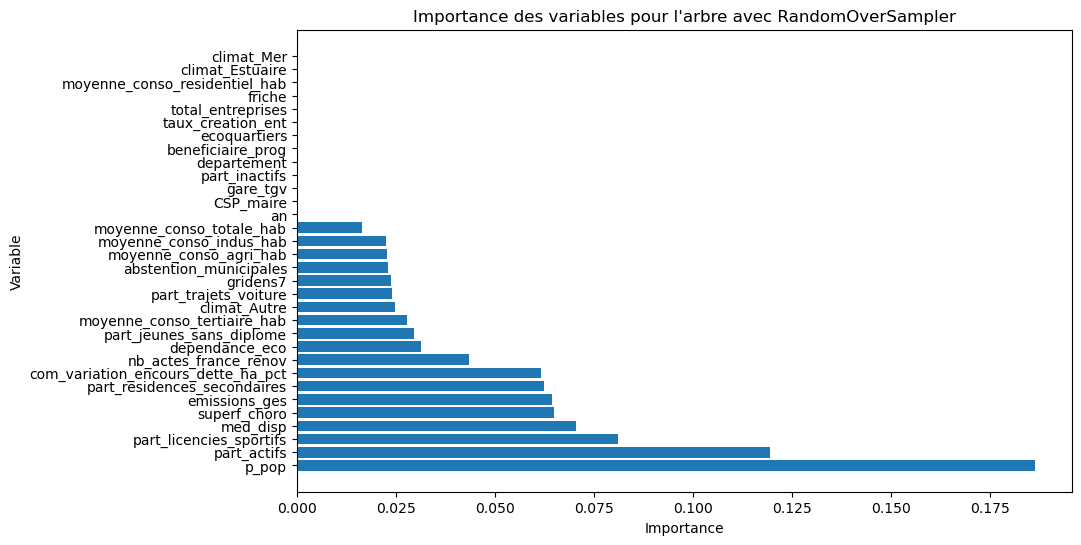

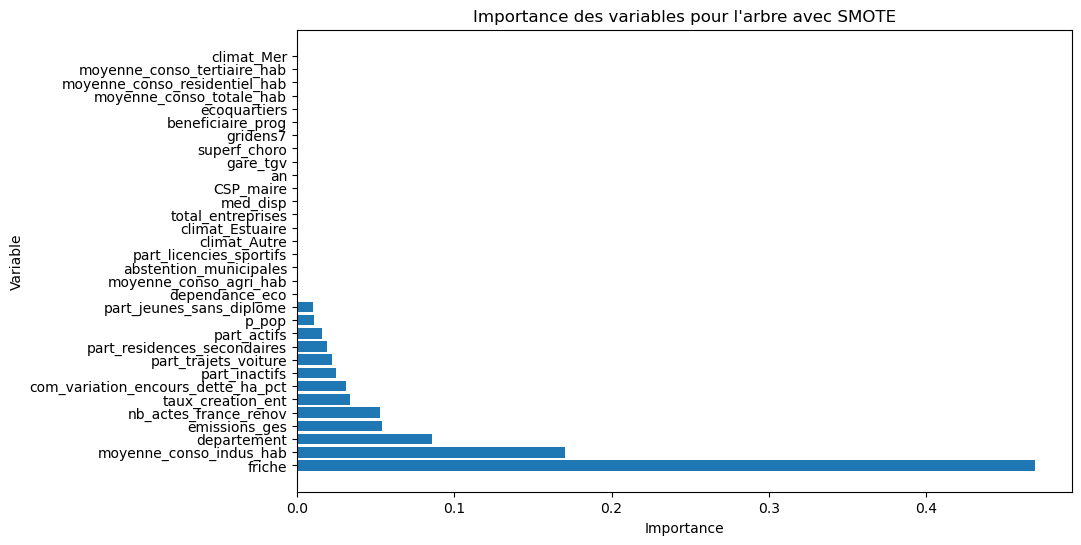

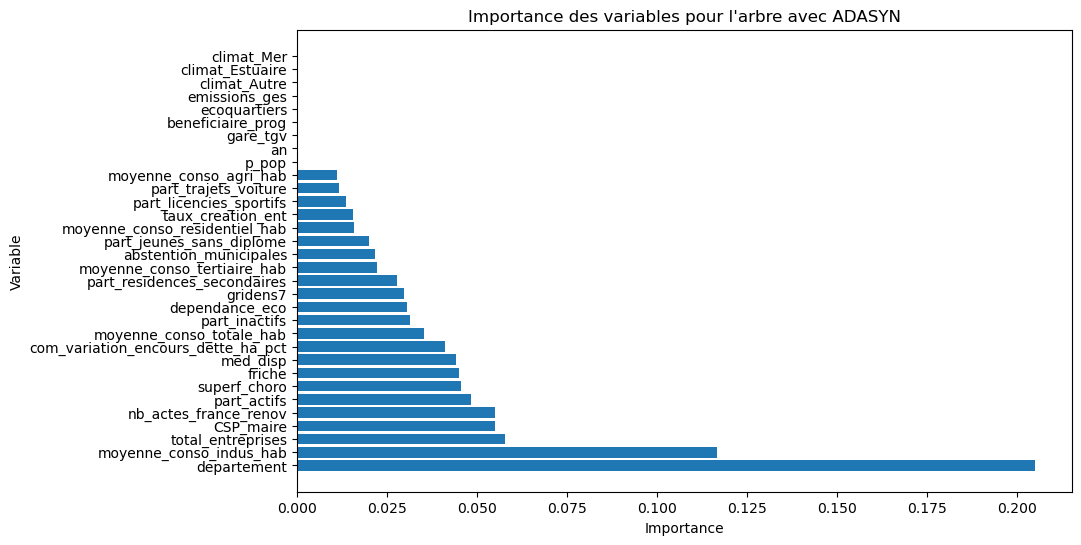

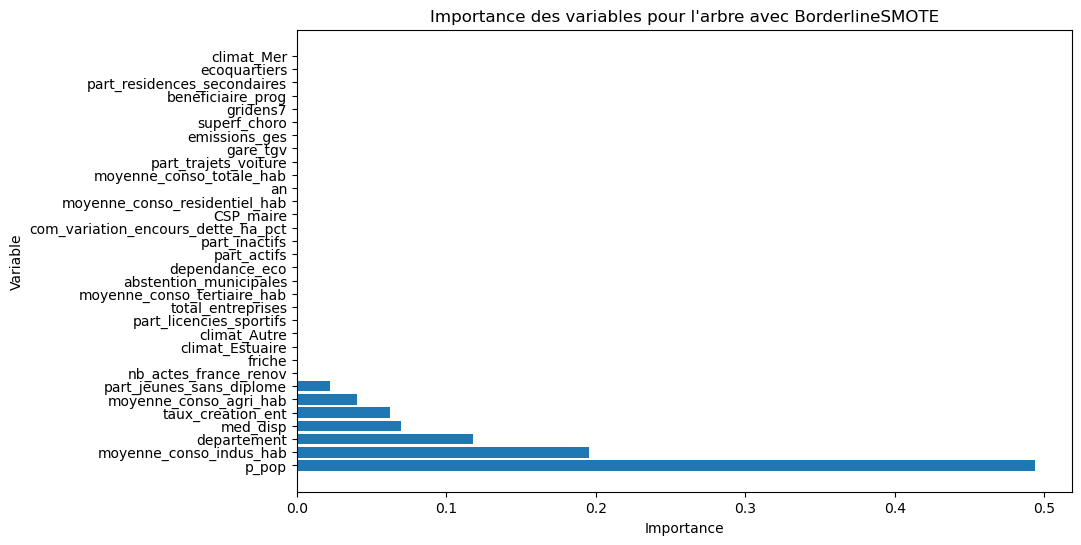

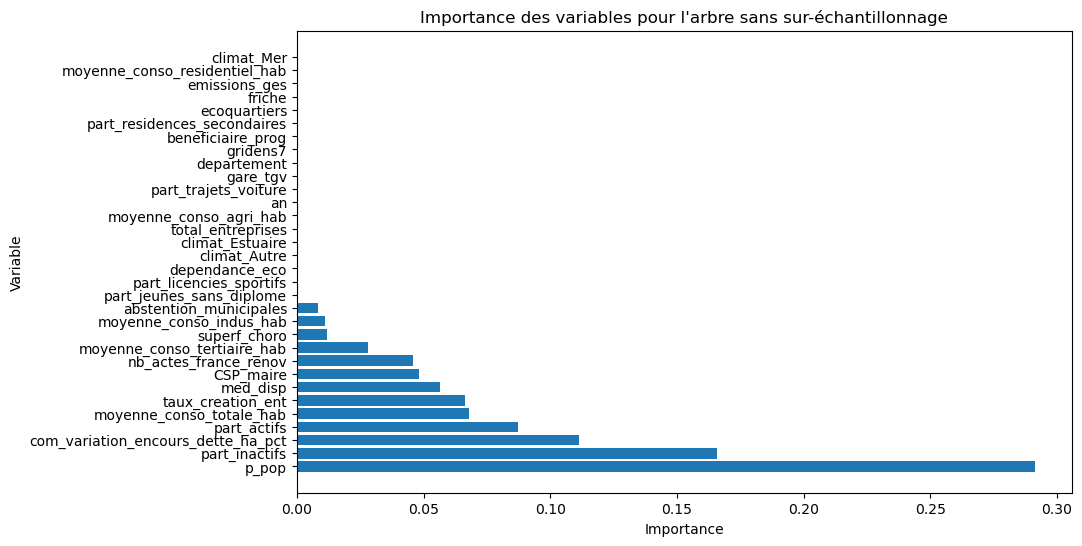

In [459]:
# Graphique de l'importance des variables

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_arbre_oversampler['Variable'], resultats_importance_variables_arbre_oversampler['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour l\'arbre avec RandomOverSampler')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_arbre_smote['Variable'], resultats_importance_variables_arbre_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour l\'arbre avec SMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_arbre_adasyn['Variable'], resultats_importance_variables_arbre_adasyn['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour l\'arbre avec ADASYN')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_arbre_borderline_smote['Variable'], resultats_importance_variables_arbre_borderline_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour l\'arbre avec BorderlineSMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_arbre['Variable'], resultats_importance_variables_arbre['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour l\'arbre sans sur-échantillonnage')
plt.show()

### F) Ajustement des hyperparamètres bis

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, cohen_kappa_score, balanced_accuracy_score, make_scorer, roc_auc_score

# Grilles de paramètres adaptées pour éviter le surapprentissage
param_grid_arbres_oversampler_bis = {
    'oversampler__sampling_strategy': [0.5, 0.75, 1.0],  # Stratégies simplifiées pour échantillonnage
    'arbre__criterion': ['gini', 'entropy', 'log_loss'],
    'arbre__max_depth': [3, 6, 9, 15],  # Réduction des profondeurs possibles pour limiter la complexité
    'arbre__min_samples_split': [10, 20, 30],  # Augmentation de min_samples_split pour éviter surapprentissage
    'arbre__min_samples_leaf': [2, 4]  # Augmentation de min_samples_leaf pour éviter surapprentissage
}

param_grid_arbres_smote_bis = {
    'smote__k_neighbors': [5, 7],  # Réduction des voisins pour SMOTE
    'smote__sampling_strategy': [0.5, 0.75, 1.0], 
    'arbre__criterion': ['gini', 'entropy', 'log_loss'],
    'arbre__max_depth': [3, 6, 9, 15],
    'arbre__min_samples_split': [10, 20, 30],
    'arbre__min_samples_leaf': [2, 4]
}

param_grid_arbres_adasyn_bis = {
    'adasyn__n_neighbors': [5, 7], 
    'adasyn__sampling_strategy': [0.5, 0.75, 1.0], 
    'arbre__criterion': ['gini', 'entropy', 'log_loss'],
    'arbre__max_depth': [3, 6, 9, 15],
    'arbre__min_samples_split': [10, 20, 30],
    'arbre__min_samples_leaf': [2, 4]
}

param_grid_arbres_borderline_smote_bis = {
    'borderline_smote__k_neighbors': [5, 7], 
    'borderline_smote__sampling_strategy': [0.5, 0.75, 1.0],
    'arbre__criterion': ['gini', 'entropy', 'log_loss'],
    'arbre__max_depth': [3, 6, 9, 15],
    'arbre__min_samples_split': [10, 20, 30],
    'arbre__min_samples_leaf': [2, 4]
}

param_grid_arbres_bis = {
    'arbre__criterion': ['gini', 'entropy', 'log_loss'], 
    'arbre__max_depth': [3, 6, 9, 15], 
    'arbre__min_samples_split': [10, 20, 30], 
    'arbre__min_samples_leaf': [2, 4] 
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score),
    'Balanced accuracy': make_scorer(balanced_accuracy_score),
    'AUC': make_scorer(roc_auc_score),
}

In [ ]:
# Ajustement des hyperparamètres
grille_recherche_arbre_oversampler_bis = RandomizedSearchCV(modele_arbre_oversampler, param_grid_arbres_oversampler_bis, cv=cv, scoring=scoring, refit = 'AUC',n_jobs=-1, random_state=42)
grille_recherche_arbre_smote_bis = RandomizedSearchCV(modele_arbre_smote, param_grid_arbres_smote_bis, cv=cv, scoring=scoring, refit = 'AUC',n_jobs=-1,  random_state=42)
grille_recherche_arbre_adasyn_bis = RandomizedSearchCV(modele_arbre_adasyn, param_grid_arbres_adasyn_bis, cv=cv, scoring=scoring, refit = 'AUC',n_jobs=-1, random_state=42)
grille_recherche_arbre_borderline_smote_bis = RandomizedSearchCV(modele_arbre_borderline_smote, param_grid_arbres_borderline_smote_bis, cv=cv, scoring=scoring, refit = 'AUC',n_jobs=-1, random_state=42)
grille_recherche_arbre_bis = RandomizedSearchCV(modele_arbre, param_grid_arbres_bis, cv=cv, scoring=scoring, refit = 'AUC',n_jobs=-1,  random_state=42)

In [ ]:
modele_arbre_oversampler_opt_bis = grille_recherche_arbre_oversampler_bis.fit(X_train, y_train).best_estimator_
modele_arbre_smote_opt_bis = grille_recherche_arbre_smote_bis.fit(X_train, y_train).best_estimator_
modele_arbre_adasyn_opt_bis = grille_recherche_arbre_adasyn_bis.fit(X_train, y_train).best_estimator_
modele_arbre_borderline_smote_opt_bis = grille_recherche_arbre_borderline_smote_bis.fit(X_train, y_train).best_estimator_
modele_arbre_opt_bis = grille_recherche_arbre_bis.fit(X_train, y_train).best_estimator_

In [ ]:
# Prédictions avec les meilleurs hyperparamètres

y_proba_arbre_oversampler_cv = modele_arbre_oversampler_opt_bis.predict_proba(X_test)[:, 1]
y_pred_arbre_oversampler_cv = modele_arbre_oversampler_opt_bis.predict(X_test)

y_proba_arbre_smote_cv = modele_arbre_smote_opt_bis.predict_proba(X_test)[:, 1]
y_pred_arbre_smote_cv = modele_arbre_smote_opt_bis.predict(X_test)

y_proba_arbre_adasyn_cv = modele_arbre_adasyn_opt_bis.predict_proba(X_test)[:, 1]
y_pred_arbre_adasyn_cv = modele_arbre_adasyn_opt_bis.predict(X_test)

y_proba_arbre_borderline_smote_cv = modele_arbre_borderline_smote_opt_bis.predict_proba(X_test)[:, 1]
y_pred_arbre_borderline_smote_cv = modele_arbre_borderline_smote_opt_bis.predict(X_test)

y_proba_arbre_cv = modele_arbre_opt_bis.predict_proba(X_test)[:, 1]
y_pred_arbre_cv = modele_arbre_opt_bis.predict(X_test)

### G) Mesure de la performance bis

In [ ]:
# Mesure de la performance

# Calcul des métriques

auc_roc_arbre_oversampler_cv = roc_auc_score(y_test, y_proba_arbre_oversampler_cv)
f1_arbre_oversampler_cv = f1_score(y_test, y_pred_arbre_oversampler_cv)
balanced_acc_arbre_oversampler_cv = balanced_accuracy_score(y_test, y_pred_arbre_oversampler_cv)

auc_roc_arbre_smote_cv = roc_auc_score(y_test, y_proba_arbre_smote_cv)
f1_arbre_smote_cv = f1_score(y_test, y_pred_arbre_smote_cv)
balanced_acc_arbre_smote_cv = balanced_accuracy_score(y_test, y_pred_arbre_smote_cv)

auc_roc_arbre_adasyn_cv = roc_auc_score(y_test, y_proba_arbre_adasyn_cv)
f1_arbre_adasyn_cv = f1_score(y_test, y_pred_arbre_adasyn_cv)
balanced_acc_arbre_adasyn_cv = balanced_accuracy_score(y_test, y_pred_arbre_adasyn_cv)

auc_roc_arbre_borderline_smote_cv = roc_auc_score(y_test, y_proba_arbre_borderline_smote_cv)
f1_arbre_borderline_smote_cv = f1_score(y_test, y_pred_arbre_borderline_smote_cv)
balanced_acc_arbre_borderline_smote_cv = balanced_accuracy_score(y_test, y_pred_arbre_borderline_smote_cv)

auc_roc_arbre_cv = roc_auc_score(y_test, y_proba_arbre_cv)
f1_arbre_cv = f1_score(y_test, y_pred_arbre_cv)
balanced_acc_arbre_cv = balanced_accuracy_score(y_test, y_pred_arbre_cv)

# Affichage des résultats

resultats_arbres_cv = pd.DataFrame({
    "Arbre de décision sans sur-échantillonnage": [auc_roc_arbre_cv, f1_arbre_cv, balanced_acc_arbre_cv],
    "Arbre de décision avec SMOTE": [auc_roc_arbre_smote_cv, f1_arbre_smote_cv, balanced_acc_arbre_smote_cv],
    "Arbre de décision avec RandomOverSampler": [auc_roc_arbre_oversampler_cv, f1_arbre_oversampler_cv, balanced_acc_arbre_oversampler_cv],
    "Arbre de décision avec ADASYN": [auc_roc_arbre_adasyn_cv, f1_arbre_adasyn_cv, balanced_acc_arbre_adasyn_cv],
    "Arbre de décision avec BorderlineSMOTE": [auc_roc_arbre_borderline_smote_cv, f1_arbre_borderline_smote_cv, balanced_acc_arbre_borderline_smote_cv]
    },
    index = ["AUC-ROC", "F1", "Balanced Accuracy"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_arbres_cv = resultats_arbres_cv.round(3)
resultats_arbres_cv

In [ ]:
# Courbes ROC

fpr_arbre_oversampler_cv, tpr_arbre_oversampler_cv, _ = roc_curve(y_test, y_proba_arbre_oversampler_cv)
fpr_arbre_smote_cv, tpr_arbre_smote_cv, _ = roc_curve(y_test, y_proba_arbre_smote_cv)
fpr_arbre_adasyn_cv, tpr_arbre_adasyn_cv, _ = roc_curve(y_test, y_proba_arbre_adasyn_cv)
fpr_arbre_borderline_smote_cv, tpr_arbre_borderline_smote_cv, _ = roc_curve(y_test, y_proba_arbre_borderline_smote_cv)
fpr_arbre_cv, tpr_arbre_cv, _ = roc_curve(y_test, y_proba_arbre_cv)

plt.figure(figsize=(10, 6))
plt.plot(fpr_arbre_oversampler_cv, tpr_arbre_oversampler_cv, label='Arbre avec RandomOverSampler')
plt.plot(fpr_arbre_smote_cv, tpr_arbre_smote_cv, label='Arbre avec SMOTE')
plt.plot(fpr_arbre_adasyn_cv, tpr_arbre_adasyn_cv, label='Arbre avec ADASYN')
plt.plot(fpr_arbre_borderline_smote_cv, tpr_arbre_borderline_smote_cv, label='Arbre avec BorderlineSMOTE')
plt.plot(fpr_arbre_cv, tpr_arbre_cv, label='Arbre sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

# Export de l'image
plt.savefig('data/Courbes_ROC_arbres_cv.png')

plt.show()

## I.2.4. Forêts Aléatoires

### A) Construction des modèles

In [460]:
# Construction du modèle de forêts aléatoires avec rééquilibrage des classes

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

etapes_rf_oversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler(sampling_strategy = 0.4)), # Sur-échantillonnage
        ('rf', RandomForestClassifier(random_state=42))
        ]

etapes_rf_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('smote', SMOTE(k_neighbors = 5)), # Sur-échantillonnage
        ('rf', RandomForestClassifier(random_state=42)), # Forets aléatoires
        ]

etapes_rf_adasyn = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('adasyn', ADASYN(n_neighbors = 5)), # Sur-échantillonnage
        ('rf', RandomForestClassifier(random_state=42)), # Forets aléatoires
        ]

etapes_rf_borderline_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('borderline_smote', BorderlineSMOTE(k_neighbors = 5)), # Sur-échantillonnage
        ('rf', RandomForestClassifier(random_state=42)), # Forets aléatoires
        ]

etapes_rf = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('rf', RandomForestClassifier(random_state=42)) # Forets aléatoires
        ]


modele_rf_oversampler = Pipeline(steps=etapes_rf_oversampler) # Création du pipeline
modele_rf_smote = Pipeline(steps=etapes_rf_smote) # Création du pipeline
modele_rf_adasyn = Pipeline(steps=etapes_rf_adasyn) # Création du pipeline
modele_rf_borderline_smote = Pipeline(steps=etapes_rf_borderline_smote) # Création du pipeline
modele_rf = Pipeline(steps=etapes_rf) # Création du pipeline

modele_rf_oversampler.fit(X_train, y_train) # Entraînement
modele_rf_smote.fit(X_train, y_train) # Entraînement
modele_rf_adasyn.fit(X_train, y_train) # Entraînement
modele_rf_borderline_smote.fit(X_train, y_train) # Entraînement
modele_rf.fit(X_train, y_train) # Entraînement

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('rf', RandomForestClassifier(random_state=42))])

In [461]:
# Prédictions

y_proba_rf_oversampler = modele_rf_oversampler.predict_proba(X_test)[:, 1]
y_pred_rf_oversampler = modele_rf_oversampler.predict(X_test)

y_proba_rf_smote = modele_rf_smote.predict_proba(X_test)[:, 1]
y_pred_rf_smote = modele_rf_smote.predict(X_test)

y_proba_rf_adasyn = modele_rf_adasyn.predict_proba(X_test)[:, 1]
y_pred_rf_adasyn = modele_rf_adasyn.predict(X_test)

y_proba_rf_borderline_smote = modele_rf_borderline_smote.predict_proba(X_test)[:, 1]
y_pred_rf_borderline_smote = modele_rf_borderline_smote.predict(X_test)

y_proba_rf = modele_rf.predict_proba(X_test)[:, 1]
y_pred_rf = modele_rf.predict(X_test)

### B) Mesure de la performance des modèles initiaux

In [462]:
# Calcul des métriques

from sklearn.metrics import roc_auc_score, average_precision_score, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, cohen_kappa_score

auc_roc_rf_oversampler = roc_auc_score(y_test, y_proba_rf_oversampler)
auc_pr_rf_oversampler = average_precision_score(y_test, y_proba_rf_oversampler)
log_loss_value_rf_oversampler = log_loss(y_test, y_proba_rf_oversampler)
precision_rf_oversampler = precision_score(y_test, y_pred_rf_oversampler)
recall_rf_oversampler = recall_score(y_test, y_pred_rf_oversampler)
f1_rf_oversampler = f1_score(y_test, y_pred_rf_oversampler)
mcc_rf_oversampler = matthews_corrcoef(y_test, y_pred_rf_oversampler)
balanced_acc_rf_oversampler = balanced_accuracy_score(y_test, y_pred_rf_oversampler)
specificity_rf_oversampler = confusion_matrix(y_test, y_pred_rf_oversampler)[0, 0] / (confusion_matrix(y_test, y_pred_rf_oversampler)[0, 0] + confusion_matrix(y_test, y_pred_rf_oversampler)[0, 1])
cohen_kappa_rf_oversampler = cohen_kappa_score(y_test, y_pred_rf_oversampler)

auc_roc_rf_smote = roc_auc_score(y_test, y_proba_rf_smote)
auc_pr_rf_smote = average_precision_score(y_test, y_proba_rf_smote)
log_loss_value_rf_smote = log_loss(y_test, y_proba_rf_smote)
precision_rf_smote = precision_score(y_test, y_pred_rf_smote)
recall_rf_smote = recall_score(y_test, y_pred_rf_smote)
f1_rf_smote = f1_score(y_test, y_pred_rf_smote)
mcc_rf_smote = matthews_corrcoef(y_test, y_pred_rf_smote)
balanced_acc_rf_smote = balanced_accuracy_score(y_test, y_pred_rf_smote)
specificity_rf_smote = confusion_matrix(y_test, y_pred_rf_smote)[0, 0] / (confusion_matrix(y_test, y_pred_rf_smote)[0, 0] + confusion_matrix(y_test, y_pred_rf_smote)[0, 1])
cohen_kappa_rf_smote = cohen_kappa_score(y_test, y_pred_rf_smote)

auc_roc_rf_adasyn = roc_auc_score(y_test, y_proba_rf_adasyn)
auc_pr_rf_adasyn = average_precision_score(y_test, y_proba_rf_adasyn)
log_loss_value_rf_adasyn = log_loss(y_test, y_proba_rf_adasyn)
precision_rf_adasyn = precision_score(y_test, y_pred_rf_adasyn)
recall_rf_adasyn = recall_score(y_test, y_pred_rf_adasyn)
f1_rf_adasyn = f1_score(y_test, y_pred_rf_adasyn)
mcc_rf_adasyn = matthews_corrcoef(y_test, y_pred_rf_adasyn)
balanced_acc_rf_adasyn = balanced_accuracy_score(y_test, y_pred_rf_adasyn)
specificity_rf_adasyn = confusion_matrix(y_test, y_pred_rf_adasyn)[0, 0] / (confusion_matrix(y_test, y_pred_rf_adasyn)[0, 0] + confusion_matrix(y_test, y_pred_rf_adasyn)[0, 1])
cohen_kappa_rf_adasyn = cohen_kappa_score(y_test, y_pred_rf_adasyn)

auc_roc_rf_borderline_smote = roc_auc_score(y_test, y_proba_rf_borderline_smote)
auc_pr_rf_borderline_smote = average_precision_score(y_test, y_proba_rf_borderline_smote)
log_loss_value_rf_borderline_smote = log_loss(y_test, y_proba_rf_borderline_smote)
precision_rf_borderline_smote = precision_score(y_test, y_pred_rf_borderline_smote)
recall_rf_borderline_smote = recall_score(y_test, y_pred_rf_borderline_smote)
f1_rf_borderline_smote = f1_score(y_test, y_pred_rf_borderline_smote)
mcc_rf_borderline_smote = matthews_corrcoef(y_test, y_pred_rf_borderline_smote)
balanced_acc_rf_borderline_smote = balanced_accuracy_score(y_test, y_pred_rf_borderline_smote)
specificity_rf_borderline_smote = confusion_matrix(y_test, y_pred_rf_borderline_smote)[0, 0] / (confusion_matrix(y_test, y_pred_rf_borderline_smote)[0, 0] + confusion_matrix(y_test, y_pred_rf_borderline_smote)[0, 1])
cohen_kappa_rf_borderline_smote = cohen_kappa_score(y_test, y_pred_rf_borderline_smote)

auc_roc_rf = roc_auc_score(y_test, y_proba_rf)
auc_pr_rf = average_precision_score(y_test, y_proba_rf)
log_loss_value_rf = log_loss(y_test, y_proba_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
mcc_rf = matthews_corrcoef(y_test, y_pred_rf)
balanced_acc_rf = balanced_accuracy_score(y_test, y_pred_rf)
specificity_rf = confusion_matrix(y_test, y_pred_rf)[0, 0] / (confusion_matrix(y_test, y_pred_rf)[0, 0] + confusion_matrix(y_test, y_pred_rf)[0, 1])
cohen_kappa_rf = cohen_kappa_score(y_test, y_pred_rf)

In [463]:
# Affichage des résultats

resultats_rf = pd.DataFrame({
    "Forêts aléatoires sans sur-échantillonnage": [auc_roc_rf, auc_pr_rf, f1_rf, balanced_acc_rf],
    "Forêts aléatoires avec SMOTE": [auc_roc_rf_smote, auc_pr_rf_smote, f1_rf_smote, balanced_acc_rf_smote],
    "Forêts aléatoires avec RandomOverSampler": [auc_roc_rf_oversampler, auc_pr_rf_oversampler, f1_rf_oversampler, balanced_acc_rf_oversampler],
    "Forêts aléatoires avec ADASYN": [auc_roc_rf_adasyn, auc_pr_rf_adasyn, f1_rf_adasyn, balanced_acc_rf_adasyn],
    "Forêts aléatoires avec BorderlineSMOTE": [auc_roc_rf_borderline_smote, auc_pr_rf_borderline_smote, f1_rf_borderline_smote, balanced_acc_rf_borderline_smote]
    },
    index = ["AUC-ROC", "AUC-PR", "F1-score", "Balanced accuracy"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_rf = resultats_rf.round(3)
resultats_rf

Forêts aléatoires sans sur-échantillonnage  \
AUC-ROC                                                 0.583   
AUC-PR                                                  0.215   
F1-score                                                0.000   
Balanced accuracy                                       0.493   

                   Forêts aléatoires avec SMOTE  \
AUC-ROC                                   0.600   
AUC-PR                                    0.255   
F1-score                                  0.213   
Balanced accuracy                         0.535   

                   Forêts aléatoires avec RandomOverSampler  \
AUC-ROC                                               0.555   
AUC-PR                                                0.193   
F1-score                                              0.089   
Balanced accuracy                                     0.512   

                   Forêts aléatoires avec ADASYN  \
AUC-ROC                                    0.610   
AUC-PR                                     0.277   
F1-score                                   0.234   
Balanced accuracy                          0.546   

                   Forêts aléatoires avec BorderlineSMOTE  
AUC-ROC                                             0.612  
AUC-PR                                              0.234  
F1-score                                            0.231  
Balanced accuracy                                   0.544

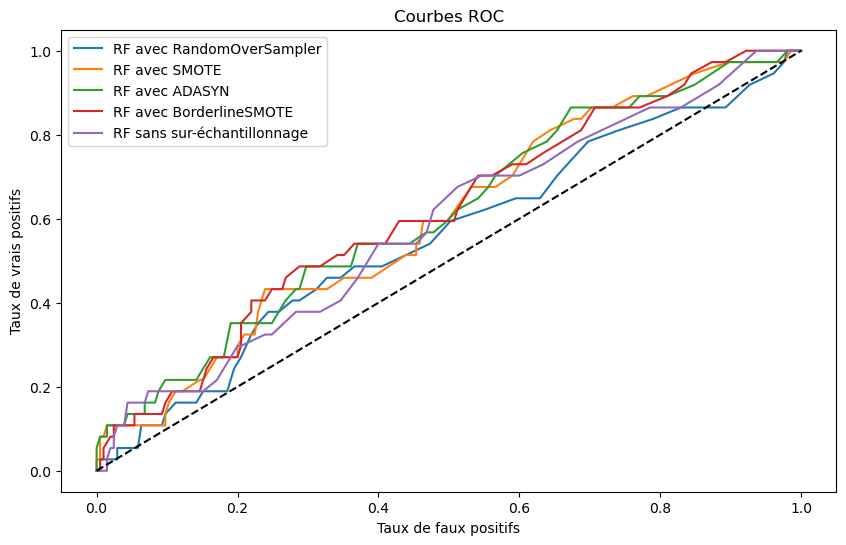

In [464]:
# Courbes ROC

from sklearn.metrics import roc_curve

fpr_rf_oversampler, tpr_rf_oversampler, _ = roc_curve(y_test, y_proba_rf_oversampler)
fpr_rf_smote, tpr_rf_smote, _ = roc_curve(y_test, y_proba_rf_smote)
fpr_rf_adasyn, tpr_rf_adasyn, _ = roc_curve(y_test, y_proba_rf_adasyn)
fpr_rf_borderline_smote, tpr_rf_borderline_smote, _ = roc_curve(y_test, y_proba_rf_borderline_smote)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf_oversampler, tpr_rf_oversampler, label='RF avec RandomOverSampler')
plt.plot(fpr_rf_smote, tpr_rf_smote, label='RF avec SMOTE')
plt.plot(fpr_rf_adasyn, tpr_rf_adasyn, label='RF avec ADASYN')
plt.plot(fpr_rf_borderline_smote, tpr_rf_borderline_smote, label='RF avec BorderlineSMOTE')
plt.plot(fpr_rf, tpr_rf, label='RF sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

# Export de l'image
plt.savefig('data/Courbes_ROC_rf.png')

plt.show()



### C) Ajustement des hyperparamètres

In [465]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, balanced_accuracy_score, make_scorer, roc_auc_score

# Grilles de paramètres adaptées pour éviter le surapprentissage
param_grid_rf_oversampler = {
    'oversampler__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0],  
    'rf__n_estimators': [100, 300, 500],  
    'rf__criterion': ['gini', 'entropy', 'log_loss'],  
    'rf__max_depth': [3, 15, 21, 27],  
    'rf__min_samples_split': [2, 7, 15, 27],  
    'rf__min_samples_leaf': [1, 4],
    'rf__bootstrap': [True, False] 
}

param_grid_rf_smote = {
    'smote__k_neighbors': [3, 5, 7],  # Réduction des voisins pour SMOTE
    'smote__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0], 
    'rf__n_estimators': [100, 300, 500],  
    'rf__criterion': ['gini', 'entropy', 'log_loss'],  
    'rf__max_depth': [3, 15, 21, 27],  
    'rf__min_samples_split': [2, 7, 15, 27],  
    'rf__min_samples_leaf': [1, 4],
    'rf__bootstrap': [True, False] 
}

param_grid_rf_adasyn = {
    'adasyn__n_neighbors': [3, 5, 7], 
    'adasyn__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0], 
    'rf__n_estimators': [100, 300, 500],  
    'rf__criterion': ['gini', 'entropy', 'log_loss'],  
    'rf__max_depth': [3, 15, 21, 27],  
    'rf__min_samples_split': [2, 7, 15, 27],  
    'rf__min_samples_leaf': [1, 4],
    'rf__bootstrap': [True, False] 
}

param_grid_rf_borderline_smote = {
    'borderline_smote__k_neighbors': [3, 5, 7], 
    'borderline_smote__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0], 
    'rf__n_estimators': [100, 300, 500],  
    'rf__criterion': ['gini', 'entropy', 'log_loss'],  
    'rf__max_depth': [3, 15, 21, 27],  
    'rf__min_samples_split': [2, 7, 15, 27],  
    'rf__min_samples_leaf': [1, 4],
    'rf__bootstrap': [True, False] 
}

param_grid_rf = {
    'rf__n_estimators': [100, 300, 500],  
    'rf__criterion': ['gini', 'entropy', 'log_loss'],  
    'rf__max_depth': [3, 15, 21, 27],  
    'rf__min_samples_split': [2, 7, 15, 27],  
    'rf__min_samples_leaf': [1, 4],
    'rf__bootstrap': [True, False] 
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score),
    'Balanced Accuracy': make_scorer(balanced_accuracy_score),
    'AUC': make_scorer(roc_auc_score),
}

In [466]:
# Ajustement des 

grille_recherche_rf_oversampler = RandomizedSearchCV(modele_rf_oversampler, param_grid_rf_oversampler, cv=cv, scoring=scoring, refit = 'AUC', n_jobs=-1, random_state=42)
grille_recherche_rf_smote = RandomizedSearchCV(modele_rf_smote, param_grid_rf_smote, cv=cv, scoring=scoring, refit = 'AUC', n_jobs=-1, random_state=42)
grille_recherche_rf_adasyn = RandomizedSearchCV(modele_rf_adasyn, param_grid_rf_adasyn, cv=cv, scoring=scoring, refit = 'AUC', n_jobs=-1, random_state=42)
grille_recherche_rf_borderline_smote = RandomizedSearchCV(modele_rf_borderline_smote, param_grid_rf_borderline_smote, cv=cv, scoring=scoring, refit = 'AUC', n_jobs=-1, random_state=42)
grille_recherche_rf = RandomizedSearchCV(modele_rf, param_grid_rf, cv=cv, scoring=scoring, refit = 'AUC', n_jobs=-1, random_state=42)

In [467]:
modele_rf_oversampler_opt = grille_recherche_rf_oversampler.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
130 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
130 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(

In [468]:
modele_rf_smote_opt = grille_recherche_rf_smote.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X,

In [469]:
modele_rf_adasyn_opt = grille_recherche_rf_adasyn.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X,

In [470]:
modele_rf_borderline_smote_opt = grille_recherche_rf_borderline_smote.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X,

In [471]:
modele_rf_opt = grille_recherche_rf.fit(X_train, y_train).best_estimator_

In [472]:
# Affichage des meilleurs paramètres
best_params_rf_oversampler = modele_rf_oversampler_opt.get_params()
best_params_rf_smote = modele_rf_smote_opt.get_params()
best_params_rf_adasyn = modele_rf_adasyn_opt.get_params()
best_params_rf_borderline_smote = modele_rf_borderline_smote_opt.get_params()
best_params_rf = modele_rf_opt.get_params()

In [473]:
# Affichage des meilleurs paramètres pour chaque modèle

print("Les meilleurs paramètres pour le modèle de forêts aléatoires avec oversampler : \n", best_params_rf_oversampler)
print('\n')
print("Les meilleurs paramètres pour le modèle de forêts aléatoires avec smote :\n", best_params_rf_smote)
print('\n')
print("Les meilleurs paramètres pour le modèle de forêts aléatoires avec adasyn :\n", best_params_rf_adasyn)
print('\n')
print("Les meilleurs paramètres pour le modèle de forêts aléatoires avec borderline smote :\n", best_params_rf_borderline_smote)
print('\n')
print("Les meilleurs paramètres pour le modèle de forêts aléatoires sans méthode de sur-échantillonnage :\n", best_params_rf)


Les meilleurs paramètres pour le modèle de forêts aléatoires avec oversampler : 
 {'memory': None, 'steps': [('std_scaler', StandardScaler()), ('oversampler', RandomOverSampler(sampling_strategy=1.0)), ('rf', RandomForestClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=20,
                       n_estimators=500, random_state=42))], 'verbose': False, 'std_scaler': StandardScaler(), 'oversampler': RandomOverSampler(sampling_strategy=1.0), 'rf': RandomForestClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=20,
                       n_estimators=500, random_state=42), 'std_scaler__copy': True, 'std_scaler__with_mean': True, 'std_scaler__with_std': True, 'oversampler__random_state': None, 'oversampler__sampling_strategy': 1.0, 'oversampler__shrinkage': None, 'rf__bootstrap': True, 'rf__ccp_alpha': 0.0, 'rf__class_weight': None, 'rf__criterion': 'gini', 'rf__max_depth': 6, 'rf__max_features': 'sqrt', 'rf__max_leaf_nodes': None, 'rf__max_samples': None, 'rf__min_imp

In [474]:
# Prédictions avec les meilleurs hyperparamètres

y_proba_rf_oversampler_cv = modele_rf_oversampler_opt.predict_proba(X_test)[:, 1]
y_pred_rf_oversampler_cv = modele_rf_oversampler_opt.predict(X_test)

y_proba_rf_smote_cv = modele_rf_smote_opt.predict_proba(X_test)[:, 1]
y_pred_rf_smote_cv = modele_rf_smote_opt.predict(X_test)

y_proba_rf_adasyn_cv = modele_rf_adasyn_opt.predict_proba(X_test)[:, 1]
y_pred_rf_adasyn_cv = modele_rf_adasyn_opt.predict(X_test)

y_proba_rf_borderline_smote_cv = modele_rf_borderline_smote_opt.predict_proba(X_test)[:, 1]
y_pred_rf_borderline_smote_cv = modele_rf_borderline_smote_opt.predict(X_test)

y_proba_rf_cv = modele_rf_opt.predict_proba(X_test)[:, 1]
y_pred_rf_cv = modele_rf_opt.predict(X_test)

### D) Mesure de la performance des modèles optimisés

In [475]:
# Calcul des métriques

auc_roc_rf_oversampler_cv = roc_auc_score(y_test, y_proba_rf_oversampler_cv)
auc_pr_rf_oversampler_cv = average_precision_score(y_test, y_proba_rf_oversampler_cv)
log_loss_value_rf_oversampler_cv = log_loss(y_test, y_proba_rf_oversampler_cv)
precision_rf_oversampler_cv = precision_score(y_test, y_pred_rf_oversampler_cv)
recall_rf_oversampler_cv = recall_score(y_test, y_pred_rf_oversampler_cv)
f1_rf_oversampler_cv = f1_score(y_test, y_pred_rf_oversampler_cv)
mcc_rf_oversampler_cv = matthews_corrcoef(y_test, y_pred_rf_oversampler_cv)
balanced_acc_rf_oversampler_cv = balanced_accuracy_score(y_test, y_pred_rf_oversampler_cv)
specificity_rf_oversampler_cv = confusion_matrix(y_test, y_pred_rf_oversampler_cv)[0, 0] / (confusion_matrix(y_test, y_pred_rf_oversampler_cv)[0, 0] + confusion_matrix(y_test, y_pred_rf_oversampler_cv)[0, 1])
cohen_kappa_rf_oversampler_cv = cohen_kappa_score(y_test, y_pred_rf_oversampler_cv)

auc_roc_rf_smote_cv = roc_auc_score(y_test, y_proba_rf_smote_cv)
auc_pr_rf_smote_cv = average_precision_score(y_test, y_proba_rf_smote_cv)
log_loss_value_rf_smote_cv = log_loss(y_test, y_proba_rf_smote_cv)
precision_rf_smote_cv = precision_score(y_test, y_pred_rf_smote_cv)
recall_rf_smote_cv = recall_score(y_test, y_pred_rf_smote_cv)
f1_rf_smote_cv = f1_score(y_test, y_pred_rf_smote_cv)
mcc_rf_smote_cv = matthews_corrcoef(y_test, y_pred_rf_smote_cv)
balanced_acc_rf_smote_cv = balanced_accuracy_score(y_test, y_pred_rf_smote_cv)
specificity_rf_smote_cv = confusion_matrix(y_test, y_pred_rf_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_rf_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_rf_smote_cv)[0, 1])
cohen_kappa_rf_smote_cv = cohen_kappa_score(y_test, y_pred_rf_smote_cv)

auc_roc_rf_adasyn_cv = roc_auc_score(y_test, y_proba_rf_adasyn_cv)
auc_pr_rf_adasyn_cv = average_precision_score(y_test, y_proba_rf_adasyn_cv)
log_loss_value_rf_adasyn_cv = log_loss(y_test, y_proba_rf_adasyn_cv)
precision_rf_adasyn_cv = precision_score(y_test, y_pred_rf_adasyn_cv)
recall_rf_adasyn_cv = recall_score(y_test, y_pred_rf_adasyn_cv)
f1_rf_adasyn_cv = f1_score(y_test, y_pred_rf_adasyn_cv)
mcc_rf_adasyn_cv = matthews_corrcoef(y_test, y_pred_rf_adasyn_cv)
balanced_acc_rf_adasyn_cv = balanced_accuracy_score(y_test, y_pred_rf_adasyn_cv)
specificity_rf_adasyn_cv = confusion_matrix(y_test, y_pred_rf_adasyn_cv)[0, 0] / (confusion_matrix(y_test, y_pred_rf_adasyn_cv)[0, 0] + confusion_matrix(y_test, y_pred_rf_adasyn_cv)[0, 1])
cohen_kappa_rf_adasyn_cv = cohen_kappa_score(y_test, y_pred_rf_adasyn_cv)

auc_roc_rf_borderline_smote_cv = roc_auc_score(y_test, y_proba_rf_borderline_smote_cv)
auc_pr_rf_borderline_smote_cv = average_precision_score(y_test, y_proba_rf_borderline_smote_cv)
log_loss_value_rf_borderline_smote_cv = log_loss(y_test, y_proba_rf_borderline_smote_cv)
precision_rf_borderline_smote_cv = precision_score(y_test, y_pred_rf_borderline_smote_cv)
recall_rf_borderline_smote_cv = recall_score(y_test, y_pred_rf_borderline_smote_cv)
f1_rf_borderline_smote_cv = f1_score(y_test, y_pred_rf_borderline_smote_cv)
mcc_rf_borderline_smote_cv = matthews_corrcoef(y_test, y_pred_rf_borderline_smote_cv)
balanced_acc_rf_borderline_smote_cv = balanced_accuracy_score(y_test, y_pred_rf_borderline_smote_cv)
specificity_rf_borderline_smote_cv = confusion_matrix(y_test, y_pred_rf_borderline_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_rf_borderline_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_rf_borderline_smote_cv)[0, 1])
cohen_kappa_rf_borderline_smote_cv = cohen_kappa_score(y_test, y_pred_rf_borderline_smote_cv)

auc_roc_rf_cv = roc_auc_score(y_test, y_proba_rf_cv)
auc_pr_rf_cv = average_precision_score(y_test, y_proba_rf_cv)
log_loss_value_rf_cv = log_loss(y_test, y_proba_rf_cv)
precision_rf_cv = precision_score(y_test, y_pred_rf_cv)
recall_rf_cv = recall_score(y_test, y_pred_rf_cv)
f1_rf_cv = f1_score(y_test, y_pred_rf_cv)
mcc_rf_cv = matthews_corrcoef(y_test, y_pred_rf_cv)
balanced_acc_rf_cv = balanced_accuracy_score(y_test, y_pred_rf_cv)
specificity_rf_cv = confusion_matrix(y_test, y_pred_rf_cv)[0, 0] / (confusion_matrix(y_test, y_pred_rf_cv)[0, 0] + confusion_matrix(y_test, y_pred_rf_cv)[0, 1])
cohen_kappa_rf_cv = cohen_kappa_score(y_test, y_pred_rf_cv)

In [476]:
# Affichage des résultats

resultats_rf_opt = pd.DataFrame({
    "Forêts aléatoires sans sur-échantillonnage": [auc_roc_rf_cv, auc_pr_rf_cv, f1_rf_cv, balanced_acc_rf_cv],
    "Forêts aléatoires avec SMOTE": [auc_roc_rf_smote_cv, auc_pr_rf_smote_cv, f1_rf_smote_cv, balanced_acc_rf_smote_cv],
    "Forêts aléatoires avec RandomOverSampler": [auc_roc_rf_oversampler_cv, auc_pr_rf_oversampler_cv, f1_rf_oversampler_cv, balanced_acc_rf_oversampler_cv],
    "Forêts aléatoires avec ADASYN": [auc_roc_rf_adasyn_cv, auc_pr_rf_adasyn_cv, f1_rf_adasyn_cv, balanced_acc_rf_adasyn_cv],
    "Forêts aléatoires avec BorderlineSMOTE": [auc_roc_rf_borderline_smote_cv, auc_pr_rf_borderline_smote_cv, f1_rf_borderline_smote_cv, balanced_acc_rf_borderline_smote_cv]
    },
    index = ["AUC-ROC", "AUC-PR", "F1-score", "Balanced accuracy"]
)
# Arrondir les résultats à 3 chiffres après la virgule
resultats_rf_opt = resultats_rf_opt.round(3)
resultats_rf_opt


Forêts aléatoires sans sur-échantillonnage  \
AUC-ROC                                                 0.600   
AUC-PR                                                  0.252   
F1-score                                                0.136   
Balanced accuracy                                       0.531   

                   Forêts aléatoires avec SMOTE  \
AUC-ROC                                   0.650   
AUC-PR                                    0.271   
F1-score                                  0.291   
Balanced accuracy                         0.577   

                   Forêts aléatoires avec RandomOverSampler  \
AUC-ROC                                               0.628   
AUC-PR                                                0.249   
F1-score                                              0.233   
Balanced accuracy                                     0.530   

                   Forêts aléatoires avec ADASYN  \
AUC-ROC                                    0.633   
AUC-PR                                     0.273   
F1-score                                   0.301   
Balanced accuracy                          0.586   

                   Forêts aléatoires avec BorderlineSMOTE  
AUC-ROC                                             0.631  
AUC-PR                                              0.292  
F1-score                                            0.309  
Balanced accuracy                                   0.593

In [477]:
# Export
resultats_rf_opt.to_csv("data/resultats_rf_opt.csv", index=True)
latex_table_rf = resultats_rf_opt.to_latex(index=True)
print(latex_table_rf)

\begin{tabular}{lrrrrr}
\toprule
 & Forêts aléatoires sans sur-échantillonnage & Forêts aléatoires avec SMOTE & Forêts aléatoires avec RandomOverSampler & Forêts aléatoires avec ADASYN & Forêts aléatoires avec BorderlineSMOTE \\
\midrule
AUC-ROC & 0.600000 & 0.650000 & 0.628000 & 0.633000 & 0.631000 \\
AUC-PR & 0.252000 & 0.271000 & 0.249000 & 0.273000 & 0.292000 \\
F1-score & 0.136000 & 0.291000 & 0.233000 & 0.301000 & 0.309000 \\
Balanced accuracy & 0.531000 & 0.577000 & 0.530000 & 0.586000 & 0.593000 \\
\bottomrule
\end{tabular}



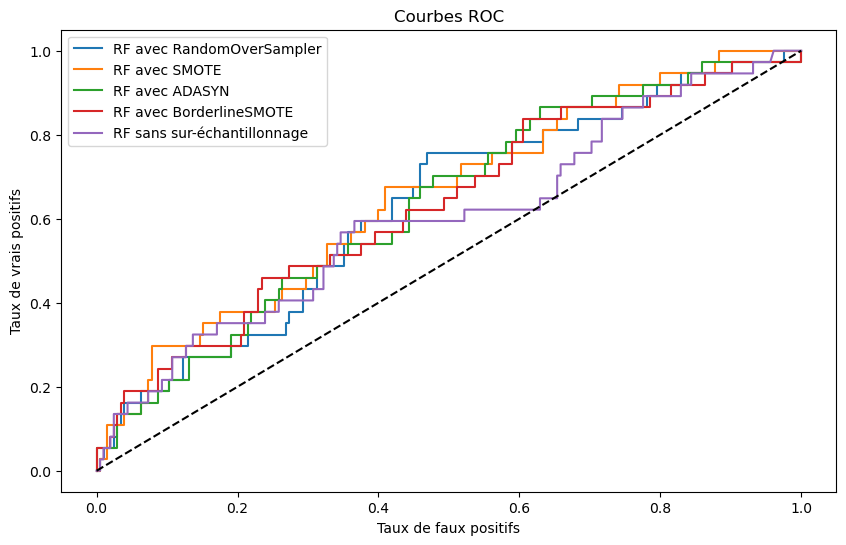

In [478]:
# Comparaison des courbes ROC

fpr_rf_oversampler_cv, tpr_rf_oversampler_cv, _ = roc_curve(y_test, y_proba_rf_oversampler_cv)
fpr_rf_smote_cv, tpr_rf_smote_cv, _ = roc_curve(y_test, y_proba_rf_smote_cv)
fpr_rf_adasyn_cv, tpr_rf_adasyn_cv, _ = roc_curve(y_test, y_proba_rf_adasyn_cv)
fpr_rf_borderline_smote_cv, tpr_rf_borderline_smote_cv, _ = roc_curve(y_test, y_proba_rf_borderline_smote_cv)
fpr_rf_cv, tpr_rf_cv, _ = roc_curve(y_test, y_proba_rf_cv)


plt.figure(figsize=(10, 6))
plt.plot(fpr_rf_oversampler_cv, tpr_rf_oversampler_cv, label='RF avec RandomOverSampler')
plt.plot(fpr_rf_smote_cv, tpr_rf_smote_cv, label='RF avec SMOTE')
plt.plot(fpr_rf_adasyn_cv, tpr_rf_adasyn_cv, label='RF avec ADASYN')
plt.plot(fpr_rf_borderline_smote_cv, tpr_rf_borderline_smote_cv, label='RF avec BorderlineSMOTE')
plt.plot(fpr_rf_cv, tpr_rf_cv, label='RF sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

# Export de l'image
plt.savefig('data/Courbes_ROC_rf_cv.png')

plt.show()

### E) Importance des variables

In [479]:
# Importance des variables

# Récupération de l'importance des variables pour chaque modèle
importance_rf_oversampler = modele_rf_oversampler_opt.named_steps['rf'].feature_importances_
importance_rf_smote = modele_rf_smote_opt.named_steps['rf'].feature_importances_
importance_rf_adasyn = modele_rf_adasyn_opt.named_steps['rf'].feature_importances_
importance_rf_borderline_smote = modele_rf_borderline_smote_opt.named_steps['rf'].feature_importances_
importance_rf = modele_rf_opt.named_steps['rf'].feature_importances_

# Création d'un DataFrame pour afficher les résultats
resultats_importance_variables_rf_oversampler = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importance_rf_oversampler
})

resultats_importance_variables_rf_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importance_rf_smote
})

resultats_importance_variables_rf_adasyn = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importance_rf_adasyn
})

resultats_importance_variables_rf_borderline_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importance_rf_borderline_smote
})

resultats_importance_variables_rf = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importance_rf
})

# Affichage des résultats
resultats_importance_variables_rf_oversampler = resultats_importance_variables_rf_oversampler.sort_values(by="Importance", ascending=False)
resultats_importance_variables_rf_smote = resultats_importance_variables_rf_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_rf_adasyn = resultats_importance_variables_rf_adasyn.sort_values(by="Importance", ascending=False)
resultats_importance_variables_rf_borderline_smote = resultats_importance_variables_rf_borderline_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_rf = resultats_importance_variables_rf.sort_values(by="Importance", ascending=False)

resultats_importance_variables_rf_oversampler

Variable  Importance
18                               p_pop    0.090984
26                   total_entreprises    0.084381
6                nb_actes_france_renov    0.076586
5                        emissions_ges    0.059240
22                         part_actifs    0.058494
1              moyenne_conso_indus_hab    0.052047
12                        superf_choro    0.048650
21                       part_inactifs    0.048222
27             part_licencies_sportifs    0.040796
16                            med_disp    0.036966
24              abstention_municipales    0.036925
2          moyenne_conso_tertiaire_hab    0.036672
4             moyenne_conso_totale_hab    0.036384
23                      dependance_eco    0.035698
20  com_variation_encours_dette_ha_pct    0.033217
9          part_residences_secondaires    0.029341
25                   taux_creation_ent    0.028220
0               moyenne_conso_agri_hab    0.025312
3        moyenne_conso_residentiel_hab    0.025309
19                           CSP_maire    0.021087
15                part_trajets_voiture    0.021045
11                            gridens7    0.020961
28            part_jeunes_sans_diplome    0.018714
7                               friche    0.016548
13                         departement    0.009752
14                            gare_tgv    0.003381
29                        climat_Autre    0.002117
10                   beneficiaire_prog    0.001066
31                          climat_Mer    0.000945
8                         ecoquartiers    0.000809
30                     climat_Estuaire    0.000130
17                                  an    0.000000

In [480]:
resultats_importance_variables_rf_smote

Variable  Importance
7                               friche    0.084936
11                            gridens7    0.080223
1              moyenne_conso_indus_hab    0.073172
18                               p_pop    0.072823
6                nb_actes_france_renov    0.060640
26                   total_entreprises    0.054511
5                        emissions_ges    0.047809
20  com_variation_encours_dette_ha_pct    0.045302
21                       part_inactifs    0.043636
13                         departement    0.042617
19                           CSP_maire    0.039036
22                         part_actifs    0.038155
12                        superf_choro    0.035383
9          part_residences_secondaires    0.029670
23                      dependance_eco    0.029299
27             part_licencies_sportifs    0.029061
0               moyenne_conso_agri_hab    0.026275
2          moyenne_conso_tertiaire_hab    0.026236
28            part_jeunes_sans_diplome    0.023166
25                   taux_creation_ent    0.021118
3        moyenne_conso_residentiel_hab    0.020858
16                            med_disp    0.019931
4             moyenne_conso_totale_hab    0.018831
24              abstention_municipales    0.017142
15                part_trajets_voiture    0.015837
14                            gare_tgv    0.002723
29                        climat_Autre    0.000638
31                          climat_Mer    0.000489
30                     climat_Estuaire    0.000356
8                         ecoquartiers    0.000130
17                                  an    0.000000
10                   beneficiaire_prog    0.000000

In [481]:
resultats_importance_variables_rf_adasyn

Variable  Importance
1              moyenne_conso_indus_hab    0.101754
11                            gridens7    0.068737
7                               friche    0.066572
13                         departement    0.066113
18                               p_pop    0.059958
22                         part_actifs    0.054491
6                nb_actes_france_renov    0.050729
5                        emissions_ges    0.047491
21                       part_inactifs    0.043224
20  com_variation_encours_dette_ha_pct    0.041798
12                        superf_choro    0.037018
26                   total_entreprises    0.036363
23                      dependance_eco    0.033622
19                           CSP_maire    0.030655
28            part_jeunes_sans_diplome    0.030557
9          part_residences_secondaires    0.028479
24              abstention_municipales    0.027685
2          moyenne_conso_tertiaire_hab    0.025290
27             part_licencies_sportifs    0.023138
16                            med_disp    0.023064
0               moyenne_conso_agri_hab    0.022477
3        moyenne_conso_residentiel_hab    0.018827
15                part_trajets_voiture    0.018663
25                   taux_creation_ent    0.017691
4             moyenne_conso_totale_hab    0.016654
14                            gare_tgv    0.003579
29                        climat_Autre    0.002677
31                          climat_Mer    0.001532
8                         ecoquartiers    0.000682
10                   beneficiaire_prog    0.000479
17                                  an    0.000000
30                     climat_Estuaire    0.000000

In [482]:
resultats_importance_variables_rf_borderline_smote

Variable  Importance
1              moyenne_conso_indus_hab    0.100084
7                               friche    0.094274
11                            gridens7    0.087911
18                               p_pop    0.084170
13                         departement    0.061413
6                nb_actes_france_renov    0.052914
22                         part_actifs    0.049241
21                       part_inactifs    0.047116
26                   total_entreprises    0.041860
5                        emissions_ges    0.040580
12                        superf_choro    0.034513
23                      dependance_eco    0.033817
24              abstention_municipales    0.028533
20  com_variation_encours_dette_ha_pct    0.027817
9          part_residences_secondaires    0.025911
0               moyenne_conso_agri_hab    0.025335
4             moyenne_conso_totale_hab    0.023782
2          moyenne_conso_tertiaire_hab    0.022913
16                            med_disp    0.018869
19                           CSP_maire    0.017821
25                   taux_creation_ent    0.017140
27             part_licencies_sportifs    0.016496
3        moyenne_conso_residentiel_hab    0.014875
28            part_jeunes_sans_diplome    0.014576
15                part_trajets_voiture    0.011700
14                            gare_tgv    0.002170
29                        climat_Autre    0.001342
31                          climat_Mer    0.000912
10                   beneficiaire_prog    0.000885
8                         ecoquartiers    0.000815
30                     climat_Estuaire    0.000215
17                                  an    0.000000

In [483]:
resultats_importance_variables_rf

Variable  Importance
18                               p_pop    0.057058
26                   total_entreprises    0.053124
21                       part_inactifs    0.052090
22                         part_actifs    0.051835
5                        emissions_ges    0.051694
2          moyenne_conso_tertiaire_hab    0.049875
6                nb_actes_france_renov    0.049794
20  com_variation_encours_dette_ha_pct    0.046426
1              moyenne_conso_indus_hab    0.045246
12                        superf_choro    0.045090
27             part_licencies_sportifs    0.043837
16                            med_disp    0.042634
3        moyenne_conso_residentiel_hab    0.040882
24              abstention_municipales    0.039374
4             moyenne_conso_totale_hab    0.037998
0               moyenne_conso_agri_hab    0.037300
23                      dependance_eco    0.037115
25                   taux_creation_ent    0.035558
9          part_residences_secondaires    0.034449
15                part_trajets_voiture    0.031621
28            part_jeunes_sans_diplome    0.030432
19                           CSP_maire    0.027540
7                               friche    0.017090
13                         departement    0.014767
11                            gridens7    0.013646
14                            gare_tgv    0.006679
29                        climat_Autre    0.002614
31                          climat_Mer    0.001666
10                   beneficiaire_prog    0.001286
8                         ecoquartiers    0.000899
30                     climat_Estuaire    0.000381
17                                  an    0.000000

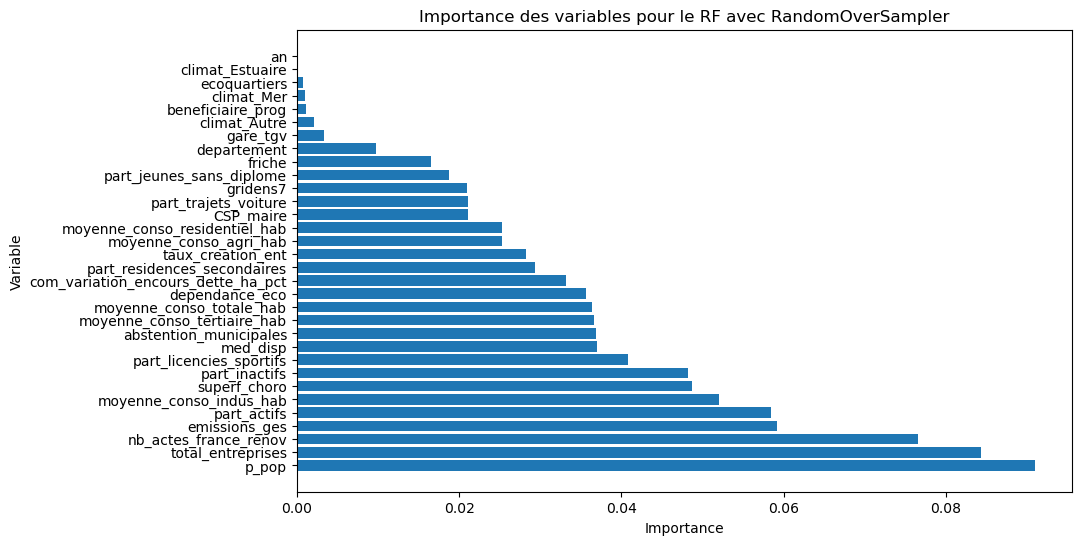

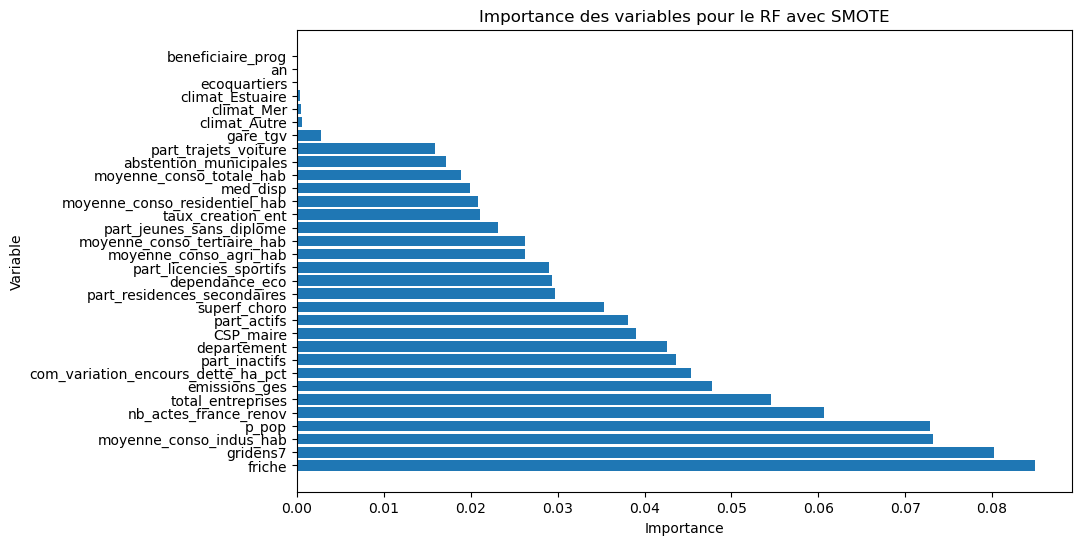

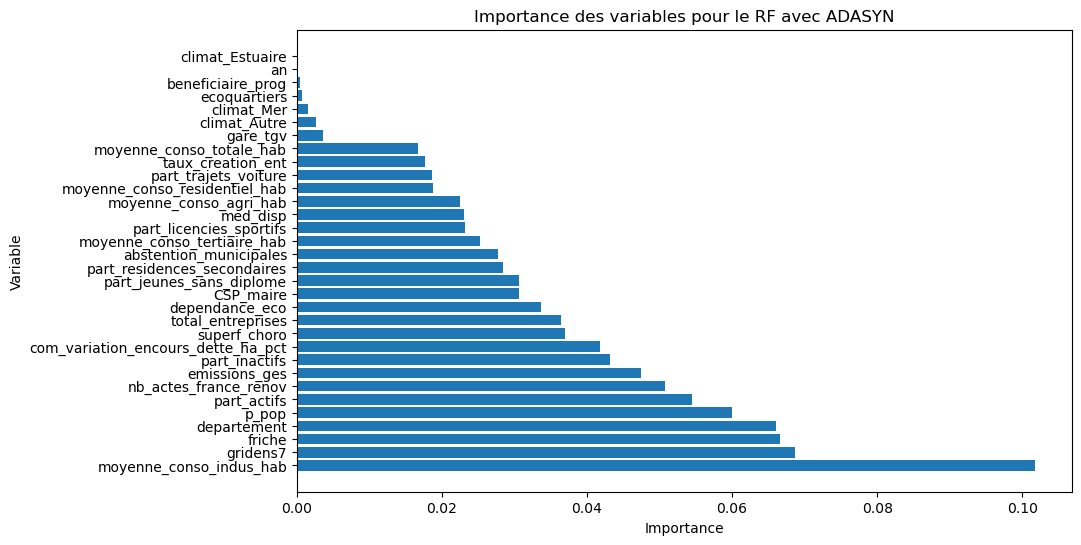

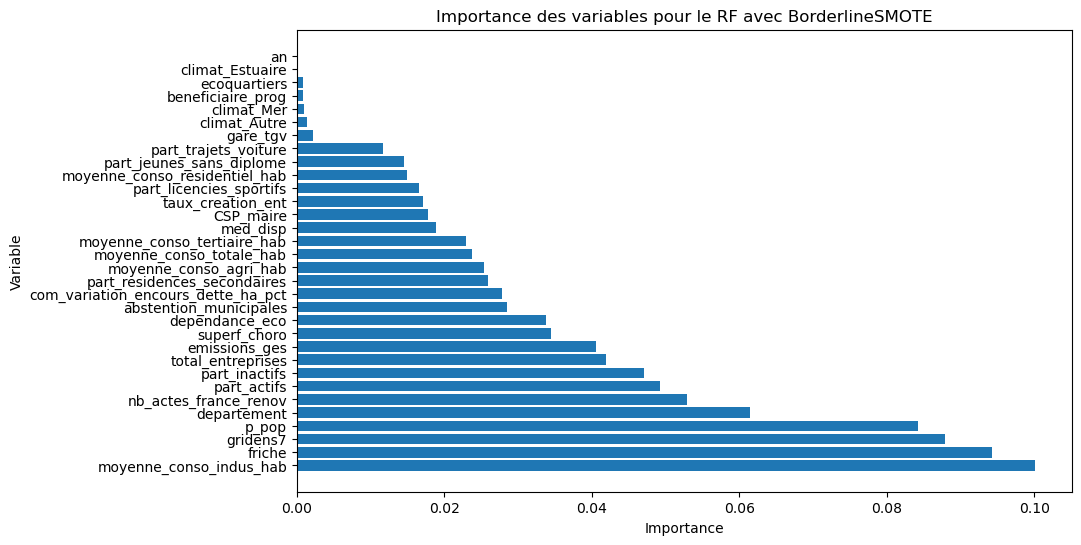

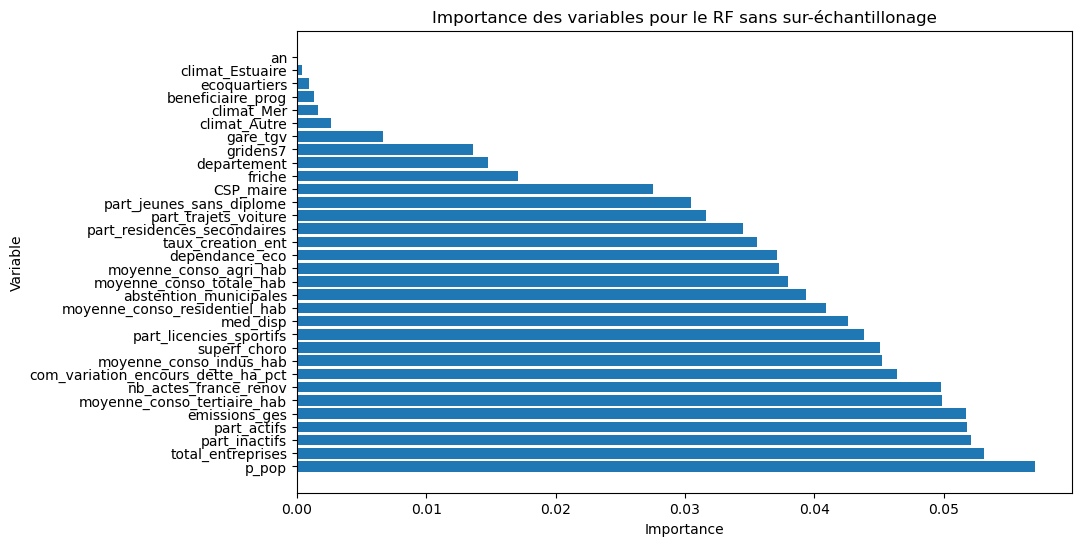

In [484]:
# Graphique de l'importance des variables

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_rf_oversampler['Variable'], resultats_importance_variables_rf_oversampler['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le RF avec RandomOverSampler')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_rf_smote['Variable'], resultats_importance_variables_rf_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le RF avec SMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_rf_adasyn['Variable'], resultats_importance_variables_rf_adasyn['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le RF avec ADASYN')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_rf_borderline_smote['Variable'], resultats_importance_variables_rf_borderline_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le RF avec BorderlineSMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_rf['Variable'], resultats_importance_variables_rf['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le RF sans sur-échantillonage')
plt.show()

### F) Ajustement paramètres bis

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, balanced_accuracy_score, make_scorer, roc_auc_score

# Grilles de paramètres adaptées pour éviter le surapprentissage
param_grid_rf_oversampler_bis = {
    'oversampler__sampling_strategy': [0.5, 0.75, 1.0],  # Stratégies simplifiées pour échantillonnage
    'rf__n_estimators': [50, 100, 300, 500],  # Réduction des options pour le nombre d'arbres
    'rf__criterion': ['gini', 'entropy', 'log_loss'],  # Utilisation d'un seul critère d'impureté
    'rf__max_depth': [6, 15, 21],  # Réduction des options de profondeur maximale
    'rf__min_samples_split': [10, 20],  # Limitation des options pour min_samples_split
    'rf__min_samples_leaf': [2, 4],
    'rf__bootstrap': [True, False]  # Limitation à un seul choix de bootstrap
}

param_grid_rf_smote_bis = {
    'smote__k_neighbors': [5, 7],  # Réduction des voisins pour SMOTE
    'smote__sampling_strategy': [0.5, 0.75, 1.0], 
    'rf__n_estimators': [50, 100, 300, 500], 
    'rf__criterion': ['gini', 'entropy', 'log_loss'], 
    'rf__max_depth': [6, 15, 21],
    'rf__min_samples_split': [10, 20],
    'rf__min_samples_leaf': [2, 4],
    'rf__bootstrap': [True,False] 
}

param_grid_rf_adasyn_bis = {
    'adasyn__n_neighbors': [5, 7], 
    'adasyn__sampling_strategy': [0.5, 0.75, 1.0], 
    'rf__n_estimators': [50, 100, 300, 500], 
    'rf__criterion': ['gini', 'entropy', 'log_loss'], 
    'rf__max_depth': [6, 15, 21],
    'rf__min_samples_split': [10, 20],
    'rf__min_samples_leaf': [2, 4],
    'rf__bootstrap': [True,False] 
}

param_grid_rf_borderline_smote_bis = {
    'borderline_smote__k_neighbors': [5, 7], 
    'borderline_smote__sampling_strategy': [0.5, 0.75, 1.0], 
    'rf__n_estimators': [50, 100, 300, 500], 
    'rf__criterion': ['gini', 'entropy', 'log_loss'], 
    'rf__max_depth': [6, 15, 21],
    'rf__min_samples_split': [10, 20],
    'rf__min_samples_leaf': [2, 4],
    'rf__bootstrap': [True, False] 
}

param_grid_rf_bis = {
    'rf__n_estimators': [50, 100, 300, 500], 
    'rf__criterion': ['gini', 'entropy', 'log_loss'], 
    'rf__max_depth': [6, 15, 21], 
    'rf__min_samples_split': [10, 20], 
    'rf__min_samples_leaf': [2, 4],
    'rf__bootstrap': [True,False] 
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score),
    'Balanced Accuracy': make_scorer(balanced_accuracy_score),
    'AUC': make_scorer(roc_auc_score),
}

In [ ]:
grille_recherche_rf_oversampler_bis = RandomizedSearchCV(modele_rf_oversampler, param_grid_rf_oversampler_bis, cv=cv, scoring=scoring, refit = 'AUC', n_jobs=-1, random_state=42)
grille_recherche_rf_smote_bis = RandomizedSearchCV(modele_rf_smote, param_grid_rf_smote_bis, cv=cv, scoring=scoring, refit = 'AUC', n_jobs=-1, random_state=42)
grille_recherche_rf_adasyn_bis = RandomizedSearchCV(modele_rf_adasyn, param_grid_rf_adasyn_bis, cv=cv, scoring=scoring, refit = 'AUC', n_jobs=-1, random_state=42)
grille_recherche_rf_borderline_smote_bis = RandomizedSearchCV(modele_rf_borderline_smote, param_grid_rf_borderline_smote_bis, cv=cv, scoring=scoring, refit = 'AUC', n_jobs=-1, random_state=42)
grille_recherche_rf_bis = RandomizedSearchCV(modele_rf, param_grid_rf_bis, cv=cv, scoring=scoring, refit = 'AUC', n_jobs=-1, random_state=42)

In [ ]:
modele_rf_oversampler_opt_bis = grille_recherche_rf_oversampler_bis.fit(X_train, y_train).best_estimator_
modele_rf_smote_opt_bis = grille_recherche_rf_smote_bis.fit(X_train, y_train).best_estimator_
modele_rf_adasyn_opt_bis = grille_recherche_rf_adasyn_bis.fit(X_train, y_train).best_estimator_
modele_rf_borderline_smote_opt_bis = grille_recherche_rf_borderline_smote_bis.fit(X_train, y_train).best_estimator_
modele_rf_opt_bis = grille_recherche_rf_bis.fit(X_train, y_train).best_estimator_

In [ ]:
# Prédictions

y_proba_rf_oversampler_cv = modele_rf_oversampler_opt_bis.predict_proba(X_test)[:, 1]
y_pred_rf_oversampler_cv = modele_rf_oversampler_opt_bis.predict(X_test)

y_proba_rf_smote_cv = modele_rf_smote_opt_bis.predict_proba(X_test)[:, 1]
y_pred_rf_smote_cv = modele_rf_smote_opt_bis.predict(X_test)

y_proba_rf_adasyn_cv = modele_rf_adasyn_opt_bis.predict_proba(X_test)[:, 1]
y_pred_rf_adasyn_cv = modele_rf_adasyn_opt_bis.predict(X_test)

y_proba_rf_borderline_smote_cv = modele_rf_borderline_smote_opt_bis.predict_proba(X_test)[:, 1]
y_pred_rf_borderline_smote_cv = modele_rf_borderline_smote_opt_bis.predict(X_test)

y_proba_rf_cv = modele_rf_opt_bis.predict_proba(X_test)[:, 1]
y_pred_rf_cv = modele_rf_opt_bis.predict(X_test)

### G) Mesure de la performance bis

In [ ]:
# Calcul des métriques

auc_roc_rf_oversampler_cv = roc_auc_score(y_test, y_proba_rf_oversampler_cv)
f1_rf_oversampler_cv = f1_score(y_test, y_pred_rf_oversampler_cv)
balanced_acc_rf_oversampler_cv = balanced_accuracy_score(y_test, y_pred_rf_oversampler_cv)

auc_roc_rf_smote_cv = roc_auc_score(y_test, y_proba_rf_smote_cv)
f1_rf_smote_cv = f1_score(y_test, y_pred_rf_smote_cv)
balanced_acc_rf_smote_cv = balanced_accuracy_score(y_test, y_pred_rf_smote_cv)

auc_roc_rf_adasyn_cv = roc_auc_score(y_test, y_proba_rf_adasyn_cv)
f1_rf_adasyn_cv = f1_score(y_test, y_pred_rf_adasyn_cv)
balanced_acc_rf_adasyn_cv = balanced_accuracy_score(y_test, y_pred_rf_adasyn_cv)

auc_roc_rf_borderline_smote_cv = roc_auc_score(y_test, y_proba_rf_borderline_smote_cv)
f1_rf_borderline_smote_cv = f1_score(y_test, y_pred_rf_borderline_smote_cv)
balanced_acc_rf_borderline_smote_cv = balanced_accuracy_score(y_test, y_pred_rf_borderline_smote_cv)

auc_roc_rf_cv = roc_auc_score(y_test, y_proba_rf_cv)
f1_rf_cv = f1_score(y_test, y_pred_rf_cv)
balanced_acc_rf_cv = balanced_accuracy_score(y_test, y_pred_rf_cv)

# Affichage des résultats

resultats_rf_opt_bis = pd.DataFrame({
    "Forêts aléatoires sans sur-échantillonnage": [auc_roc_rf_cv, f1_rf_cv, balanced_acc_rf_cv],
    "Forêts aléatoires avec SMOTE": [auc_roc_rf_smote_cv, f1_rf_smote_cv, balanced_acc_rf_smote_cv],
    "Forêts aléatoires avec RandomOverSampler": [auc_roc_rf_oversampler_cv, f1_rf_oversampler_cv, balanced_acc_rf_oversampler_cv],
    "Forêts aléatoires avec ADASYN": [auc_roc_rf_adasyn_cv, f1_rf_adasyn_cv, balanced_acc_rf_adasyn_cv],
    "Forêts aléatoires avec BorderlineSMOTE": [auc_roc_rf_borderline_smote_cv, f1_rf_borderline_smote_cv, balanced_acc_rf_borderline_smote_cv]
    },
    index = ["AUC-ROC", "F1-score", "Balanced accuracy"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_rf_opt_bis = resultats_rf_opt_bis.round(3)
resultats_rf_opt_bis

In [ ]:
# Courbes ROC

fpr_rf_oversampler_cv, tpr_rf_oversampler_cv, _ = roc_curve(y_test, y_proba_rf_oversampler_cv)
fpr_rf_smote_cv, tpr_rf_smote_cv, _ = roc_curve(y_test, y_proba_rf_smote_cv)
fpr_rf_adasyn_cv, tpr_rf_adasyn_cv, _ = roc_curve(y_test, y_proba_rf_adasyn_cv)
fpr_rf_borderline_smote_cv, tpr_rf_borderline_smote_cv, _ = roc_curve(y_test, y_proba_rf_borderline_smote_cv)
fpr_rf_cv, tpr_rf_cv, _ = roc_curve(y_test, y_proba_rf_cv)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf_oversampler_cv, tpr_rf_oversampler_cv, label='RF avec RandomOverSampler')
plt.plot(fpr_rf_smote_cv, tpr_rf_smote_cv, label='RF avec SMOTE')
plt.plot(fpr_rf_adasyn_cv, tpr_rf_adasyn_cv, label='RF avec ADASYN')
plt.plot(fpr_rf_borderline_smote_cv, tpr_rf_borderline_smote_cv, label='RF avec BorderlineSMOTE')
plt.plot(fpr_rf_cv, tpr_rf_cv, label='RF sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

# Export de l'image
plt.savefig('data/Courbes_ROC_rf_cv.png')

plt.show()

## I.2.4. Gradient Boosting

### A) Construction des modèles

In [485]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

# Construction des étapes
etapes_gb_randomoversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler(sampling_strategy = 0.4)), # Sur-échantillonnage
        ('gb', GradientBoostingClassifier(random_state=42)) # Gradient Boosting
        ]

etapes_gb_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('smote', SMOTE(k_neighbors = 5)), # Sur-échantillonnage
        ('gb', GradientBoostingClassifier(random_state=42)) # Gradient Boosting
        ]

etapes_gb_adasyn = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('adasyn', ADASYN(n_neighbors = 5)), # Sur-échantillonnage
        ('gb', GradientBoostingClassifier(random_state=42)) # Gradient Boosting
        ]

etapes_gb_borderline_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('borderline_smote', BorderlineSMOTE(k_neighbors = 5)), # Sur-échantillonnage
        ('gb', GradientBoostingClassifier(random_state=42)) # Gradient Boosting
        ]

etapes_gb = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('gb', GradientBoostingClassifier(random_state=42)) # Gradient Boosting
        ]

modele_gb_randomoversampler = Pipeline(steps=etapes_gb_randomoversampler) # Création du pipeline
modele_gb_smote = Pipeline(steps=etapes_gb_smote) # Création du pipeline
modele_gb_adasyn = Pipeline(steps=etapes_gb_adasyn) # Création du pipeline
modele_gb_borderline_smote = Pipeline(steps=etapes_gb_borderline_smote) # Création du pipeline
modele_gb = Pipeline(steps=etapes_gb) # Création du pipeline

In [486]:
# Entraînement des modèles
modele_gb_randomoversampler.fit(X_train, y_train) # Entraînement
modele_gb_smote.fit(X_train, y_train) # Entraînement
modele_gb_adasyn.fit(X_train, y_train) # Entraînement
modele_gb_borderline_smote.fit(X_train, y_train) # Entraînement
modele_gb.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('gb', GradientBoostingClassifier(random_state=42))])

In [487]:
# Prédictions

y_proba_gb_randomoversampler = modele_gb_randomoversampler.predict_proba(X_test)[:, 1]
y_pred_gb_randomoversampler = modele_gb_randomoversampler.predict(X_test)

y_proba_gb_smote = modele_gb_smote.predict_proba(X_test)[:, 1]
y_pred_gb_smote = modele_gb_smote.predict(X_test)

y_proba_gb_adasyn = modele_gb_adasyn.predict_proba(X_test)[:, 1]
y_pred_gb_adasyn = modele_gb_adasyn.predict(X_test)

y_proba_gb_borderline_smote = modele_gb_borderline_smote.predict_proba(X_test)[:, 1]
y_pred_gb_borderline_smote = modele_gb_borderline_smote.predict(X_test)

y_proba_gb = modele_gb.predict_proba(X_test)[:, 1]
y_pred_gb = modele_gb.predict(X_test)

### B) Mesure de la performance des modèles initiaux

In [488]:
# Calcul des métriques

from sklearn.metrics import roc_auc_score, average_precision_score, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef

auc_roc_gb_randomoversampler = roc_auc_score(y_test, y_proba_gb_randomoversampler)
auc_pr_gb_randomoversampler = average_precision_score(y_test, y_proba_gb_randomoversampler)
log_loss_value_gb_randomoversampler = log_loss(y_test, y_proba_gb_randomoversampler)
precision_gb_randomoversampler = precision_score(y_test, y_pred_gb_randomoversampler)
recall_gb_randomoversampler = recall_score(y_test, y_pred_gb_randomoversampler)
f1_gb_randomoversampler = f1_score(y_test, y_pred_gb_randomoversampler)
mcc_gb_randomoversampler = matthews_corrcoef(y_test, y_pred_gb_randomoversampler)
balanced_acc_gb_randomoversampler = balanced_accuracy_score(y_test, y_pred_gb_randomoversampler)
specificity_gb_randomoversampler = confusion_matrix(y_test, y_pred_gb_randomoversampler)[0, 0] / (confusion_matrix(y_test, y_pred_gb_randomoversampler)[0, 0] + confusion_matrix(y_test, y_pred_gb_randomoversampler)[0, 1])
cohen_kappa_gb_randomoversampler = cohen_kappa_score(y_test, y_pred_gb_randomoversampler)

auc_roc_gb_smote = roc_auc_score(y_test, y_proba_gb_smote)
auc_pr_gb_smote = average_precision_score(y_test, y_proba_gb_smote)
log_loss_value_gb_smote = log_loss(y_test, y_proba_gb_smote)
precision_gb_smote = precision_score(y_test, y_pred_gb_smote)
recall_gb_smote = recall_score(y_test, y_pred_gb_smote)
f1_gb_smote = f1_score(y_test, y_pred_gb_smote)
mcc_gb_smote = matthews_corrcoef(y_test, y_pred_gb_smote)
balanced_acc_gb_smote = balanced_accuracy_score(y_test, y_pred_gb_smote)
specificity_gb_smote = confusion_matrix(y_test, y_pred_gb_smote)[0, 0] / (confusion_matrix(y_test, y_pred_gb_smote)[0, 0] + confusion_matrix(y_test, y_pred_gb_smote)[0, 1])
cohen_kappa_gb_smote = cohen_kappa_score(y_test, y_pred_gb_smote)

auc_roc_gb_adasyn = roc_auc_score(y_test, y_proba_gb_adasyn)
auc_pr_gb_adasyn = average_precision_score(y_test, y_proba_gb_adasyn)
log_loss_value_gb_adasyn = log_loss(y_test, y_proba_gb_adasyn)
precision_gb_adasyn = precision_score(y_test, y_pred_gb_adasyn)
recall_gb_adasyn = recall_score(y_test, y_pred_gb_adasyn)
f1_gb_adasyn = f1_score(y_test, y_pred_gb_adasyn)
mcc_gb_adasyn = matthews_corrcoef(y_test, y_pred_gb_adasyn)
balanced_acc_gb_adasyn = balanced_accuracy_score(y_test, y_pred_gb_adasyn)
specificity_gb_adasyn = confusion_matrix(y_test, y_pred_gb_adasyn)[0, 0] / (confusion_matrix(y_test, y_pred_gb_adasyn)[0, 0] + confusion_matrix(y_test, y_pred_gb_adasyn)[0, 1])
cohen_kappa_gb_adasyn = cohen_kappa_score(y_test, y_pred_gb_adasyn)

auc_roc_gb_borderline_smote = roc_auc_score(y_test, y_proba_gb_borderline_smote)
auc_pr_gb_borderline_smote = average_precision_score(y_test, y_proba_gb_borderline_smote)
log_loss_value_gb_borderline_smote = log_loss(y_test, y_proba_gb_borderline_smote)
precision_gb_borderline_smote = precision_score(y_test, y_pred_gb_borderline_smote)
recall_gb_borderline_smote = recall_score(y_test, y_pred_gb_borderline_smote)
f1_gb_borderline_smote = f1_score(y_test, y_pred_gb_borderline_smote)
mcc_gb_borderline_smote = matthews_corrcoef(y_test, y_pred_gb_borderline_smote)
balanced_acc_gb_borderline_smote = balanced_accuracy_score(y_test, y_pred_gb_borderline_smote)
specificity_gb_borderline_smote = confusion_matrix(y_test, y_pred_gb_borderline_smote)[0, 0] / (confusion_matrix(y_test, y_pred_gb_borderline_smote)[0, 0] + confusion_matrix(y_test, y_pred_gb_borderline_smote)[0, 1])
cohen_kappa_gb_borderline_smote = cohen_kappa_score(y_test, y_pred_gb_borderline_smote)

auc_roc_gb = roc_auc_score(y_test, y_proba_gb)
auc_pr_gb = average_precision_score(y_test, y_proba_gb)
log_loss_value_gb = log_loss(y_test, y_proba_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
mcc_gb = matthews_corrcoef(y_test, y_pred_gb)
balanced_acc_gb = balanced_accuracy_score(y_test, y_pred_gb)
specificity_gb = confusion_matrix(y_test, y_pred_gb)[0, 0] / (confusion_matrix(y_test, y_pred_gb)[0, 0] + confusion_matrix(y_test, y_pred_gb)[0, 1])
cohen_kappa_gb = cohen_kappa_score(y_test, y_pred_gb)

In [489]:
# Affichage des résultats
resultats_gb = pd.DataFrame({
    "Gradient Boosting sans sur-échantillonnage": [auc_roc_gb, auc_pr_gb, f1_gb, balanced_acc_gb],
    "Gradient Boosting avec SMOTE": [auc_roc_gb_smote, auc_pr_gb_smote, f1_gb_smote, balanced_acc_gb_smote],
    "Gradient Boosting avec RandomOverSampler": [auc_roc_gb_randomoversampler, auc_pr_gb_randomoversampler, f1_gb_randomoversampler, balanced_acc_gb_randomoversampler],
    "Gradient Boosting avec ADASYN": [auc_roc_gb_adasyn, auc_pr_gb_adasyn, f1_gb_adasyn, balanced_acc_gb_adasyn],
    "Gradient Boosting avec BorderlineSMOTE": [auc_roc_gb_borderline_smote, auc_pr_gb_borderline_smote, f1_gb_borderline_smote, balanced_acc_gb_borderline_smote]
    },
    index = ["AUC-ROC", "AUC-PR", "F1-score", "Balanced accuracy"]
)
# Arrondir les résultats à 3 chiffres après la virgule
resultats_gb = resultats_gb.round(3)
resultats_gb

Gradient Boosting sans sur-échantillonnage  \
AUC-ROC                                                 0.627   
AUC-PR                                                  0.244   
F1-score                                                0.133   
Balanced accuracy                                       0.528   

                   Gradient Boosting avec SMOTE  \
AUC-ROC                                   0.644   
AUC-PR                                    0.238   
F1-score                                  0.268   
Balanced accuracy                         0.566   

                   Gradient Boosting avec RandomOverSampler  \
AUC-ROC                                               0.607   
AUC-PR                                                0.286   
F1-score                                              0.207   
Balanced accuracy                                     0.544   

                   Gradient Boosting avec ADASYN  \
AUC-ROC                                    0.640   
AUC-PR                                     0.228   
F1-score                                   0.241   
Balanced accuracy                          0.547   

                   Gradient Boosting avec BorderlineSMOTE  
AUC-ROC                                             0.628  
AUC-PR                                              0.220  
F1-score                                            0.235  
Balanced accuracy                                   0.542

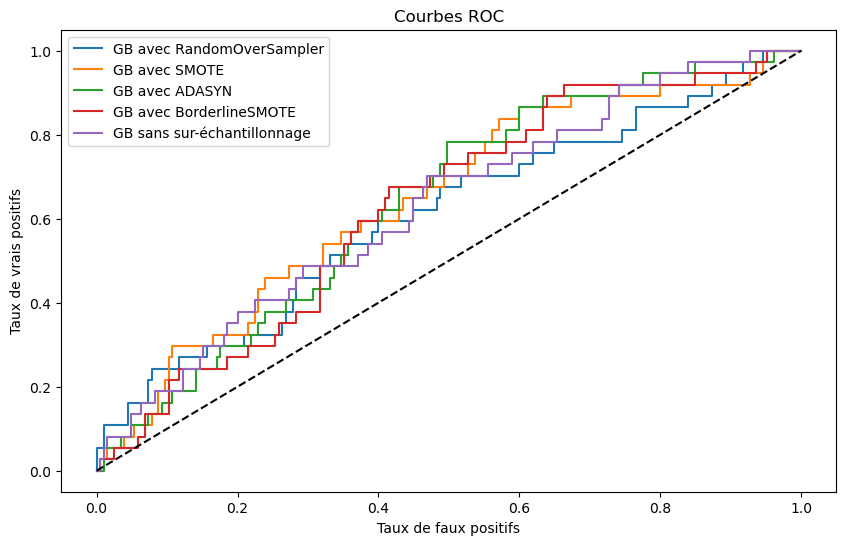

In [490]:
# Courbes ROC

from sklearn.metrics import roc_curve

fpr_gb_randomoversampler, tpr_gb_randomoversampler, _ = roc_curve(y_test, y_proba_gb_randomoversampler)
fpr_gb_smote, tpr_gb_smote, _ = roc_curve(y_test, y_proba_gb_smote)
fpr_gb_adasyn, tpr_gb_adasyn, _ = roc_curve(y_test, y_proba_gb_adasyn)
fpr_gb_borderline_smote, tpr_gb_borderline_smote, _ = roc_curve(y_test, y_proba_gb_borderline_smote)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_gb_randomoversampler, tpr_gb_randomoversampler, label='GB avec RandomOverSampler')
plt.plot(fpr_gb_smote, tpr_gb_smote, label='GB avec SMOTE')
plt.plot(fpr_gb_adasyn, tpr_gb_adasyn, label='GB avec ADASYN')
plt.plot(fpr_gb_borderline_smote, tpr_gb_borderline_smote, label='GB avec BorderlineSMOTE')
plt.plot(fpr_gb, tpr_gb, label='GB sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()


# Export de l'image
plt.savefig('data/Courbes_ROC_gb.png')

plt.show()


### C) Ajustement des hyperparamètres

In [491]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, balanced_accuracy_score, roc_auc_score

# Grilles de paramètres adaptées pour éviter le surapprentissage

param_grid_gb_oversampler = {
    'oversampler__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0],  
    'gb__n_estimators': [100, 200, 300, 400, 500],  
    'gb__learning_rate': [0.05, 0.1, 0.5],  
    'gb__max_depth': [3, 5, 7, 9]  
}

param_grid_gb_smote = {
    'smote__k_neighbors': [3, 5, 7],  # Réduction des voisins pour SMOTE
    'smote__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0], 
     'gb__n_estimators': [100, 200, 300, 400, 500],  
    'gb__learning_rate': [0.05, 0.1, 0.5],  
    'gb__max_depth': [3, 5, 7, 9]  
}

param_grid_gb_adasyn = {
    'adasyn__n_neighbors': [3, 5, 7], 
    'adasyn__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0], 
    'gb__n_estimators': [100, 200, 300, 400, 500],  
    'gb__learning_rate': [0.05, 0.1, 0.5],  
    'gb__max_depth': [3, 5, 7, 9]  
}

param_grid_gb_borderline_smote = {
    'borderline_smote__k_neighbors': [3, 5, 7], 
    'borderline_smote__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0], 
    'gb__n_estimators': [100, 200, 300, 400, 500],  
    'gb__learning_rate': [0.05, 0.1, 0.5],  
    'gb__max_depth': [3, 5, 7, 9]  
}

param_grid_gb = {
    'gb__n_estimators': [100, 200, 300, 400, 500],  
    'gb__learning_rate': [0.05, 0.1, 0.5],  
    'gb__max_depth': [3, 5, 7, 9]  
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score),
    'Balanced Accuracy': make_scorer(balanced_accuracy_score),
    'AUC': make_scorer(roc_auc_score),
}

In [494]:
# Ajustement des hyperparamètres
grille_recherche_gb_randomoversampler = RandomizedSearchCV(modele_gb_randomoversampler, param_grid_gb_oversampler, cv=cv, scoring=scoring, refit = 'AUC', n_jobs=-1, random_state=42)
grille_recherche_gb_smote = RandomizedSearchCV(modele_gb_smote, param_grid_gb_smote, cv=cv, scoring=scoring, refit = 'AUC',n_jobs=-1, random_state=42)
grille_recherche_gb_adasyn = RandomizedSearchCV(modele_gb_adasyn, param_grid_gb_adasyn, cv=cv, scoring=scoring, refit = 'AUC',n_jobs=-1, random_state=42)
grille_recherche_gb_borderline_smote = RandomizedSearchCV(modele_gb_borderline_smote, param_grid_gb_borderline_smote, cv=cv, scoring=scoring, refit = 'AUC',n_jobs=-1, random_state=42)
grille_recherche_gb = RandomizedSearchCV(modele_gb, param_grid_gb, cv=cv, scoring=scoring, refit = 'AUC',n_jobs=-1, random_state=42)

In [495]:
modele_gb_oversampler_opt = grille_recherche_gb_randomoversampler.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
140 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(

In [496]:
modele_gb_smote_opt = grille_recherche_gb_smote.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(

In [497]:
modele_gb_adasyn_opt = grille_recherche_gb_adasyn.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(

In [498]:
modele_gb_borderline_smote_opt = grille_recherche_gb_borderline_smote.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(

In [499]:
modele_gb_opt = grille_recherche_gb.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 27 is smaller than n_iter=50. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [500]:
# Prédictions avec les meilleurs hyperparamètres

y_proba_gb_randomoversampler_cv = modele_gb_oversampler_opt.predict_proba(X_test)[:, 1]
y_pred_gb_randomoversampler_cv = modele_gb_oversampler_opt.predict(X_test)

y_proba_gb_smote_cv = modele_gb_smote_opt.predict_proba(X_test)[:, 1]
y_pred_gb_smote_cv = modele_gb_smote_opt.predict(X_test)

y_proba_gb_adasyn_cv = modele_gb_adasyn_opt.predict_proba(X_test)[:, 1]
y_pred_gb_adasyn_cv = modele_gb_adasyn_opt.predict(X_test)

y_proba_gb_borderline_smote_cv = modele_gb_borderline_smote_opt.predict_proba(X_test)[:, 1]
y_pred_gb_borderline_smote_cv = modele_gb_borderline_smote_opt.predict(X_test)

y_proba_gb_cv = modele_gb_opt.predict_proba(X_test)[:, 1]
y_pred_gb_cv = modele_gb_opt.predict(X_test)

### D) Mesure de la performance des modèles optimisés

In [501]:
# Calcul des métriques

auc_roc_gb_randomoversampler_cv = roc_auc_score(y_test, y_proba_gb_randomoversampler_cv)
auc_pr_gb_randomoversampler_cv = average_precision_score(y_test, y_proba_gb_randomoversampler_cv)
log_loss_value_gb_randomoversampler_cv = log_loss(y_test, y_proba_gb_randomoversampler_cv)
precision_gb_randomoversampler_cv = precision_score(y_test, y_pred_gb_randomoversampler_cv)
recall_gb_randomoversampler_cv = recall_score(y_test, y_pred_gb_randomoversampler_cv)
f1_gb_randomoversampler_cv = f1_score(y_test, y_pred_gb_randomoversampler_cv)
mcc_gb_randomoversampler_cv = matthews_corrcoef(y_test, y_pred_gb_randomoversampler_cv)
balanced_acc_gb_randomoversampler_cv = balanced_accuracy_score(y_test, y_pred_gb_randomoversampler_cv)
specificity_gb_randomoversampler_cv = confusion_matrix(y_test, y_pred_gb_randomoversampler_cv)[0, 0] / (confusion_matrix(y_test, y_pred_gb_randomoversampler_cv)[0, 0] + confusion_matrix(y_test, y_pred_gb_randomoversampler_cv)[0, 1])
cohen_kappa_gb_randomoversampler_cv = cohen_kappa_score(y_test, y_pred_gb_randomoversampler_cv)

auc_roc_gb_smote_cv = roc_auc_score(y_test, y_proba_gb_smote_cv)
auc_pr_gb_smote_cv = average_precision_score(y_test, y_proba_gb_smote_cv)
log_loss_value_gb_smote_cv = log_loss(y_test, y_proba_gb_smote_cv)
precision_gb_smote_cv = precision_score(y_test, y_pred_gb_smote_cv)
recall_gb_smote_cv = recall_score(y_test, y_pred_gb_smote_cv)
f1_gb_smote_cv = f1_score(y_test, y_pred_gb_smote_cv)
mcc_gb_smote_cv = matthews_corrcoef(y_test, y_pred_gb_smote_cv)
balanced_acc_gb_smote_cv = balanced_accuracy_score(y_test, y_pred_gb_smote_cv)
specificity_gb_smote_cv = confusion_matrix(y_test, y_pred_gb_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_gb_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_gb_smote_cv)[0, 1])
cohen_kappa_gb_smote_cv = cohen_kappa_score(y_test, y_pred_gb_smote_cv)

auc_roc_gb_adasyn_cv = roc_auc_score(y_test, y_proba_gb_adasyn_cv)
auc_pr_gb_adasyn_cv = average_precision_score(y_test, y_proba_gb_adasyn_cv)
log_loss_value_gb_adasyn_cv = log_loss(y_test, y_proba_gb_adasyn_cv)
precision_gb_adasyn_cv = precision_score(y_test, y_pred_gb_adasyn_cv)
recall_gb_adasyn_cv = recall_score(y_test, y_pred_gb_adasyn_cv)
f1_gb_adasyn_cv = f1_score(y_test, y_pred_gb_adasyn_cv)
mcc_gb_adasyn_cv = matthews_corrcoef(y_test, y_pred_gb_adasyn_cv)
balanced_acc_gb_adasyn_cv = balanced_accuracy_score(y_test, y_pred_gb_adasyn_cv)
specificity_gb_adasyn_cv = confusion_matrix(y_test, y_pred_gb_adasyn_cv)[0, 0] / (confusion_matrix(y_test, y_pred_gb_adasyn_cv)[0, 0] + confusion_matrix(y_test, y_pred_gb_adasyn_cv)[0, 1])
cohen_kappa_gb_adasyn_cv = cohen_kappa_score(y_test, y_pred_gb_adasyn_cv)

auc_roc_gb_borderline_smote_cv = roc_auc_score(y_test, y_proba_gb_borderline_smote_cv)
auc_pr_gb_borderline_smote_cv = average_precision_score(y_test, y_proba_gb_borderline_smote_cv)
log_loss_value_gb_borderline_smote_cv = log_loss(y_test, y_proba_gb_borderline_smote_cv)
precision_gb_borderline_smote_cv = precision_score(y_test, y_pred_gb_borderline_smote_cv)
recall_gb_borderline_smote_cv = recall_score(y_test, y_pred_gb_borderline_smote_cv)
f1_gb_borderline_smote_cv = f1_score(y_test, y_pred_gb_borderline_smote_cv)
mcc_gb_borderline_smote_cv = matthews_corrcoef(y_test, y_pred_gb_borderline_smote_cv)
balanced_acc_gb_borderline_smote_cv = balanced_accuracy_score(y_test, y_pred_gb_borderline_smote_cv)
specificity_gb_borderline_smote_cv = confusion_matrix(y_test, y_pred_gb_borderline_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_gb_borderline_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_gb_borderline_smote_cv)[0, 1])
cohen_kappa_gb_borderline_smote_cv = cohen_kappa_score(y_test, y_pred_gb_borderline_smote_cv)

auc_roc_gb_cv = roc_auc_score(y_test, y_proba_gb_cv)
auc_pr_gb_cv = average_precision_score(y_test, y_proba_gb_cv)
log_loss_value_gb_cv = log_loss(y_test, y_proba_gb_cv)
precision_gb_cv = precision_score(y_test, y_pred_gb_cv)
recall_gb_cv = recall_score(y_test, y_pred_gb_cv)
f1_gb_cv = f1_score(y_test, y_pred_gb_cv)
mcc_gb_cv = matthews_corrcoef(y_test, y_pred_gb_cv)
balanced_acc_gb_cv = balanced_accuracy_score(y_test, y_pred_gb_cv)
specificity_gb_cv = confusion_matrix(y_test, y_pred_gb_cv)[0, 0] / (confusion_matrix(y_test, y_pred_gb_cv)[0, 0] + confusion_matrix(y_test, y_pred_gb_cv)[0, 1])
cohen_kappa_gb_cv = cohen_kappa_score(y_test, y_pred_gb_cv)

In [502]:
# Affichage des résultats

resultats_gb_cv = pd.DataFrame({
    "Gradient Boosting sans sur-échantillonnage": [auc_roc_gb_cv, auc_pr_gb_cv, f1_gb_cv, balanced_acc_gb_cv],
    "Gradient Boosting avec SMOTE": [auc_roc_gb_smote_cv, auc_pr_gb_smote_cv, f1_gb_smote_cv, balanced_acc_gb_smote_cv],
    "Gradient Boosting avec RandomOverSampler": [auc_roc_gb_randomoversampler_cv, auc_pr_gb_randomoversampler_cv, f1_gb_randomoversampler_cv, balanced_acc_gb_randomoversampler_cv],
    "Gradient Boosting avec ADASYN": [auc_roc_gb_adasyn_cv, auc_pr_gb_adasyn_cv, f1_gb_adasyn_cv, balanced_acc_gb_adasyn_cv],
    "Gradient Boosting avec BorderlineSMOTE": [auc_roc_gb_borderline_smote_cv, auc_pr_gb_borderline_smote_cv, f1_gb_borderline_smote_cv, balanced_acc_gb_borderline_smote_cv]
    },
    index = ["AUC-ROC", "AUC-PR", "F1-score", "Balanced accuracy"]
)
# Arrondir les résultats à 3 chiffres après la virgule
resultats_gb_cv = resultats_gb_cv.round(3)
resultats_gb_cv

Gradient Boosting sans sur-échantillonnage  \
AUC-ROC                                                 0.621   
AUC-PR                                                  0.254   
F1-score                                                0.172   
Balanced accuracy                                       0.529   

                   Gradient Boosting avec SMOTE  \
AUC-ROC                                   0.588   
AUC-PR                                    0.219   
F1-score                                  0.196   
Balanced accuracy                         0.501   

                   Gradient Boosting avec RandomOverSampler  \
AUC-ROC                                               0.548   
AUC-PR                                                0.212   
F1-score                                              0.259   
Balanced accuracy                                     0.550   

                   Gradient Boosting avec ADASYN  \
AUC-ROC                                    0.628   
AUC-PR                                     0.209   
F1-score                                   0.262   
Balanced accuracy                          0.548   

                   Gradient Boosting avec BorderlineSMOTE  
AUC-ROC                                             0.633  
AUC-PR                                              0.221  
F1-score                                            0.330  
Balanced accuracy                                   0.612

In [503]:
# Export
resultats_gb_cv.to_csv("data/resultats_gb_cv.csv", index=True)
latex_table_gb = resultats_gb_cv.to_latex(index=True)
print(latex_table_gb)

\begin{tabular}{lrrrrr}
\toprule
 & Gradient Boosting sans sur-échantillonnage & Gradient Boosting avec SMOTE & Gradient Boosting avec RandomOverSampler & Gradient Boosting avec ADASYN & Gradient Boosting avec BorderlineSMOTE \\
\midrule
AUC-ROC & 0.621000 & 0.588000 & 0.548000 & 0.628000 & 0.633000 \\
AUC-PR & 0.254000 & 0.219000 & 0.212000 & 0.209000 & 0.221000 \\
F1-score & 0.172000 & 0.196000 & 0.259000 & 0.262000 & 0.330000 \\
Balanced accuracy & 0.529000 & 0.501000 & 0.550000 & 0.548000 & 0.612000 \\
\bottomrule
\end{tabular}



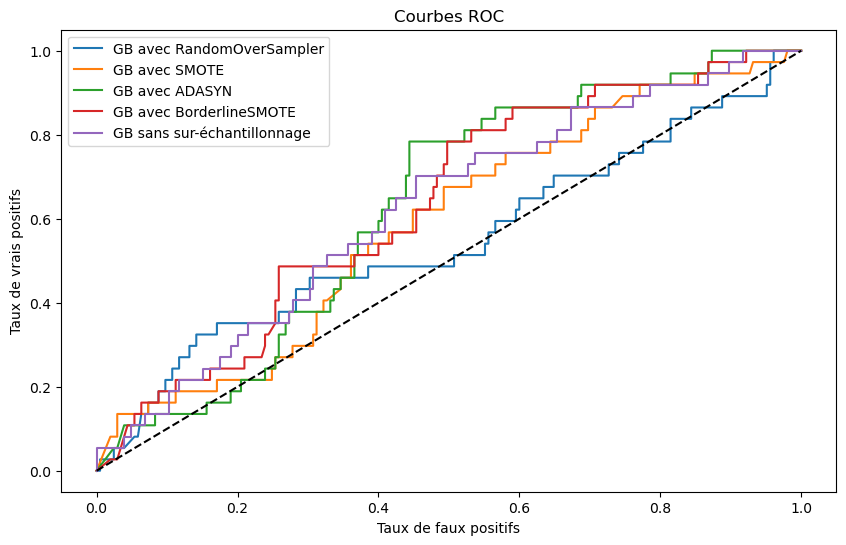

In [504]:
# Courbes ROC

fpr_gb_randomoversampler_cv, tpr_gb_randomoversampler_cv, _ = roc_curve(y_test, y_proba_gb_randomoversampler_cv)
fpr_gb_smote_cv, tpr_gb_smote_cv, _ = roc_curve(y_test, y_proba_gb_smote_cv)
fpr_gb_adasyn_cv, tpr_gb_adasyn_cv, _ = roc_curve(y_test, y_proba_gb_adasyn_cv)
fpr_gb_borderline_smote_cv, tpr_gb_borderline_smote_cv, _ = roc_curve(y_test, y_proba_gb_borderline_smote_cv)
fpr_gb_cv, tpr_gb_cv, _ = roc_curve(y_test, y_proba_gb_cv)

plt.figure(figsize=(10, 6))
plt.plot(fpr_gb_randomoversampler_cv, tpr_gb_randomoversampler_cv, label='GB avec RandomOverSampler')
plt.plot(fpr_gb_smote_cv, tpr_gb_smote_cv, label='GB avec SMOTE')
plt.plot(fpr_gb_adasyn_cv, tpr_gb_adasyn_cv, label='GB avec ADASYN')
plt.plot(fpr_gb_borderline_smote_cv, tpr_gb_borderline_smote_cv, label='GB avec BorderlineSMOTE')
plt.plot(fpr_gb_cv, tpr_gb_cv, label='GB sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

# Export de l'image
plt.savefig('data/Courbes_ROC_gb_cv.png')

plt.show()


### E) Importance des variables

In [505]:
# Importance des variables

# Récupération de l'importance des variables pour chaque modèle
importances_gb_randomoversampler = grille_recherche_gb_randomoversampler.best_estimator_.named_steps['gb'].feature_importances_
importances_gb_smote = grille_recherche_gb_smote.best_estimator_.named_steps['gb'].feature_importances_
importances_gb_adasyn = grille_recherche_gb_adasyn.best_estimator_.named_steps['gb'].feature_importances_
importances_gb_borderline_smote = grille_recherche_gb_borderline_smote.best_estimator_.named_steps['gb'].feature_importances_
importances_gb = grille_recherche_gb.best_estimator_.named_steps['gb'].feature_importances_

# Création d'un DataFrame pour afficher les résultats
resultats_importance_variables_gb_randomoversampler = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_gb_randomoversampler
})

resultats_importance_variables_gb_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_gb_smote
})

resultats_importance_variables_gb_adasyn = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_gb_adasyn
})

resultats_importance_variables_gb_borderline_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_gb_borderline_smote
})

resultats_importance_variables_gb = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_gb
})

# Affichage des résultats
resultats_importance_variables_gb_randomoversampler = resultats_importance_variables_gb_randomoversampler.sort_values(by="Importance", ascending=False)
resultats_importance_variables_gb_smote = resultats_importance_variables_gb_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_gb_adasyn = resultats_importance_variables_gb_adasyn.sort_values(by="Importance", ascending=False)
resultats_importance_variables_gb_borderline_smote = resultats_importance_variables_gb_borderline_smote.sort_values(by="Importance", ascending=False)
resultats_importance_gb = resultats_importance_variables_gb.sort_values(by="Importance", ascending=False)

resultats_importance_variables_gb_randomoversampler

Variable  Importance
18                               p_pop    0.159479
16                            med_disp    0.082444
6                nb_actes_france_renov    0.072422
21                       part_inactifs    0.064631
4             moyenne_conso_totale_hab    0.062121
27             part_licencies_sportifs    0.053608
20  com_variation_encours_dette_ha_pct    0.050878
5                        emissions_ges    0.049833
2          moyenne_conso_tertiaire_hab    0.042176
9          part_residences_secondaires    0.040793
24              abstention_municipales    0.039474
26                   total_entreprises    0.038615
22                         part_actifs    0.037710
3        moyenne_conso_residentiel_hab    0.036931
1              moyenne_conso_indus_hab    0.031435
12                        superf_choro    0.025650
8                         ecoquartiers    0.021332
15                part_trajets_voiture    0.016934
28            part_jeunes_sans_diplome    0.015077
7                               friche    0.011947
19                           CSP_maire    0.010210
25                   taux_creation_ent    0.008935
11                            gridens7    0.008852
0               moyenne_conso_agri_hab    0.006349
14                            gare_tgv    0.004922
23                      dependance_eco    0.004037
10                   beneficiaire_prog    0.002676
13                         departement    0.000513
31                          climat_Mer    0.000013
29                        climat_Autre    0.000003
17                                  an    0.000000
30                     climat_Estuaire    0.000000

In [506]:
resultats_importance_variables_gb_smote

Variable  Importance
11                            gridens7    0.237736
18                               p_pop    0.205778
7                               friche    0.204471
1              moyenne_conso_indus_hab    0.138166
13                         departement    0.044893
21                       part_inactifs    0.030913
26                   total_entreprises    0.030017
22                         part_actifs    0.025645
25                   taux_creation_ent    0.012149
0               moyenne_conso_agri_hab    0.009174
6                nb_actes_france_renov    0.008502
19                           CSP_maire    0.008194
2          moyenne_conso_tertiaire_hab    0.007285
12                        superf_choro    0.006497
27             part_licencies_sportifs    0.005053
16                            med_disp    0.004998
3        moyenne_conso_residentiel_hab    0.004727
24              abstention_municipales    0.004694
4             moyenne_conso_totale_hab    0.004289
9          part_residences_secondaires    0.003920
15                part_trajets_voiture    0.001873
8                         ecoquartiers    0.000828
20  com_variation_encours_dette_ha_pct    0.000199
17                                  an    0.000000
14                            gare_tgv    0.000000
10                   beneficiaire_prog    0.000000
23                      dependance_eco    0.000000
5                        emissions_ges    0.000000
28            part_jeunes_sans_diplome    0.000000
29                        climat_Autre    0.000000
30                     climat_Estuaire    0.000000
31                          climat_Mer    0.000000

In [507]:
resultats_importance_variables_gb_adasyn

Variable  Importance
7                               friche    0.239033
1              moyenne_conso_indus_hab    0.152150
13                         departement    0.140757
11                            gridens7    0.128304
6                nb_actes_france_renov    0.061801
26                   total_entreprises    0.055523
21                       part_inactifs    0.035418
18                               p_pop    0.029379
12                        superf_choro    0.023941
19                           CSP_maire    0.019889
20  com_variation_encours_dette_ha_pct    0.017301
27             part_licencies_sportifs    0.015709
22                         part_actifs    0.014856
23                      dependance_eco    0.012198
28            part_jeunes_sans_diplome    0.012137
16                            med_disp    0.008752
4             moyenne_conso_totale_hab    0.006808
2          moyenne_conso_tertiaire_hab    0.006142
24              abstention_municipales    0.005537
5                        emissions_ges    0.005374
0               moyenne_conso_agri_hab    0.005157
25                   taux_creation_ent    0.001522
9          part_residences_secondaires    0.001442
3        moyenne_conso_residentiel_hab    0.000730
15                part_trajets_voiture    0.000140
17                                  an    0.000000
14                            gare_tgv    0.000000
10                   beneficiaire_prog    0.000000
8                         ecoquartiers    0.000000
29                        climat_Autre    0.000000
30                     climat_Estuaire    0.000000
31                          climat_Mer    0.000000

In [508]:
resultats_importance_variables_gb_adasyn

Variable  Importance
7                               friche    0.239033
1              moyenne_conso_indus_hab    0.152150
13                         departement    0.140757
11                            gridens7    0.128304
6                nb_actes_france_renov    0.061801
26                   total_entreprises    0.055523
21                       part_inactifs    0.035418
18                               p_pop    0.029379
12                        superf_choro    0.023941
19                           CSP_maire    0.019889
20  com_variation_encours_dette_ha_pct    0.017301
27             part_licencies_sportifs    0.015709
22                         part_actifs    0.014856
23                      dependance_eco    0.012198
28            part_jeunes_sans_diplome    0.012137
16                            med_disp    0.008752
4             moyenne_conso_totale_hab    0.006808
2          moyenne_conso_tertiaire_hab    0.006142
24              abstention_municipales    0.005537
5                        emissions_ges    0.005374
0               moyenne_conso_agri_hab    0.005157
25                   taux_creation_ent    0.001522
9          part_residences_secondaires    0.001442
3        moyenne_conso_residentiel_hab    0.000730
15                part_trajets_voiture    0.000140
17                                  an    0.000000
14                            gare_tgv    0.000000
10                   beneficiaire_prog    0.000000
8                         ecoquartiers    0.000000
29                        climat_Autre    0.000000
30                     climat_Estuaire    0.000000
31                          climat_Mer    0.000000

In [509]:
resultats_importance_variables_gb

Variable  Importance
0               moyenne_conso_agri_hab    0.025029
1              moyenne_conso_indus_hab    0.037199
2          moyenne_conso_tertiaire_hab    0.060809
3        moyenne_conso_residentiel_hab    0.030932
4             moyenne_conso_totale_hab    0.048473
5                        emissions_ges    0.036720
6                nb_actes_france_renov    0.042153
7                               friche    0.005654
8                         ecoquartiers    0.000044
9          part_residences_secondaires    0.006712
10                   beneficiaire_prog    0.002988
11                            gridens7    0.014599
12                        superf_choro    0.065551
13                         departement    0.012117
14                            gare_tgv    0.004870
15                part_trajets_voiture    0.029915
16                            med_disp    0.034050
17                                  an    0.000000
18                               p_pop    0.093660
19                           CSP_maire    0.020826
20  com_variation_encours_dette_ha_pct    0.067235
21                       part_inactifs    0.089906
22                         part_actifs    0.049137
23                      dependance_eco    0.027166
24              abstention_municipales    0.033437
25                   taux_creation_ent    0.038035
26                   total_entreprises    0.025806
27             part_licencies_sportifs    0.052807
28            part_jeunes_sans_diplome    0.038577
29                        climat_Autre    0.000009
30                     climat_Estuaire    0.005345
31                          climat_Mer    0.000235

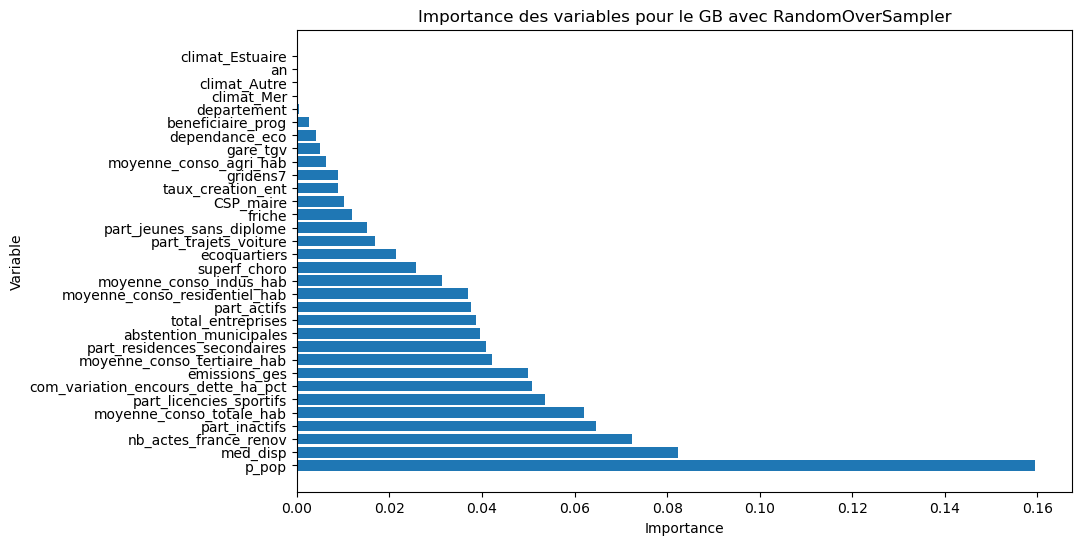

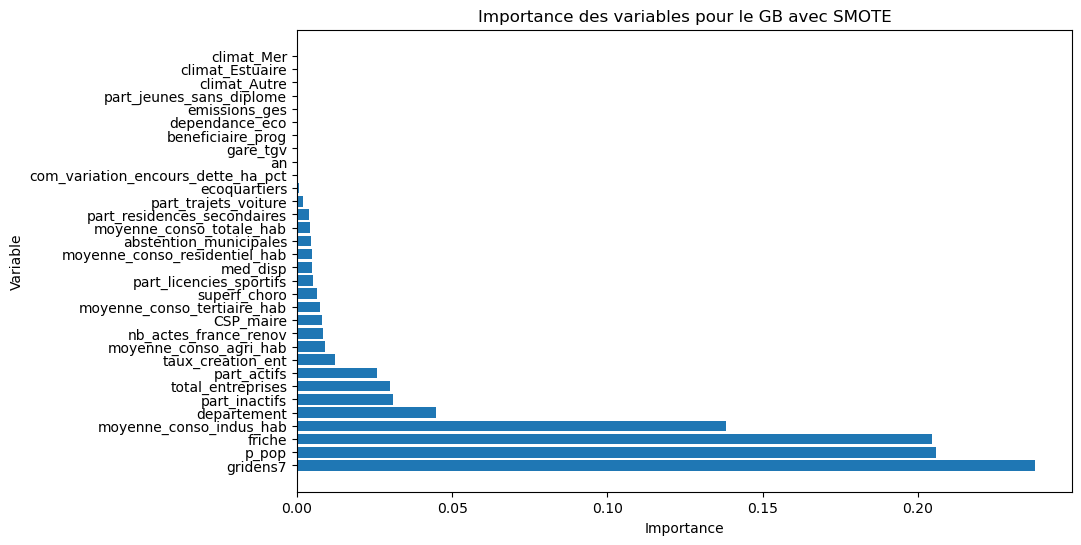

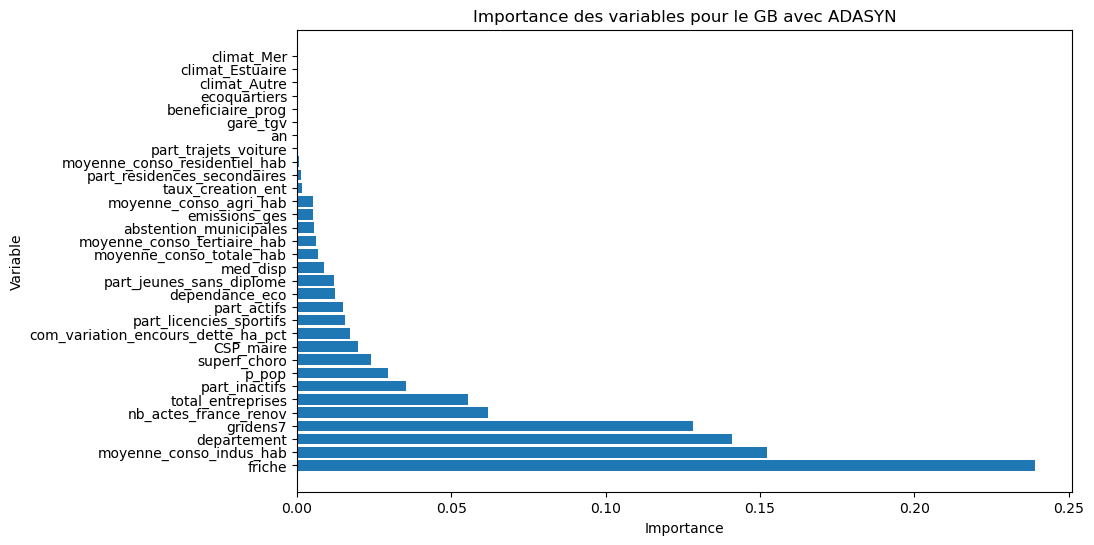

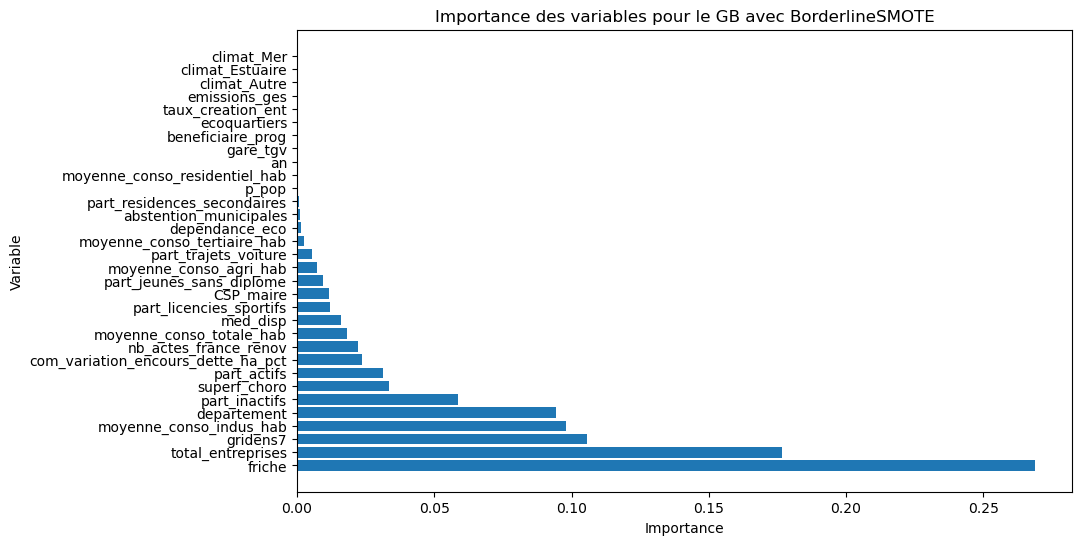

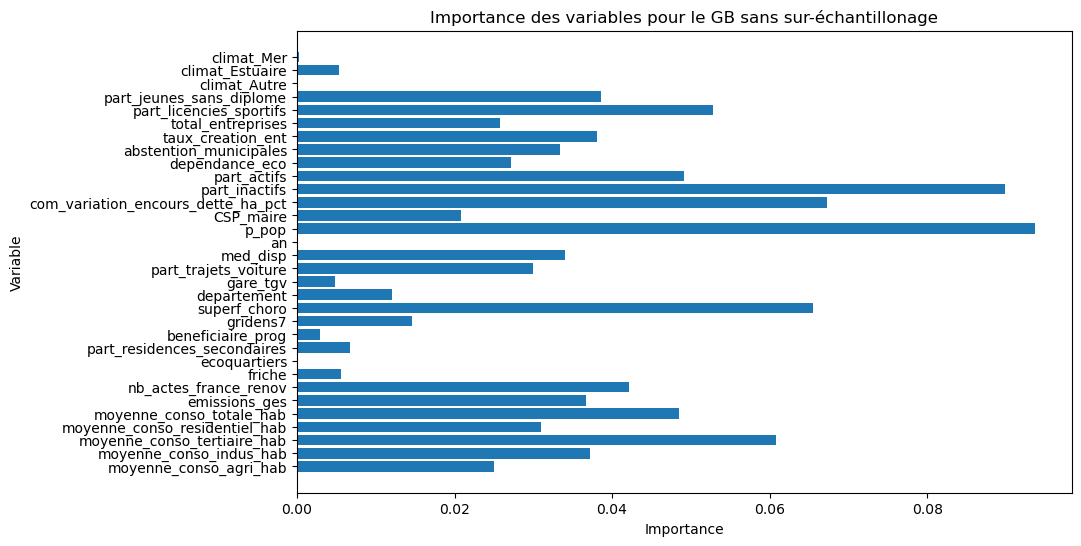

In [510]:
# Graphique de l'importance des variables

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_gb_randomoversampler['Variable'], resultats_importance_variables_gb_randomoversampler['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le GB avec RandomOverSampler')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_gb_smote['Variable'], resultats_importance_variables_gb_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le GB avec SMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_gb_adasyn['Variable'], resultats_importance_variables_gb_adasyn['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le GB avec ADASYN')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_gb_borderline_smote['Variable'], resultats_importance_variables_gb_borderline_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le GB avec BorderlineSMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_gb['Variable'], resultats_importance_variables_gb['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le GB sans sur-échantillonage')
plt.show()

### F) Ajustement des hyperparamètres bis

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, balanced_accuracy_score, roc_auc_score

# Grilles de paramètres adaptées pour éviter le surapprentissage

param_grid_gb_oversampler_bis = {
    'oversampler__sampling_strategy': [0.5, 0.75, 1.0],  # Stratégies simplifiées pour échantillonnage
    'gb__n_estimators': [50, 100, 300],  # Réduction des options pour le nombre d'arbres
    'gb__learning_rate': [0.01, 0.1, 0.5],  # Ajout d'une valeur plus basse pour learning_rate
    'gb__max_depth': [3, 5, 7]  # Limitation des options pour max_depth
}

param_grid_gb_smote_bis = {
    'smote__k_neighbors': [5, 7],  # Réduction des voisins pour SMOTE
    'smote__sampling_strategy': [0.5, 0.75, 1.0], 
    'gb__n_estimators': [50, 100, 300], 
    'gb__learning_rate': [0.01, 0.1, 0.5], 
    'gb__max_depth': [3, 5, 7]  
}

param_grid_gb_adasyn_bis = {
    'adasyn__n_neighbors': [5, 7], 
    'adasyn__sampling_strategy': [0.5, 0.75, 1.0], 
    'gb__n_estimators': [50, 100, 300], 
    'gb__learning_rate': [0.01, 0.1, 0.5], 
    'gb__max_depth': [3, 5, 7]  
}

param_grid_gb_borderline_smote_bis = {
    'borderline_smote__k_neighbors': [5, 7], 
    'borderline_smote__sampling_strategy': [0.5, 0.75, 1.0], 
    'gb__n_estimators': [50, 100, 300], 
    'gb__learning_rate': [0.01, 0.1, 0.5], 
    'gb__max_depth': [3, 5, 7]  
}

param_grid_gb_bis = {
    'gb__n_estimators': [50, 100, 300], 
    'gb__learning_rate': [0.01, 0.1, 0.5], 
    'gb__max_depth': [3, 5, 7]  
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score),
    'Balanced Accuracy': make_scorer(balanced_accuracy_score),
    'AUC': make_scorer(roc_auc_score),
}

In [ ]:
grille_recherche_gb_randomoversampler_bis = RandomizedSearchCV(modele_gb_randomoversampler, param_grid_gb_oversampler_bis, cv=cv, scoring=scoring, refit = 'AUC', n_jobs=-1, random_state=42)
grille_recherche_gb_smote_bis = RandomizedSearchCV(modele_gb_smote, param_grid_gb_smote_bis, cv=cv, scoring=scoring, refit = 'AUC',n_jobs=-1, random_state=42)
grille_recherche_gb_adasyn_bis = RandomizedSearchCV(modele_gb_adasyn, param_grid_gb_adasyn_bis, cv=cv, scoring=scoring, refit = 'AUC',n_jobs=-1, random_state=42)
grille_recherche_gb_borderline_smote_bis = RandomizedSearchCV(modele_gb_borderline_smote, param_grid_gb_borderline_smote_bis, cv=cv, scoring=scoring, refit = 'AUC',n_jobs=-1, random_state=42)
grille_recherche_gb_bis = RandomizedSearchCV(modele_gb, param_grid_gb_bis, cv=cv, scoring=scoring, refit = 'AUC',n_jobs=-1, random_state=42)

In [ ]:
modele_gb_oversampler_opt_bis = grille_recherche_gb_randomoversampler_bis.fit(X_train, y_train).best_estimator_
modele_gb_smote_opt_bis = grille_recherche_gb_smote_bis.fit(X_train, y_train).best_estimator_
modele_gb_adasyn_opt_bis = grille_recherche_gb_adasyn_bis.fit(X_train, y_train).best_estimator_
modele_gb_borderline_smote_opt_bis = grille_recherche_gb_borderline_smote_bis.fit(X_train, y_train).best_estimator_
modele_gb_opt_bis = grille_recherche_gb_bis.fit(X_train, y_train).best_estimator_   

In [ ]:
# Prédictions avec les meilleurs hyperparamètres

y_pred_gb_randomoversampler_cv = modele_gb_oversampler_opt_bis.predict(X_test)
y_proba_gb_randomoversampler_cv = modele_gb_oversampler_opt_bis.predict_proba(X_test)[:, 1]

y_pred_gb_smote_cv = modele_gb_smote_opt_bis.predict(X_test)
y_proba_gb_smote_cv = modele_gb_smote_opt_bis.predict_proba(X_test)[:, 1]

y_pred_gb_adasyn_cv = modele_gb_adasyn_opt_bis.predict(X_test)
y_proba_gb_adasyn_cv = modele_gb_adasyn_opt_bis.predict_proba(X_test)[:, 1]

y_pred_gb_borderline_smote_cv = modele_gb_borderline_smote_opt_bis.predict(X_test)
y_proba_gb_borderline_smote_cv = modele_gb_borderline_smote_opt_bis.predict_proba(X_test)[:, 1]

y_pred_gb_cv = modele_gb_opt_bis.predict(X_test)
y_proba_gb_cv = modele_gb_opt_bis.predict_proba(X_test)[:, 1]

### G) Mesure de la performance bis

In [ ]:
# Calcul des métriques

auc_roc_gb_randomoversampler_cv = roc_auc_score(y_test, y_proba_gb_randomoversampler_cv)
f1_gb_randomoversampler_cv = f1_score(y_test, y_pred_gb_randomoversampler_cv)
balanced_acc_gb_randomoversampler_cv = balanced_accuracy_score(y_test, y_pred_gb_randomoversampler_cv)

auc_roc_gb_smote_cv = roc_auc_score(y_test, y_proba_gb_smote_cv)
f1_gb_smote_cv = f1_score(y_test, y_pred_gb_smote_cv)
balanced_acc_gb_smote_cv = balanced_accuracy_score(y_test, y_pred_gb_smote_cv)

auc_roc_gb_adasyn_cv = roc_auc_score(y_test, y_proba_gb_adasyn_cv)
f1_gb_adasyn_cv = f1_score(y_test, y_pred_gb_adasyn_cv)
balanced_acc_gb_adasyn_cv = balanced_accuracy_score(y_test, y_pred_gb_adasyn_cv)

auc_roc_gb_borderline_smote_cv = roc_auc_score(y_test, y_proba_gb_borderline_smote_cv)
f1_gb_borderline_smote_cv = f1_score(y_test, y_pred_gb_borderline_smote_cv)
balanced_acc_gb_borderline_smote_cv = balanced_accuracy_score(y_test, y_pred_gb_borderline_smote_cv)

auc_roc_gb_cv = roc_auc_score(y_test, y_proba_gb_cv)
f1_gb_cv = f1_score(y_test, y_pred_gb_cv)
balanced_acc_gb_cv = balanced_accuracy_score(y_test, y_pred_gb_cv)

# Affichage des résultats
resultats_gb_cv = pd.DataFrame({
    "Gradient Boosting sans sur-échantillonnage": [auc_roc_gb_cv, f1_gb_cv, balanced_acc_gb_cv],
    "Gradient Boosting avec SMOTE": [auc_roc_gb_smote_cv, f1_gb_smote_cv, balanced_acc_gb_smote_cv],
    "Gradient Boosting avec RandomOverSampler": [auc_roc_gb_randomoversampler_cv, f1_gb_randomoversampler_cv, balanced_acc_gb_randomoversampler_cv],
    "Gradient Boosting avec ADASYN": [auc_roc_gb_adasyn_cv, f1_gb_adasyn_cv, balanced_acc_gb_adasyn_cv],
    "Gradient Boosting avec BorderlineSMOTE": [auc_roc_gb_borderline_smote_cv, f1_gb_borderline_smote_cv, balanced_acc_gb_borderline_smote_cv]
    },
    index = ["AUC-ROC", "F1-score", "Balanced accuracy"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_gb_cv = resultats_gb_cv.round(3)
resultats_gb_cv

In [ ]:
# Courbes ROC

fpr_gb_randomoversampler_cv, tpr_gb_randomoversampler_cv, _ = roc_curve(y_test, y_proba_gb_randomoversampler_cv)
fpr_gb_smote_cv, tpr_gb_smote_cv, _ = roc_curve(y_test, y_proba_gb_smote_cv)
fpr_gb_adasyn_cv, tpr_gb_adasyn_cv, _ = roc_curve(y_test, y_proba_gb_adasyn_cv)
fpr_gb_borderline_smote_cv, tpr_gb_borderline_smote_cv, _ = roc_curve(y_test, y_proba_gb_borderline_smote_cv)
fpr_gb_cv, tpr_gb_cv, _ = roc_curve(y_test, y_proba_gb_cv)

plt.figure(figsize=(10, 6))
plt.plot(fpr_gb_randomoversampler_cv, tpr_gb_randomoversampler_cv, label='GB avec RandomOverSampler')
plt.plot(fpr_gb_smote_cv, tpr_gb_smote_cv, label='GB avec SMOTE')
plt.plot(fpr_gb_adasyn_cv, tpr_gb_adasyn_cv, label='GB avec ADASYN')
plt.plot(fpr_gb_borderline_smote_cv, tpr_gb_borderline_smote_cv, label='GB avec BorderlineSMOTE')
plt.plot(fpr_gb_cv, tpr_gb_cv, label='GB sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

# Export de l'image
plt.savefig('data/Courbes_ROC_gb_cv.png')

plt.show()

## I.2.5. Adaboost

### A) Construction des modèles

In [511]:
# Construction des modèles
from sklearn.ensemble import AdaBoostClassifier

etapes_adaboost_randomoversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler()), # Sur-échantillonnage
        ('adaboost', AdaBoostClassifier(random_state=42)) # AdaBoost
        ]

etapes_adaboost_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('smote', SMOTE(k_neighbors = 5)), # Sur-échantillonnage
        ('adaboost', AdaBoostClassifier(random_state=42)) # AdaBoost
        ]

etapes_adaboost_adasyn = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('adasyn', ADASYN(n_neighbors = 5)), # Sur-échantillonnage
        ('adaboost', AdaBoostClassifier(random_state=42)) # AdaBoost
        ]

etapes_adaboost_borderline_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('borderline_smote', BorderlineSMOTE(k_neighbors = 5)), # Sur-échantillonnage
        ('adaboost', AdaBoostClassifier(random_state=42)) # AdaBoost
        ]

etapes_adaboost = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('adaboost', AdaBoostClassifier(random_state=42)) # AdaBoost
        ]

modele_adaboost_randomoversampler = Pipeline(steps=etapes_adaboost_randomoversampler) # Création du pipeline
modele_adaboost_smote = Pipeline(steps=etapes_adaboost_smote) # Création du pipeline
modele_adaboost_adasyn = Pipeline(steps=etapes_adaboost_adasyn) # Création du pipeline
modele_adaboost_borderline_smote = Pipeline(steps=etapes_adaboost_borderline_smote) # Création du pipeline
modele_adaboost = Pipeline(steps=etapes_adaboost) # Création du pipeline

In [512]:
modele_adaboost_randomoversampler.fit(X_train, y_train) # Entraînement
modele_adaboost_smote.fit(X_train, y_train) # Entraînement
modele_adaboost_adasyn.fit(X_train, y_train) # Entraînement
modele_adaboost_borderline_smote.fit(X_train, y_train) # Entraînement
modele_adaboost.fit(X_train, y_train) # Entraînement

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('adaboost', AdaBoostClassifier(random_state=42))])

In [513]:
# Prédictions

y_proba_adaboost_randomoversampler = modele_adaboost_randomoversampler.predict_proba(X_test)[:, 1]
y_pred_adaboost_randomoversampler = modele_adaboost_randomoversampler.predict(X_test)

y_proba_adaboost_smote = modele_adaboost_smote.predict_proba(X_test)[:, 1]
y_pred_adaboost_smote = modele_adaboost_smote.predict(X_test)

y_proba_adaboost_adasyn = modele_adaboost_adasyn.predict_proba(X_test)[:, 1]
y_pred_adaboost_adasyn = modele_adaboost_adasyn.predict(X_test)

y_proba_adaboost_borderline_smote = modele_adaboost_borderline_smote.predict_proba(X_test)[:, 1]
y_pred_adaboost_borderline_smote = modele_adaboost_borderline_smote.predict(X_test)

y_proba_adaboost = modele_adaboost.predict_proba(X_test)[:, 1]
y_pred_adaboost = modele_adaboost.predict(X_test)

In [514]:
print(f'y_test shape: {y_test.shape}')
print(f'y_proba_adaboost_randomoversampler shape: {y_proba_adaboost_randomoversampler.shape}')
print(f'y_proba_adaboost_smote shape: {y_proba_adaboost_smote.shape}')
print(f'y_proba_adaboost_adasyn shape: {y_proba_adaboost_adasyn.shape}')
print(f'y_proba_adaboost_borderline_smote shape: {y_proba_adaboost_borderline_smote.shape}')
print(f'y_proba_adaboost shape: {y_proba_adaboost.shape}')


y_test shape: (242,)
y_proba_adaboost_randomoversampler shape: (242,)
y_proba_adaboost_smote shape: (242,)
y_proba_adaboost_adasyn shape: (242,)
y_proba_adaboost_borderline_smote shape: (242,)
y_proba_adaboost shape: (242,)


### B) Mesure de la performance des modèles initiaux

In [515]:
# Calcul des métriques

auc_roc_adaboost_randomoversampler = roc_auc_score(y_test, y_proba_adaboost_randomoversampler)
auc_pr_adaboost_randomoversampler = average_precision_score(y_test, y_proba_adaboost_randomoversampler)
log_loss_value_adaboost_randomoversampler = log_loss(y_test, y_proba_adaboost_randomoversampler)
precision_adaboost_randomoversampler = precision_score(y_test, y_pred_adaboost_randomoversampler)
recall_adaboost_randomoversampler = recall_score(y_test, y_pred_adaboost_randomoversampler)
f1_adaboost_randomoversampler = f1_score(y_test, y_pred_adaboost_randomoversampler)
mcc_adaboost_randomoversampler = matthews_corrcoef(y_test, y_pred_adaboost_randomoversampler)
balanced_acc_adaboost_randomoversampler = balanced_accuracy_score(y_test, y_pred_adaboost_randomoversampler)
specificity_adaboost_randomoversampler = confusion_matrix(y_test, y_pred_adaboost_randomoversampler)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_randomoversampler)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_randomoversampler)[0, 1])
cohen_kappa_adaboost_randomoversampler = cohen_kappa_score(y_test, y_pred_adaboost_randomoversampler)

auc_roc_adaboost_smote = roc_auc_score(y_test, y_proba_adaboost_smote)
auc_pr_adaboost_smote = average_precision_score(y_test, y_proba_adaboost_smote)
log_loss_value_adaboost_smote = log_loss(y_test, y_proba_adaboost_smote)
precision_adaboost_smote = precision_score(y_test, y_pred_adaboost_smote)
recall_adaboost_smote = recall_score(y_test, y_pred_adaboost_smote)
f1_adaboost_smote = f1_score(y_test, y_pred_adaboost_smote)
mcc_adaboost_smote = matthews_corrcoef(y_test, y_pred_adaboost_smote)
balanced_acc_adaboost_smote = balanced_accuracy_score(y_test, y_pred_adaboost_smote)
specificity_adaboost_smote = confusion_matrix(y_test, y_pred_adaboost_smote)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_smote)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_smote)[0, 1])
cohen_kappa_adaboost_smote = cohen_kappa_score(y_test, y_pred_adaboost_smote)

auc_roc_adaboost_adasyn = roc_auc_score(y_test, y_proba_adaboost_adasyn)
auc_pr_adaboost_adasyn = average_precision_score(y_test, y_proba_adaboost_adasyn)
log_loss_value_adaboost_adasyn = log_loss(y_test, y_proba_adaboost_adasyn)
precision_adaboost_adasyn = precision_score(y_test, y_pred_adaboost_adasyn)
recall_adaboost_adasyn = recall_score(y_test, y_pred_adaboost_adasyn)
f1_adaboost_adasyn = f1_score(y_test, y_pred_adaboost_adasyn)
mcc_adaboost_adasyn = matthews_corrcoef(y_test, y_pred_adaboost_adasyn)
balanced_acc_adaboost_adasyn = balanced_accuracy_score(y_test, y_pred_adaboost_adasyn)
specificity_adaboost_adasyn = confusion_matrix(y_test, y_pred_adaboost_adasyn)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_adasyn)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_adasyn)[0, 1])
cohen_kappa_adaboost_adasyn = cohen_kappa_score(y_test, y_pred_adaboost_adasyn)

auc_roc_adaboost_borderline_smote = roc_auc_score(y_test, y_proba_adaboost_borderline_smote)
auc_pr_adaboost_borderline_smote = average_precision_score(y_test, y_proba_adaboost_borderline_smote)
log_loss_value_adaboost_borderline_smote = log_loss(y_test, y_proba_adaboost_borderline_smote)
precision_adaboost_borderline_smote = precision_score(y_test, y_pred_adaboost_borderline_smote)
recall_adaboost_borderline_smote = recall_score(y_test, y_pred_adaboost_borderline_smote)
f1_adaboost_borderline_smote = f1_score(y_test, y_pred_adaboost_borderline_smote)
mcc_adaboost_borderline_smote = matthews_corrcoef(y_test, y_pred_adaboost_borderline_smote)
balanced_acc_adaboost_borderline_smote = balanced_accuracy_score(y_test, y_pred_adaboost_borderline_smote)
specificity_adaboost_borderline_smote = confusion_matrix(y_test, y_pred_adaboost_borderline_smote)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_borderline_smote)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_borderline_smote)[0, 1])
cohen_kappa_adaboost_borderline_smote = cohen_kappa_score(y_test, y_pred_adaboost_borderline_smote)

auc_roc_adaboost = roc_auc_score(y_test, y_proba_adaboost)
auc_pr_adaboost = average_precision_score(y_test, y_proba_adaboost)
log_loss_value_adaboost = log_loss(y_test, y_proba_adaboost)
precision_adaboost = precision_score(y_test, y_pred_adaboost)
recall_adaboost = recall_score(y_test, y_pred_adaboost)
f1_adaboost = f1_score(y_test, y_pred_adaboost)
mcc_adaboost = matthews_corrcoef(y_test, y_pred_adaboost)
balanced_acc_adaboost = balanced_accuracy_score(y_test, y_pred_adaboost)
specificity_adaboost = confusion_matrix(y_test, y_pred_adaboost)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost)[0, 0] + confusion_matrix(y_test, y_pred_adaboost)[0, 1])
cohen_kappa_adaboost = cohen_kappa_score(y_test, y_pred_adaboost)

In [516]:
# Affichage des résultats

resultats_adaboost = pd.DataFrame({
    "AdaBoost sans sur-échantillonnage": [auc_roc_adaboost, auc_pr_adaboost, f1_adaboost, balanced_acc_adaboost],
    "AdaBoost avec SMOTE": [auc_roc_adaboost_smote, auc_pr_adaboost_smote, f1_adaboost_smote, balanced_acc_adaboost_smote],
    "AdaBoost avec RandomOverSampler": [auc_roc_adaboost_randomoversampler, auc_pr_adaboost_randomoversampler, f1_adaboost_randomoversampler, balanced_acc_adaboost_randomoversampler],
    "AdaBoost avec ADASYN": [auc_roc_adaboost_adasyn, auc_pr_adaboost_adasyn, f1_adaboost_adasyn, balanced_acc_adaboost_adasyn],
    "AdaBoost avec BorderlineSMOTE": [auc_roc_adaboost_borderline_smote, auc_pr_adaboost_borderline_smote, f1_adaboost_borderline_smote, balanced_acc_adaboost_borderline_smote]
    },
    index = ["AUC-ROC", "AUC-PR", "F1-score", "Balanced accuracy"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_adaboost = resultats_adaboost.round(3)
resultats_adaboost

AdaBoost sans sur-échantillonnage  AdaBoost avec SMOTE  \
AUC-ROC                                        0.628                0.587   
AUC-PR                                         0.270                0.194   
F1-score                                       0.197                0.268   
Balanced accuracy                              0.537                0.556   

                   AdaBoost avec RandomOverSampler  AdaBoost avec ADASYN  \
AUC-ROC                                      0.597                 0.638   
AUC-PR                                       0.249                 0.253   
F1-score                                     0.264                 0.306   
Balanced accuracy                            0.550                 0.591   

                   AdaBoost avec BorderlineSMOTE  
AUC-ROC                                    0.592  
AUC-PR                                     0.202  
F1-score                                   0.229  
Balanced accuracy                          0.526

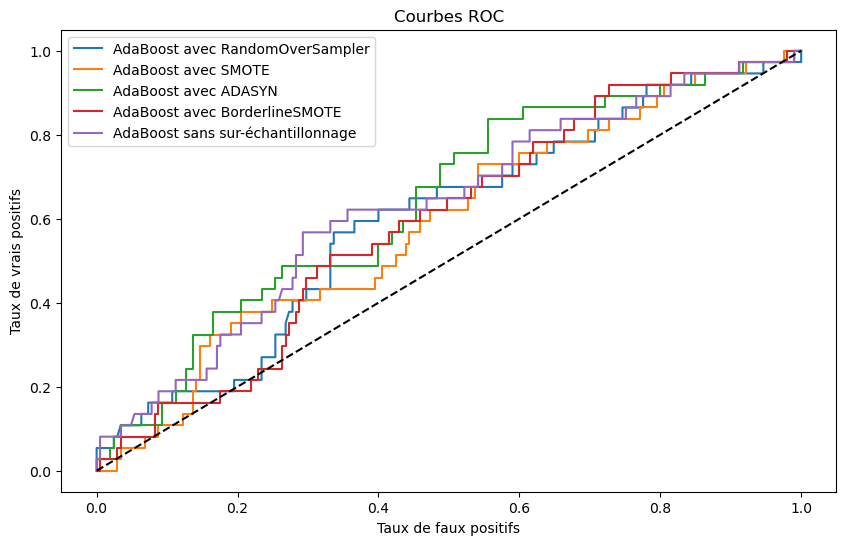

In [517]:
# Courbes ROC

fpr_adaboost_randomoversampler, tpr_adaboost_randomoversampler, _ = roc_curve(y_test, y_proba_adaboost_randomoversampler)
fpr_adaboost_smote, tpr_adaboost_smote, _ = roc_curve(y_test, y_proba_adaboost_smote)
fpr_adaboost_adasyn, tpr_adaboost_adasyn, _ = roc_curve(y_test, y_proba_adaboost_adasyn)
fpr_adaboost_borderline_smote, tpr_adaboost_borderline_smote, _ = roc_curve(y_test, y_proba_adaboost_borderline_smote)
fpr_adaboost, tpr_adaboost, _ = roc_curve(y_test, y_proba_adaboost)

plt.figure(figsize=(10, 6))
plt.plot(fpr_adaboost_randomoversampler, tpr_adaboost_randomoversampler, label='AdaBoost avec RandomOverSampler')
plt.plot(fpr_adaboost_smote, tpr_adaboost_smote, label='AdaBoost avec SMOTE')
plt.plot(fpr_adaboost_adasyn, tpr_adaboost_adasyn, label='AdaBoost avec ADASYN')
plt.plot(fpr_adaboost_borderline_smote, tpr_adaboost_borderline_smote, label='AdaBoost avec BorderlineSMOTE')
plt.plot(fpr_adaboost, tpr_adaboost, label='AdaBoost sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

# Export de l'image
plt.savefig('data/Courbes_ROC_adaboost.png')

plt.show()


### C) Ajustement des hyperparamètres

In [518]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, balanced_accuracy_score, roc_auc_score

# Grilles de paramètres adaptées pour éviter le surapprentissage

param_grid_adaboost_oversampler = {
    'oversampler__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0],  
    'adaboost__n_estimators': [50, 100, 200, 300, 400, 500],  
    'adaboost__learning_rate': [0.01, 0.05, 0.1, 0.5], 
}

param_grid_adaboost_smote = {
    'smote__k_neighbors': [3, 5, 7],  
    'smote__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0], 
    'adaboost__n_estimators': [50, 100, 200, 300, 400, 500],  
    'adaboost__learning_rate': [0.01, 0.05, 0.1, 0.5], 
}

param_grid_adaboost_adasyn = {
    'adasyn__n_neighbors': [3, 5, 7], 
    'adasyn__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0], 
    'adaboost__n_estimators': [50, 100, 200, 300, 400, 500],  
    'adaboost__learning_rate': [0.01, 0.05, 0.1, 0.5], 
}

param_grid_adaboost_borderline_smote = {
    'borderline_smote__k_neighbors': [3, 5, 7], 
    'borderline_smote__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0], 
    'adaboost__n_estimators': [50, 100, 200, 300, 400, 500],  
    'adaboost__learning_rate': [0.01, 0.05, 0.1, 0.5], 
}

param_grid_adaboost = {
    'adaboost__n_estimators': [50, 100, 200, 300, 400, 500],  
    'adaboost__learning_rate': [0.01, 0.05, 0.1, 0.5], 
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score),
    'Balanced Accuracy': make_scorer(balanced_accuracy_score),
    'AUC': make_scorer(roc_auc_score),
}

In [519]:
# Ajustement des hyperparamètres

grille_recherche_adaboost_randomoversampler = RandomizedSearchCV(modele_adaboost_randomoversampler, param_grid_adaboost_oversampler, cv=cv, scoring=scoring, refit = 'AUC', n_jobs=-1,  random_state=42)
grille_recherche_adaboost_smote = RandomizedSearchCV(modele_adaboost_smote, param_grid_adaboost_smote, cv=cv, scoring=scoring, refit = 'AUC',n_jobs=-1, random_state=42)
grille_recherche_adaboost_adasyn = RandomizedSearchCV(modele_adaboost_adasyn, param_grid_adaboost_adasyn, cv=cv, scoring=scoring, refit = 'AUC',n_jobs=-1, random_state=42)
grille_recherche_adaboost_borderline_smote = RandomizedSearchCV(modele_adaboost_borderline_smote, param_grid_adaboost_borderline_smote, cv=cv, scoring=scoring, refit = 'AUC',n_jobs=-1, random_state=42)
grille_recherche_adaboost = RandomizedSearchCV(modele_adaboost, param_grid_adaboost, cv=cv, scoring=scoring, refit = 'AUC',n_jobs=-1,random_state=42)

In [520]:
# Sélection du meilleur modèle

modele_adaboost_randomoversampler_opt = grille_recherche_adaboost_randomoversampler.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 45 is smaller than n_iter=50. Running 45 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py

In [521]:
modele_adaboost_smote_opt = grille_recherche_adaboost_smote.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(

In [522]:
modele_adaboost_adasyn_opt = grille_recherche_adaboost_adasyn.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(

In [523]:
modele_adaboost_borderline_smote_opt = grille_recherche_adaboost_borderline_smote.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(

In [524]:
modele_adaboost_opt = grille_recherche_adaboost.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=50. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [525]:
# Prédictions

y_proba_adaboost_randomoversampler_cv = modele_adaboost_randomoversampler_opt.predict_proba(X_test)[:, 1]
y_pred_adaboost_randomoversampler_cv = modele_adaboost_randomoversampler_opt.predict(X_test)

y_proba_adaboost_smote_cv = modele_adaboost_smote_opt.predict_proba(X_test)[:, 1]
y_pred_adaboost_smote_cv = modele_adaboost_smote_opt.predict(X_test)

y_proba_adaboost_adasyn_cv = modele_adaboost_adasyn_opt.predict_proba(X_test)[:, 1]
y_pred_adaboost_adasyn_cv = modele_adaboost_adasyn_opt.predict(X_test)

y_proba_adaboost_borderline_smote_cv = modele_adaboost_borderline_smote_opt.predict_proba(X_test)[:, 1]
y_pred_adaboost_borderline_smote_cv = modele_adaboost_borderline_smote_opt.predict(X_test)

y_proba_adaboost_cv = modele_adaboost_opt.predict_proba(X_test)[:, 1]
y_pred_adaboost_cv = modele_adaboost_opt.predict(X_test)

### D) Mesure de la performance des modèles optimisés

In [526]:
# Calcul des métriques

auc_roc_adaboost_randomoversampler_cv = roc_auc_score(y_test, y_proba_adaboost_randomoversampler_cv)
auc_pr_adaboost_randomoversampler_cv = average_precision_score(y_test, y_proba_adaboost_randomoversampler_cv)
log_loss_value_adaboost_randomoversampler_cv = log_loss(y_test, y_proba_adaboost_randomoversampler_cv)
precision_adaboost_randomoversampler_cv = precision_score(y_test, y_pred_adaboost_randomoversampler_cv)
recall_adaboost_randomoversampler_cv = recall_score(y_test, y_pred_adaboost_randomoversampler_cv)
f1_adaboost_randomoversampler_cv = f1_score(y_test, y_pred_adaboost_randomoversampler_cv)
mcc_adaboost_randomoversampler_cv = matthews_corrcoef(y_test, y_pred_adaboost_randomoversampler_cv)
balanced_acc_adaboost_randomoversampler_cv = balanced_accuracy_score(y_test, y_pred_adaboost_randomoversampler_cv)
specificity_adaboost_randomoversampler_cv = confusion_matrix(y_test, y_pred_adaboost_randomoversampler_cv)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_randomoversampler_cv)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_randomoversampler_cv)[0, 1])
cohen_kappa_adaboost_randomoversampler_cv = cohen_kappa_score(y_test, y_pred_adaboost_randomoversampler_cv)

auc_roc_adaboost_smote_cv = roc_auc_score(y_test, y_proba_adaboost_smote_cv)
auc_pr_adaboost_smote_cv = average_precision_score(y_test, y_proba_adaboost_smote_cv)
log_loss_value_adaboost_smote_cv = log_loss(y_test, y_proba_adaboost_smote_cv)
precision_adaboost_smote_cv = precision_score(y_test, y_pred_adaboost_smote_cv)
recall_adaboost_smote_cv = recall_score(y_test, y_pred_adaboost_smote_cv)
f1_adaboost_smote_cv = f1_score(y_test, y_pred_adaboost_smote_cv)
mcc_adaboost_smote_cv = matthews_corrcoef(y_test, y_pred_adaboost_smote_cv)
balanced_acc_adaboost_smote_cv = balanced_accuracy_score(y_test, y_pred_adaboost_smote_cv)
specificity_adaboost_smote_cv = confusion_matrix(y_test, y_pred_adaboost_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_smote_cv)[0, 1])
cohen_kappa_adaboost_smote_cv = cohen_kappa_score(y_test, y_pred_adaboost_smote_cv)

auc_roc_adaboost_adasyn_cv = roc_auc_score(y_test, y_proba_adaboost_adasyn_cv)
auc_pr_adaboost_adasyn_cv = average_precision_score(y_test, y_proba_adaboost_adasyn_cv)
log_loss_value_adaboost_adasyn_cv = log_loss(y_test, y_proba_adaboost_adasyn_cv)
precision_adaboost_adasyn_cv = precision_score(y_test, y_pred_adaboost_adasyn_cv)
recall_adaboost_adasyn_cv = recall_score(y_test, y_pred_adaboost_adasyn_cv)
f1_adaboost_adasyn_cv = f1_score(y_test, y_pred_adaboost_adasyn_cv)
mcc_adaboost_adasyn_cv = matthews_corrcoef(y_test, y_pred_adaboost_adasyn_cv)
balanced_acc_adaboost_adasyn_cv = balanced_accuracy_score(y_test, y_pred_adaboost_adasyn_cv)
specificity_adaboost_adasyn_cv = confusion_matrix(y_test, y_pred_adaboost_adasyn_cv)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_adasyn_cv)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_adasyn_cv)[0, 1])
cohen_kappa_adaboost_adasyn_cv = cohen_kappa_score(y_test, y_pred_adaboost_adasyn_cv)

auc_roc_adaboost_borderline_smote_cv = roc_auc_score(y_test, y_proba_adaboost_borderline_smote_cv)
auc_pr_adaboost_borderline_smote_cv = average_precision_score(y_test, y_proba_adaboost_borderline_smote_cv)
log_loss_value_adaboost_borderline_smote_cv = log_loss(y_test, y_proba_adaboost_borderline_smote_cv)
precision_adaboost_borderline_smote_cv = precision_score(y_test, y_pred_adaboost_borderline_smote_cv)
recall_adaboost_borderline_smote_cv = recall_score(y_test, y_pred_adaboost_borderline_smote_cv)
f1_adaboost_borderline_smote_cv = f1_score(y_test, y_pred_adaboost_borderline_smote_cv)
mcc_adaboost_borderline_smote_cv = matthews_corrcoef(y_test, y_pred_adaboost_borderline_smote_cv)
balanced_acc_adaboost_borderline_smote_cv = balanced_accuracy_score(y_test, y_pred_adaboost_borderline_smote_cv)
specificity_adaboost_borderline_smote_cv = confusion_matrix(y_test, y_pred_adaboost_borderline_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_borderline_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_borderline_smote_cv)[0, 1])
cohen_kappa_adaboost_borderline_smote_cv = cohen_kappa_score(y_test, y_pred_adaboost_borderline_smote_cv)

auc_roc_adaboost_cv = roc_auc_score(y_test, y_proba_adaboost_cv)
auc_pr_adaboost_cv = average_precision_score(y_test, y_proba_adaboost_cv)
log_loss_value_adaboost_cv = log_loss(y_test, y_proba_adaboost_cv)
precision_adaboost_cv = precision_score(y_test, y_pred_adaboost_cv)
recall_adaboost_cv = recall_score(y_test, y_pred_adaboost_cv)
f1_adaboost_cv = f1_score(y_test, y_pred_adaboost_cv)
mcc_adaboost_cv = matthews_corrcoef(y_test, y_pred_adaboost_cv)
balanced_acc_adaboost_cv = balanced_accuracy_score(y_test, y_pred_adaboost_cv)
specificity_adaboost_cv = confusion_matrix(y_test, y_pred_adaboost_cv)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_cv)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_cv)[0, 1])
cohen_kappa_adaboost_cv = cohen_kappa_score(y_test, y_pred_adaboost_cv)

In [527]:
# Affichage des résultats

resultats_adaboost_cv = pd.DataFrame({
    "AdaBoost sans sur-échantillonnage": [auc_roc_adaboost_cv, auc_pr_adaboost_cv, f1_adaboost_cv, balanced_acc_adaboost_cv],
    "AdaBoost avec SMOTE": [auc_roc_adaboost_smote_cv, auc_pr_adaboost_smote_cv, f1_adaboost_smote_cv, balanced_acc_adaboost_smote_cv],
    "AdaBoost avec RandomOverSampler": [auc_roc_adaboost_randomoversampler_cv, auc_pr_adaboost_randomoversampler_cv, f1_adaboost_randomoversampler_cv, balanced_acc_adaboost_randomoversampler_cv],
    "AdaBoost avec ADASYN": [auc_roc_adaboost_adasyn_cv, auc_pr_adaboost_adasyn_cv, f1_adaboost_adasyn_cv, balanced_acc_adaboost_adasyn_cv],
    "AdaBoost avec BorderlineSMOTE": [auc_roc_adaboost_borderline_smote_cv, auc_pr_adaboost_borderline_smote_cv, f1_adaboost_borderline_smote_cv, balanced_acc_adaboost_borderline_smote_cv]
    },
    index = ["AUC-ROC", "AUC-PR", "F1-score", "Balanced accuracy"]
)
# Arrondir les résultats à 3 chiffres après la virgule
resultats_adaboost_cv = resultats_adaboost_cv.round(3)
resultats_adaboost_cv

AdaBoost sans sur-échantillonnage  AdaBoost avec SMOTE  \
AUC-ROC                                        0.642                0.582   
AUC-PR                                         0.279                0.191   
F1-score                                       0.103                0.254   
Balanced accuracy                              0.527                0.531   

                   AdaBoost avec RandomOverSampler  AdaBoost avec ADASYN  \
AUC-ROC                                      0.604                 0.609   
AUC-PR                                       0.196                 0.200   
F1-score                                     0.308                 0.252   
Balanced accuracy                            0.592                 0.543   

                   AdaBoost avec BorderlineSMOTE  
AUC-ROC                                    0.549  
AUC-PR                                     0.169  
F1-score                                   0.261  
Balanced accuracy                          0.549

In [528]:
# Export 
resultats_adaboost_cv.to_csv("data/resultats_adaboost_cv.csv", index=True)
latex_table_adaboost = resultats_adaboost_cv.to_latex(index=True)
print(latex_table_adaboost)

\begin{tabular}{lrrrrr}
\toprule
 & AdaBoost sans sur-échantillonnage & AdaBoost avec SMOTE & AdaBoost avec RandomOverSampler & AdaBoost avec ADASYN & AdaBoost avec BorderlineSMOTE \\
\midrule
AUC-ROC & 0.642000 & 0.582000 & 0.604000 & 0.609000 & 0.549000 \\
AUC-PR & 0.279000 & 0.191000 & 0.196000 & 0.200000 & 0.169000 \\
F1-score & 0.103000 & 0.254000 & 0.308000 & 0.252000 & 0.261000 \\
Balanced accuracy & 0.527000 & 0.531000 & 0.592000 & 0.543000 & 0.549000 \\
\bottomrule
\end{tabular}



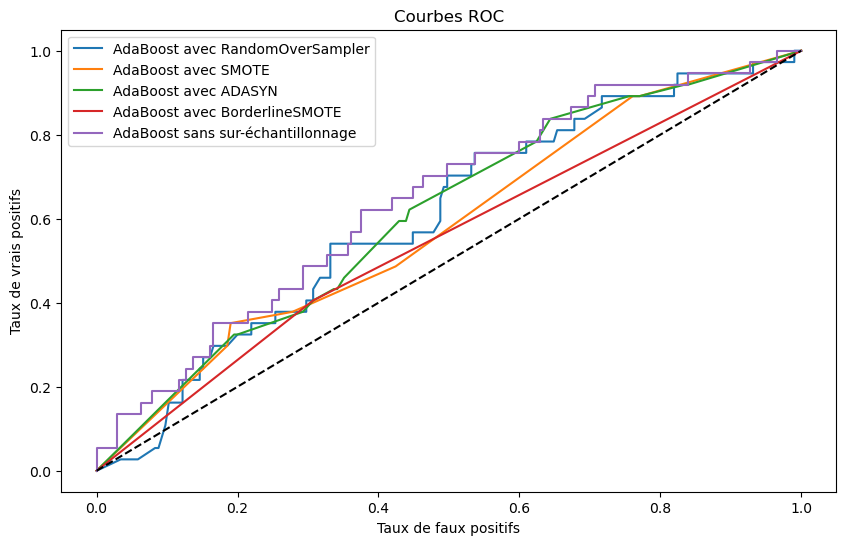

In [529]:
# Courbes ROC

fpr_adaboost_randomoversampler_cv, tpr_adaboost_randomoversampler_cv, _ = roc_curve(y_test, y_proba_adaboost_randomoversampler_cv)
fpr_adaboost_smote_cv, tpr_adaboost_smote_cv, _ = roc_curve(y_test, y_proba_adaboost_smote_cv)
fpr_adaboost_adasyn_cv, tpr_adaboost_adasyn_cv, _ = roc_curve(y_test, y_proba_adaboost_adasyn_cv)
fpr_adaboost_borderline_smote_cv, tpr_adaboost_borderline_smote_cv, _ = roc_curve(y_test, y_proba_adaboost_borderline_smote_cv)
fpr_adaboost_cv, tpr_adaboost_cv, _ = roc_curve(y_test, y_proba_adaboost_cv)

plt.figure(figsize=(10, 6))
plt.plot(fpr_adaboost_randomoversampler_cv, tpr_adaboost_randomoversampler_cv, label='AdaBoost avec RandomOverSampler')
plt.plot(fpr_adaboost_smote_cv, tpr_adaboost_smote_cv, label='AdaBoost avec SMOTE')
plt.plot(fpr_adaboost_adasyn_cv, tpr_adaboost_adasyn_cv, label='AdaBoost avec ADASYN')
plt.plot(fpr_adaboost_borderline_smote_cv, tpr_adaboost_borderline_smote_cv, label='AdaBoost avec BorderlineSMOTE')
plt.plot(fpr_adaboost_cv, tpr_adaboost_cv, label='AdaBoost sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

# Export de l'image
plt.savefig('data/Courbes_ROC_adaboost_cv.png')

plt.show()

### E) Importance des variables

In [530]:
# Importance des variables

# Récupération de l'importance des variables pour chaque modèle
importances_adaboost_randomoversampler = modele_adaboost_randomoversampler_opt.named_steps['adaboost'].feature_importances_
importances_adaboost_smote = modele_adaboost_smote_opt.named_steps['adaboost'].feature_importances_
importances_adaboost_adasyn = modele_adaboost_adasyn_opt.named_steps['adaboost'].feature_importances_
importances_adaboost_borderline_smote = modele_adaboost_borderline_smote_opt.named_steps['adaboost'].feature_importances_
importances_adaboost = modele_adaboost_opt.named_steps['adaboost'].feature_importances_

# Création d'un DataFrame pour afficher les résultats
resultats_importance_variables_adaboost_randomoversampler = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_adaboost_randomoversampler
})

resultats_importance_variables_adaboost_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_adaboost_smote
})

resultats_importance_variables_adaboost_adasyn = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_adaboost_adasyn
})

resultats_importance_variables_adaboost_borderline_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_adaboost_borderline_smote
})

resultats_importance_variables_adaboost = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_adaboost
})

# Affichage des résultats
resultats_importance_variables_adaboost_randomoversampler = resultats_importance_variables_adaboost_randomoversampler.sort_values(by="Importance", ascending=False)
resultats_importance_variables_adaboost_smote = resultats_importance_variables_adaboost_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_adaboost_adasyn = resultats_importance_variables_adaboost_adasyn.sort_values(by="Importance", ascending=False)
resultats_importance_variables_adaboost_borderline_smote = resultats_importance_variables_adaboost_borderline_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_adaboost = resultats_importance_variables_adaboost.sort_values(by="Importance", ascending=False)

resultats_importance_variables_adaboost_randomoversampler

Variable  Importance
22                         part_actifs    0.170000
18                               p_pop    0.140000
1              moyenne_conso_indus_hab    0.106667
21                       part_inactifs    0.100000
24              abstention_municipales    0.100000
6                nb_actes_france_renov    0.100000
12                        superf_choro    0.090000
20  com_variation_encours_dette_ha_pct    0.080000
11                            gridens7    0.056667
9          part_residences_secondaires    0.026667
5                        emissions_ges    0.016667
26                   total_entreprises    0.013333
25                   taux_creation_ent    0.000000
27             part_licencies_sportifs    0.000000
23                      dependance_eco    0.000000
28            part_jeunes_sans_diplome    0.000000
29                        climat_Autre    0.000000
30                     climat_Estuaire    0.000000
0               moyenne_conso_agri_hab    0.000000
16                            med_disp    0.000000
19                           CSP_maire    0.000000
17                                  an    0.000000
15                part_trajets_voiture    0.000000
14                            gare_tgv    0.000000
13                         departement    0.000000
10                   beneficiaire_prog    0.000000
8                         ecoquartiers    0.000000
7                               friche    0.000000
4             moyenne_conso_totale_hab    0.000000
3        moyenne_conso_residentiel_hab    0.000000
2          moyenne_conso_tertiaire_hab    0.000000
31                          climat_Mer    0.000000

In [531]:
resultats_importance_variables_adaboost_smote

Variable  Importance
1              moyenne_conso_indus_hab        0.60
18                               p_pop        0.32
11                            gridens7        0.08
23                      dependance_eco        0.00
19                           CSP_maire        0.00
20  com_variation_encours_dette_ha_pct        0.00
21                       part_inactifs        0.00
22                         part_actifs        0.00
0               moyenne_conso_agri_hab        0.00
17                                  an        0.00
25                   taux_creation_ent        0.00
26                   total_entreprises        0.00
27             part_licencies_sportifs        0.00
28            part_jeunes_sans_diplome        0.00
29                        climat_Autre        0.00
30                     climat_Estuaire        0.00
24              abstention_municipales        0.00
16                            med_disp        0.00
15                part_trajets_voiture        0.00
14                            gare_tgv        0.00
13                         departement        0.00
12                        superf_choro        0.00
10                   beneficiaire_prog        0.00
9          part_residences_secondaires        0.00
8                         ecoquartiers        0.00
7                               friche        0.00
6                nb_actes_france_renov        0.00
5                        emissions_ges        0.00
4             moyenne_conso_totale_hab        0.00
3        moyenne_conso_residentiel_hab        0.00
2          moyenne_conso_tertiaire_hab        0.00
31                          climat_Mer        0.00

In [532]:
resultats_importance_variables_adaboost_smote

Variable  Importance
1              moyenne_conso_indus_hab        0.60
18                               p_pop        0.32
11                            gridens7        0.08
23                      dependance_eco        0.00
19                           CSP_maire        0.00
20  com_variation_encours_dette_ha_pct        0.00
21                       part_inactifs        0.00
22                         part_actifs        0.00
0               moyenne_conso_agri_hab        0.00
17                                  an        0.00
25                   taux_creation_ent        0.00
26                   total_entreprises        0.00
27             part_licencies_sportifs        0.00
28            part_jeunes_sans_diplome        0.00
29                        climat_Autre        0.00
30                     climat_Estuaire        0.00
24              abstention_municipales        0.00
16                            med_disp        0.00
15                part_trajets_voiture        0.00
14                            gare_tgv        0.00
13                         departement        0.00
12                        superf_choro        0.00
10                   beneficiaire_prog        0.00
9          part_residences_secondaires        0.00
8                         ecoquartiers        0.00
7                               friche        0.00
6                nb_actes_france_renov        0.00
5                        emissions_ges        0.00
4             moyenne_conso_totale_hab        0.00
3        moyenne_conso_residentiel_hab        0.00
2          moyenne_conso_tertiaire_hab        0.00
31                          climat_Mer        0.00

In [533]:
resultats_importance_variables_adaboost_borderline_smote

Variable  Importance
18                               p_pop         1.0
0               moyenne_conso_agri_hab         0.0
1              moyenne_conso_indus_hab         0.0
30                     climat_Estuaire         0.0
29                        climat_Autre         0.0
28            part_jeunes_sans_diplome         0.0
27             part_licencies_sportifs         0.0
26                   total_entreprises         0.0
25                   taux_creation_ent         0.0
24              abstention_municipales         0.0
23                      dependance_eco         0.0
22                         part_actifs         0.0
21                       part_inactifs         0.0
20  com_variation_encours_dette_ha_pct         0.0
19                           CSP_maire         0.0
17                                  an         0.0
16                            med_disp         0.0
15                part_trajets_voiture         0.0
14                            gare_tgv         0.0
13                         departement         0.0
12                        superf_choro         0.0
11                            gridens7         0.0
10                   beneficiaire_prog         0.0
9          part_residences_secondaires         0.0
8                         ecoquartiers         0.0
7                               friche         0.0
6                nb_actes_france_renov         0.0
5                        emissions_ges         0.0
4             moyenne_conso_totale_hab         0.0
3        moyenne_conso_residentiel_hab         0.0
2          moyenne_conso_tertiaire_hab         0.0
31                          climat_Mer         0.0

In [534]:
resultats_importance_variables_adaboost

Variable  Importance
20  com_variation_encours_dette_ha_pct    0.083333
21                       part_inactifs    0.076667
25                   taux_creation_ent    0.066667
22                         part_actifs    0.060000
19                           CSP_maire    0.056667
16                            med_disp    0.053333
12                        superf_choro    0.053333
28            part_jeunes_sans_diplome    0.053333
3        moyenne_conso_residentiel_hab    0.046667
27             part_licencies_sportifs    0.046667
15                part_trajets_voiture    0.043333
0               moyenne_conso_agri_hab    0.043333
26                   total_entreprises    0.036667
5                        emissions_ges    0.033333
6                nb_actes_france_renov    0.030000
13                         departement    0.030000
9          part_residences_secondaires    0.026667
23                      dependance_eco    0.026667
11                            gridens7    0.026667
1              moyenne_conso_indus_hab    0.023333
2          moyenne_conso_tertiaire_hab    0.023333
18                               p_pop    0.020000
24              abstention_municipales    0.020000
4             moyenne_conso_totale_hab    0.013333
7                               friche    0.006667
8                         ecoquartiers    0.000000
17                                  an    0.000000
10                   beneficiaire_prog    0.000000
14                            gare_tgv    0.000000
29                        climat_Autre    0.000000
30                     climat_Estuaire    0.000000
31                          climat_Mer    0.000000

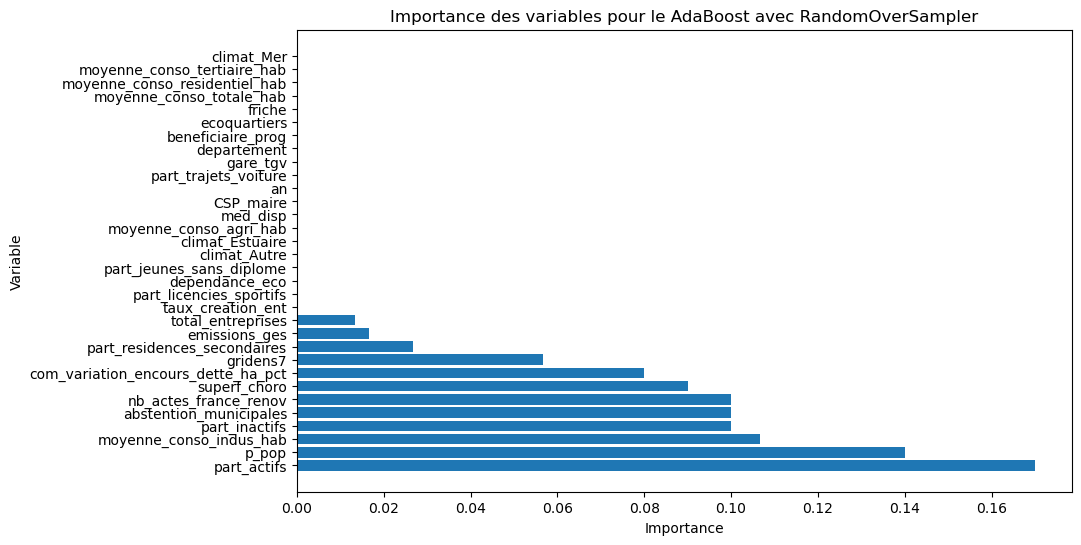

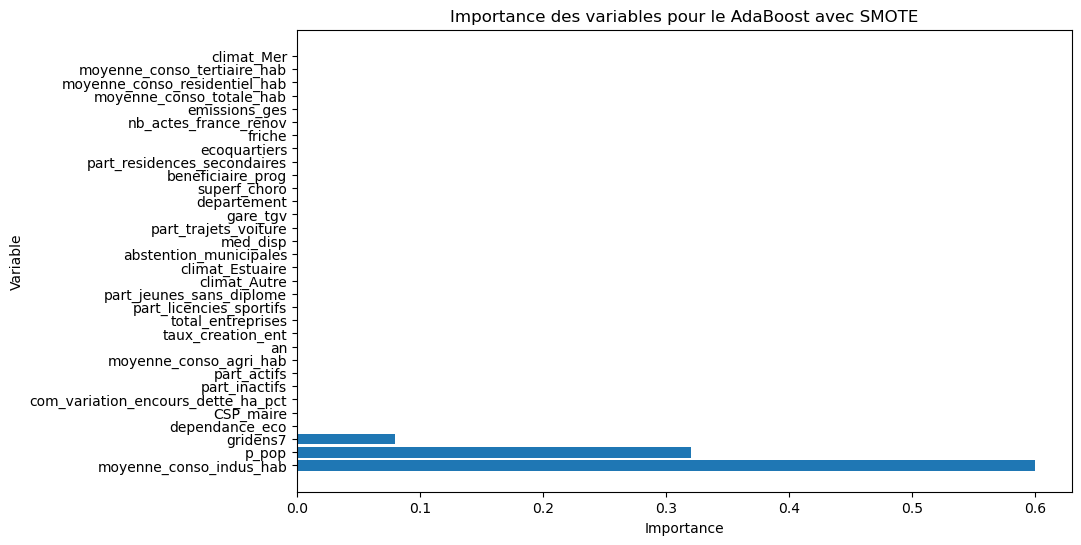

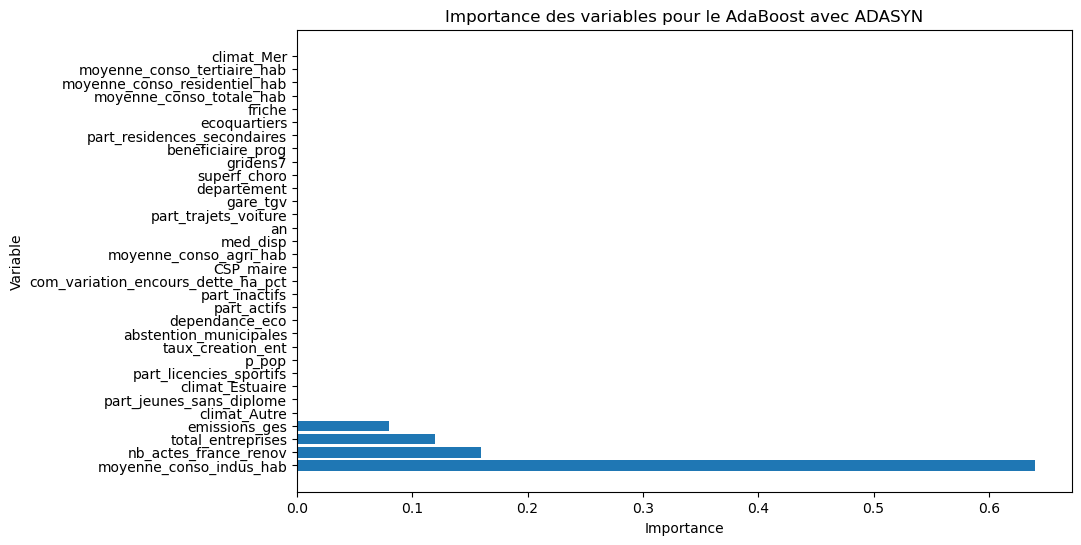

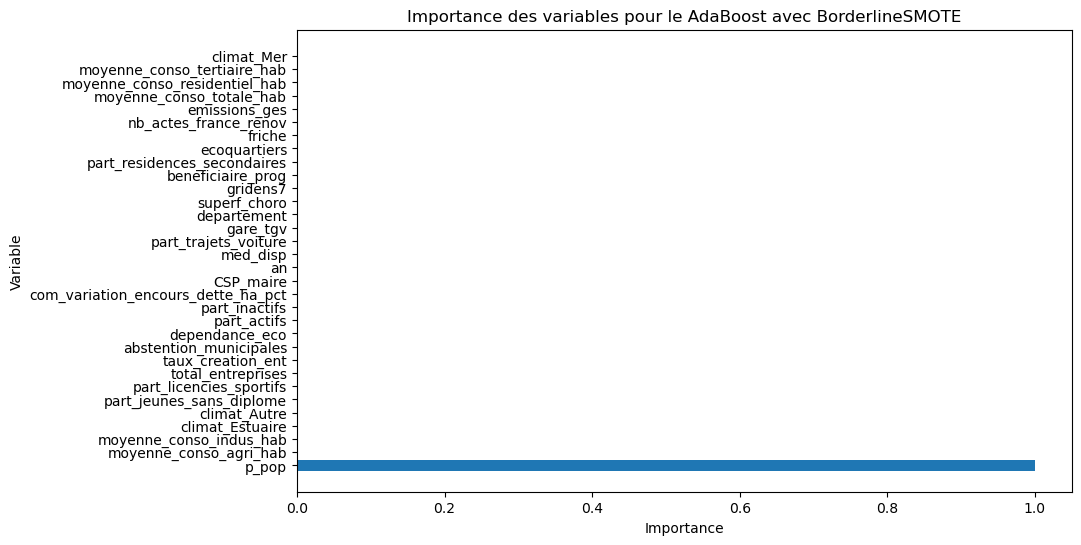

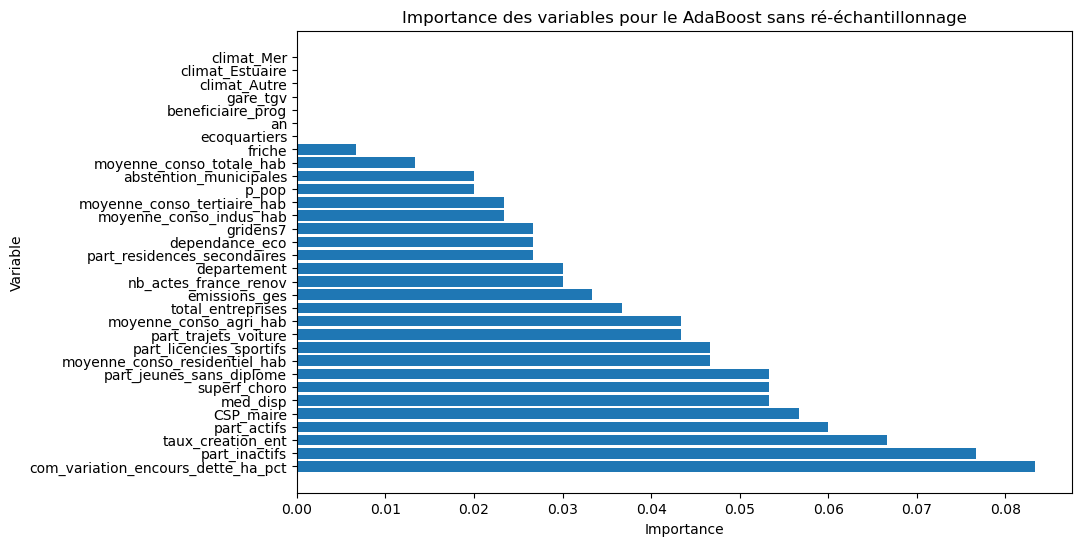

In [535]:
# Graphique de l'importance des variables

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_adaboost_randomoversampler['Variable'], resultats_importance_variables_adaboost_randomoversampler['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le AdaBoost avec RandomOverSampler')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_adaboost_smote['Variable'], resultats_importance_variables_adaboost_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le AdaBoost avec SMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_adaboost_adasyn['Variable'], resultats_importance_variables_adaboost_adasyn['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le AdaBoost avec ADASYN')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_adaboost_borderline_smote['Variable'], resultats_importance_variables_adaboost_borderline_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le AdaBoost avec BorderlineSMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_adaboost['Variable'], resultats_importance_variables_adaboost['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le AdaBoost sans ré-échantillonnage')
plt.show()

### F) Ajustement hyperparamètres bis

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, balanced_accuracy_score, roc_auc_score

# Grilles de paramètres adaptées pour éviter le surapprentissage

param_grid_adaboost_oversampler_bis = {
    'oversampler__sampling_strategy': [0.5, 0.75, 1.0],  # Stratégies simplifiées pour échantillonnage
    'adaboost__n_estimators': [50, 100, 300],  # Réduction des options pour le nombre d'arbres
    'adaboost__learning_rate': [0.001, 0.01, 0.1],  # Ajout d'une valeur plus basse pour learning_rate
}

param_grid_adaboost_smote_bis = {
    'smote__k_neighbors': [5, 7],  # Réduction des voisins pour SMOTE
    'smote__sampling_strategy': [0.5, 0.75, 1.0], 
    'adaboost__n_estimators': [50, 100, 300], 
    'adaboost__learning_rate': [0.001, 0.01, 0.1],  
}

param_grid_adaboost_adasyn_bis = {
    'adasyn__n_neighbors': [5, 7], 
    'adasyn__sampling_strategy': [0.5, 0.75, 1.0], 
    'adaboost__n_estimators': [50, 100, 300], 
    'adaboost__learning_rate': [0.001, 0.01, 0.1],  
}

param_grid_adaboost_borderline_smote_bis = {
    'borderline_smote__k_neighbors': [5, 7], 
    'borderline_smote__sampling_strategy': [0.5, 0.75, 1.0], 
    'adaboost__n_estimators': [50, 100, 300], 
    'adaboost__learning_rate': [0.001, 0.01, 0.1],  
}

param_grid_adaboost_bis = {
    'adaboost__n_estimators': [50, 100, 300], 
    'adaboost__learning_rate': [0.001, 0.01, 0.1],  
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score),
    'Balanced Accuracy': make_scorer(balanced_accuracy_score),
    'AUC': make_scorer(roc_auc_score),
}

In [ ]:
grille_recherche_adaboost_randomoversampler_bis = RandomizedSearchCV(modele_adaboost_randomoversampler, param_grid_adaboost_oversampler_bis, cv=cv, scoring=scoring, refit = 'AUC', n_jobs=-1, random_state=42)
grille_recherche_adaboost_smote_bis = RandomizedSearchCV(modele_adaboost_smote, param_grid_adaboost_smote_bis, cv=cv, scoring=scoring, refit = 'AUC',n_jobs=-1,  random_state=42)
grille_recherche_adaboost_adasyn_bis = RandomizedSearchCV(modele_adaboost_adasyn, param_grid_adaboost_adasyn_bis, cv=cv, scoring=scoring, refit = 'AUC',n_jobs=-1,  random_state=42)
grille_recherche_adaboost_borderline_smote_bis = RandomizedSearchCV(modele_adaboost_borderline_smote, param_grid_adaboost_borderline_smote_bis, cv=cv, scoring=scoring, refit = 'AUC',n_jobs=-1,  random_state=42)
grille_recherche_adaboost_bis = RandomizedSearchCV(modele_adaboost, param_grid_adaboost_bis, cv=cv, scoring=scoring, refit = 'AUC',n_jobs=-1,  random_state=42)

In [ ]:
modele_adaboost_randomoversampler_opt_bis = grille_recherche_adaboost_randomoversampler_bis.fit(X_train, y_train).best_estimator_
modele_adaboost_smote_opt_bis = grille_recherche_adaboost_smote_bis.fit(X_train, y_train).best_estimator_
modele_adaboost_adasyn_opt_bis = grille_recherche_adaboost_adasyn_bis.fit(X_train, y_train).best_estimator_
modele_adaboost_borderline_smote_opt_bis = grille_recherche_adaboost_borderline_smote_bis.fit(X_train, y_train).best_estimator_
modele_adaboost_opt_bis = grille_recherche_adaboost_bis.fit(X_train, y_train).best_estimator_

In [ ]:
# Prévisions

y_proba_adaboost_randomoversampler_cv = modele_adaboost_randomoversampler_opt_bis.predict_proba(X_test)[:, 1]
y_pred_adaboost_randomoversampler_cv = modele_adaboost_randomoversampler_opt_bis.predict(X_test)

y_proba_adaboost_smote_cv = modele_adaboost_smote_opt_bis.predict_proba(X_test)[:, 1]
y_pred_adaboost_smote_cv = modele_adaboost_smote_opt_bis.predict(X_test)

y_proba_adaboost_adasyn_cv = modele_adaboost_adasyn_opt_bis.predict_proba(X_test)[:, 1]
y_pred_adaboost_adasyn_cv = modele_adaboost_adasyn_opt_bis.predict(X_test)

y_proba_adaboost_borderline_smote_cv = modele_adaboost_borderline_smote_opt_bis.predict_proba(X_test)[:, 1]
y_pred_adaboost_borderline_smote_cv = modele_adaboost_borderline_smote_opt_bis.predict(X_test)

y_proba_adaboost_cv = modele_adaboost_opt_bis.predict_proba(X_test)[:, 1]
y_pred_adaboost_cv = modele_adaboost_opt_bis.predict(X_test)

### G) Mesure performances bis

In [ ]:
# Calcul des métriques

auc_roc_adaboost_randomoversampler_cv = roc_auc_score(y_test, y_proba_adaboost_randomoversampler_cv)
f1_adaboost_randomoversampler_cv = f1_score(y_test, y_pred_adaboost_randomoversampler_cv)
balanced_acc_adaboost_randomoversampler_cv = balanced_accuracy_score(y_test, y_pred_adaboost_randomoversampler_cv)

auc_roc_adaboost_smote_cv = roc_auc_score(y_test, y_proba_adaboost_smote_cv)
f1_adaboost_smote_cv = f1_score(y_test, y_pred_adaboost_smote_cv)
balanced_acc_adaboost_smote_cv = balanced_accuracy_score(y_test, y_pred_adaboost_smote_cv)

auc_roc_adaboost_adasyn_cv = roc_auc_score(y_test, y_proba_adaboost_adasyn_cv)
f1_adaboost_adasyn_cv = f1_score(y_test, y_pred_adaboost_adasyn_cv)
balanced_acc_adaboost_adasyn_cv = balanced_accuracy_score(y_test, y_pred_adaboost_adasyn_cv)

auc_roc_adaboost_borderline_smote_cv = roc_auc_score(y_test, y_proba_adaboost_borderline_smote_cv)
f1_adaboost_borderline_smote_cv = f1_score(y_test, y_pred_adaboost_borderline_smote_cv)
balanced_acc_adaboost_borderline_smote_cv = balanced_accuracy_score(y_test, y_pred_adaboost_borderline_smote_cv)

auc_roc_adaboost_cv = roc_auc_score(y_test, y_proba_adaboost_cv)
f1_adaboost_cv = f1_score(y_test, y_pred_adaboost_cv)
balanced_acc_adaboost_cv = balanced_accuracy_score(y_test, y_pred_adaboost_cv)

# Affichage des résultats

resultats_adaboost_cv = pd.DataFrame({
    "AdaBoost sans sur-échantillonnage": [auc_roc_adaboost_cv, f1_adaboost_cv, balanced_acc_adaboost_cv],
    "AdaBoost avec SMOTE": [auc_roc_adaboost_smote_cv, f1_adaboost_smote_cv, balanced_acc_adaboost_smote_cv],
    "AdaBoost avec RandomOverSampler": [auc_roc_adaboost_randomoversampler_cv, f1_adaboost_randomoversampler_cv, balanced_acc_adaboost_randomoversampler_cv],
    "AdaBoost avec ADASYN": [auc_roc_adaboost_adasyn_cv, f1_adaboost_adasyn_cv, balanced_acc_adaboost_adasyn_cv],
    "AdaBoost avec BorderlineSMOTE": [auc_roc_adaboost_borderline_smote_cv, f1_adaboost_borderline_smote_cv, balanced_acc_adaboost_borderline_smote_cv]
    },
    index = ["AUC-ROC", "F1-score", "Balanced accuracy"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_adaboost_cv = resultats_adaboost_cv.round(3)
resultats_adaboost_cv

In [ ]:
# Courbes ROC

fpr_adaboost_randomoversampler_cv, tpr_adaboost_randomoversampler_cv, _ = roc_curve(y_test, y_proba_adaboost_randomoversampler_cv)
fpr_adaboost_smote_cv, tpr_adaboost_smote_cv, _ = roc_curve(y_test, y_proba_adaboost_smote_cv)
fpr_adaboost_adasyn_cv, tpr_adaboost_adasyn_cv, _ = roc_curve(y_test, y_proba_adaboost_adasyn_cv)
fpr_adaboost_borderline_smote_cv, tpr_adaboost_borderline_smote_cv, _ = roc_curve(y_test, y_proba_adaboost_borderline_smote_cv)
fpr_adaboost_cv, tpr_adaboost_cv, _ = roc_curve(y_test, y_proba_adaboost_cv)

plt.figure(figsize=(10, 6))
plt.plot(fpr_adaboost_randomoversampler_cv, tpr_adaboost_randomoversampler_cv, label='AdaBoost avec RandomOverSampler')
plt.plot(fpr_adaboost_smote_cv, tpr_adaboost_smote_cv, label='AdaBoost avec SMOTE')
plt.plot(fpr_adaboost_adasyn_cv, tpr_adaboost_adasyn_cv, label='AdaBoost avec ADASYN')
plt.plot(fpr_adaboost_borderline_smote_cv, tpr_adaboost_borderline_smote_cv, label='AdaBoost avec BorderlineSMOTE')
plt.plot(fpr_adaboost_cv, tpr_adaboost_cv, label='AdaBoost sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

# Export de l'image
plt.savefig('data/Courbes_ROC_adaboost_cv.png')

plt.show()

## I.4. Modèles optimisés ++

## I.5. Analyse mauvaises perf

In [543]:
# import matplotlib.pyplot as plt
# from sklearn.model_selection import learning_curve
# import numpy as np

# # Courbe d'apprentissage simplifiée
# train_sizes, train_scores, test_scores = learning_curve(
#     modele_rf_opt_bis, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=1, train_sizes=np.linspace(0.1, 1.0, 5)
# )

# train_scores_mean = np.mean(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)

# plt.figure(figsize=(12, 6))
# plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
# plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
# plt.title('Learning Curve for RF (Simplified)')
# plt.xlabel('Training examples')
# plt.ylabel('Score (AUC)')
# plt.legend(loc='best')
# plt.grid()
# plt.show()


In [544]:
# import matplotlib.pyplot as plt
# from sklearn.model_selection import learning_curve
# import numpy as np

# # Courbe d'apprentissage simplifiée
# train_sizes, train_scores, test_scores = learning_curve(
#     modele_gb_opt_bis, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=1, train_sizes=np.linspace(0.1, 1.0, 5)
# )

# train_scores_mean = np.mean(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)

# plt.figure(figsize=(12, 6))
# plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
# plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
# plt.title('Learning Curve for GB (Simplified)')
# plt.xlabel('Training examples')
# plt.ylabel('Score (AUC)')
# plt.legend(loc='best')
# plt.grid()
# plt.show()


In [545]:
# import matplotlib.pyplot as plt
# from sklearn.model_selection import learning_curve
# import numpy as np

# # Courbe d'apprentissage simplifiée
# train_sizes, train_scores, test_scores = learning_curve(
#     modele_adaboost_opt_bis, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=1, train_sizes=np.linspace(0.1, 1.0, 5)
# )

# train_scores_mean = np.mean(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)

# plt.figure(figsize=(12, 6))
# plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
# plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
# plt.title('Learning Curve for Adaboost (Simplified)')
# plt.xlabel('Training examples')
# plt.ylabel('Score (AUC)')
# plt.legend(loc='best')
# plt.grid()
# plt.show()


# II. Kmeans

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Sélectionner uniquement les colonnes numériques
df_numeric = donnees.select_dtypes(include=[np.number])

# Normaliser les données
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_numeric)

# ACP
pca = PCA()
df_pca = pca.fit_transform(df_normalized)

In [591]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Choix du nombre optimal de clusters (méthode du coude et du score de silhouette)
inertias = []
silhouettes = []
K = range(2, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(df_scaled)
    inertias.append(kmeanModel.inertia_)
    silhouettes.append(silhouette_score(df_scaled, kmeanModel.labels_))

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

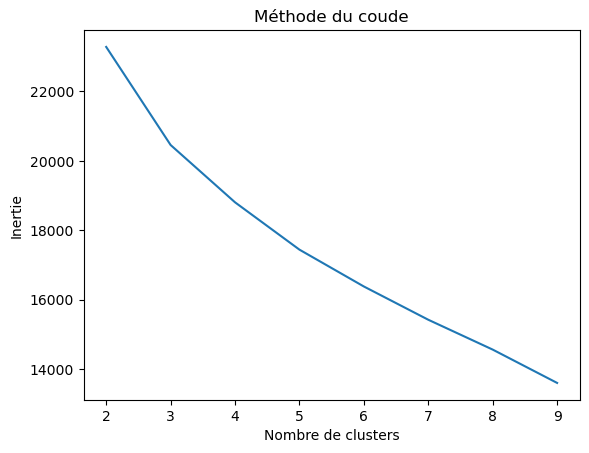

In [593]:
# Tracer la courbe de l'inertie en fonction du nombre de clusters
plt.plot(range(2, 10), inertias)
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.show()

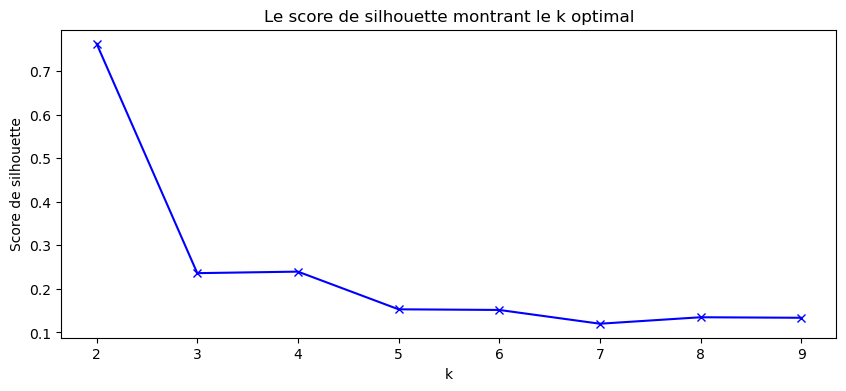

In [594]:
# Graphique du score de silhouette
plt.figure(figsize=(10,4))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('Score de silhouette')
plt.title('Le score de silhouette montrant le k optimal')
plt.show()

In [607]:
# Appliquer KMeans avec le nombre de clusters optimal trouvé (3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [608]:
# Ajouter les labels de cluster au DataFrame
donnees['cluster_label'] = kmeans.labels_
donnees

beneficiaire_trans_eco  moyenne_conso_agri_hab  \
code_insee                                                  
22001                           0                2.994071   
22002                           0                1.283886   
22003                           0                0.000000   
22004                           0                0.200325   
22005                           0                0.121358   
...                           ...                     ...   
56260                           0                0.000681   
56261                           1                0.195613   
56262                           0                0.006094   
56263                           0                0.007602   
56264                           0                1.013565   

            moyenne_conso_indus_hab  moyenne_conso_tertiaire_hab  \
code_insee                                                         
22001                      0.000503                     0.631181   
22002                      0.032120                     0.173206   
22003                      0.000000                     0.524098   
22004                      0.675332                     1.267791   
22005                      0.082905                     1.151104   
...                             ...                          ...   
56260                      0.520068                     2.439832   
56261                      9.267199                     1.455526   
56262                      0.052881                     0.387681   
56263                      0.084358                     0.755085   
56264                      3.746161                     0.242661   

            moyenne_conso_residentiel_hab  moyenne_conso_totale_hab  \
code_insee                                                            
22001                            3.688905                  7.378017   
22002                            3.248865                  4.775226   
22003                            2.908468                  3.472740   
22004                            3.034877                  5.203150   
22005                            3.532942                  4.926877   
...                                   ...                       ...   
56260                            2.641373                  5.627498   
56261                            3.289547                 14.230865   
56262                            3.643098                  4.106353   
56263                            2.451098                  3.311144   
56264                            3.914057                  8.940165   

            emissions_ges  nb_actes_france_renov  friche ecoquartiers  ...  \
code_insee                                                             ...   
22001               14871                     88       2            0  ...   
22002                8621                     38       0            0  ...   
22003                3028                     49       0            0  ...   
22004               29130                     46       6            0  ...   
22005                4136                     10       3            0  ...   
...                   ...                    ...     ...          ...  ...   
56260              133906                   1633      23            0  ...   
56261               76648                     52       2            0  ...   
56262                3704                    147       0            0  ...   
56263                6698                    160       0            0  ...   
56264                4215                     13       1            0  ...   

            abstention_municipales taux_creation_ent total_entreprises  \
code_insee                                                               
22001                         17.4              15.0                20   
22002                         53.8              12.1                33   
22003                         53.7              36.7                30   
22004                  

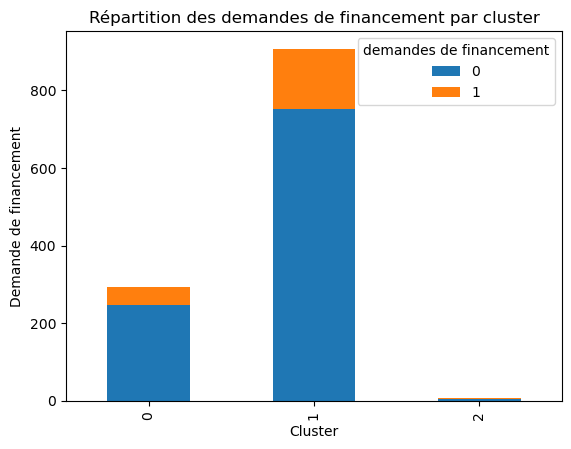

In [609]:
# Créer une table de contingence entre cluster_label et statut_types
contingency_table = pd.crosstab(donnees['cluster_label'], donnees['beneficiaire_trans_eco'])

# Tracer le barplot
contingency_table.plot(kind='bar', stacked=True)

# Ajouter des étiquettes et des titres
plt.xlabel('Cluster')
plt.ylabel('Demande de financement')
plt.title('Répartition des demandes de financement par cluster')

# Afficher la légende
plt.legend(title='demandes de financement')

# Afficher le graphique
plt.show()

# II. Résultats

## II.1. Export des résultats

In [546]:
len(X)

# Je veux récupérer toutes les probabilités associées à chaque observation avec adaboost et randomoversampler
toutes_probas_communes = modele_adaboost_randomoversampler_opt.predict_proba(X)[:, 1]
len(toutes_probas_communes)


1207

In [547]:
# On récupère chaque probabilité associée à chaque commune

resultats_proba_communes = pd.DataFrame({
    "Code INSEE": X.index,
    "Probabilité": toutes_probas_communes
})
resultats_proba_communes

# Export du tableau
resultats_proba_communes.to_csv("data/resultats_proba_communes.csv", index=False)